In [52]:
import xarray as xr
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
import cartopy
from datetime import datetime, timedelta
import os
import numpy as np
import pandas as pd

In [53]:
grid_path = r'Z:/cluster_projects/ro/1149_10/earthformer-multisource-to-inca/data_adapted_condition_0.02_20_all/Aux/grid_2d_wgs84.h5'

In [54]:
rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines', scale='10m')
border = cartopy.feature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m')
lon_model = h5py.File(grid_path,'r')['lon'][:, :]
lat_model = h5py.File(grid_path,'r')['lat'][:, :]

In [55]:
# # Load IMERG data (assuming it has dimensions lat, lon, and time)
# imerg_root_dir = r'C:\Users\c.kwa\Desktop\meteosat_retrieval\data_downloads\TAHMO\TAHMO_export_6704eaa37e81da18c0b7e245'
# imerg_file = 'path_to_imerg_data.nc'
# imerg_data = xr.open_dataset(imerg_file)
# precip_imerg = imerg_data['precipitation']  # Replace with the actual variable name if different

# Load TAHMO station data (CSV format with columns:'precipitation')
tahmo_root_dir = r'C:\Users\c.kwa\Desktop\meteosat_retrieval\data_downloads\TAHMO\TAHMO_export_6704eaa37e81da18c0b7e245'


station_name_list_tahmo = []
station_data_list_TAHMO = []
for station in os.listdir(tahmo_root_dir):
    if station.endswith('.csv'):
        station_file = os.path.join(tahmo_root_dir, station)
        station_data = pd.read_csv(station_file)
        station_name_list_tahmo.append(station.split('.')[0])
        station_data_list_TAHMO.append(station_data)

station_data_tahmo_dict = dict(zip(station_name_list_tahmo, station_data_list_TAHMO))

stations_meta_data_TAHMO = station_data_tahmo_dict.pop('stations_metadata')
stations_sensor_data = station_data_tahmo_dict.pop('sensors_metadata')

display(stations_meta_data_TAHMO)
display(stations_sensor_data)

station code                                   name country  \
0       TA00005                         Asankragwa SHS      GH   
1       TA00007      Nana Yaa Kesse SHS Duayaw Nkwanta      GH   
2       TA00010                             Chiraa SHS      GH   
3       TA00016            Accra Academy School, Accra      GH   
4       TA00045  Asesewaa Senior High School, Asesewaa      GH   
5       TA00113                            Nkwanta SHS      GH   
6       TA00116           Amedzofe Technical Institute      GH   
7       TA00117                               Keta SHS      GH   
8       TA00118                  Tema Secondary School      GH   
9       TA00120                      Nkroful Agric SHS      GH   
10      TA00121                        Half Assini SHS      GH   
11      TA00136      Notre Dame Seminary/SHS, Navrongo      GH   
12      TA00251                 Daffiama SHS, Daffiama      GH   
13      TA00254                       Bongo SHS, Bongo      GH   
14      TA00259                   Kpandai SHS, Kpandai      GH   
15      TA00266                     Kajaji SHS, Kajaji      GH   
16      TA00301                   St. Paul's SHS, Denu      GH   
17      TA00302                   Ghana SHS, Koforidua      GH   
18      TA00391                            Agri Impact      GH   
19      TA00392           Wenchi Methodist SHS, Wenchi      GH   
20      TA00616          CSIR-SARI, Nyankpala - Tamale      GH   
21      TA00647                   UG Greenhouse, Legon      GH   
22      TA00689                 Walembelle Poly Clinic      GH   
23      TA00690               Bui Power Authority, Bui      GH   
24      TA00756                  Kwadaso Agric College      GH   

    installation height (m)   latitude  longitude  elevation (m)      timezone  
0                       2.0   5.807731  -2.426395          125.1  Africa/Accra  
1                       2.0   7.188273  -2.097477          341.1  Africa/Accra  
2                       2.0   7.389595  -2.185991          337.1  Africa/Accra  
3                       2.0   5.573104  -0.244500           32.4  Africa/Accra  
4                       2.0   6.400626  -0.146577          372.3  Africa/Accra  
5                       2.0   8.271124   0.515265          213.7  Africa/Accra  
6                       2.0   6.845815   0.440698          731.8  Africa/Accra  
7                       2.0   5.895083   0.989567           10.0  Africa/Accra  
8                       2.0   5.641413  -0.011870           18.4  Africa/Accra  
9                       2.0   4.971861  -2.322676           28.0  Africa/Accra  
10                      2.0   5.053207  -2.877294           14.0  Africa/Accra  
11                      2.0  10.883374  -1.071105          187.0  Africa/Accra  
12                      2.0  10.424955  -2.554480          322.8  Africa/Accra  
13                      2.0  10.913211  -0.810161          212.8  Africa/Accra  
14                      2.0   8.476085  -0.028542          196.3  Africa/Accra  
15                      2.0   7.781986  -0.212638          130.0  Africa/Accra  
16                      2.0   6.124187   1.126036           21.0  Africa/Accra  
17                      2.0   6.107885  -0.264210          198.0  Africa/Accra  
18                      2.0   5.760172  -0.231223          355.0  Africa/Accra  
19                      2.0   7.755588  -2.101559          322.0  Africa/Accra  
20                      2.5   9.400825  -1.001911          191.0  Africa/Accra  
21                      2.0   5.659788  -0.190434           82.0  Africa/Accra  
22                      2.0  10.501056  -1.968561          292.2  Africa/Accra  
23                      2.0   8.247040  -2.252721          165.9  Africa/Accra  
24                      2.0   6.671519  -1.670523          270.4  Africa/Accra

sensor code sensor name     installation date   deinstallation date  \
0      S001402    ATMOS 41  2020-06-25T00:00:00Z  2199-01-01T00:00:00Z   
1      S001188    ATMOS 41  2019-07-02T00:00:00Z  2020-06-25T00:00:00Z   
2      S001233    ATMOS 41  2019-09-08T00:00:00Z  2199-01-01T00:00:00Z   
3      S001234    ATMOS 41  2019-09-08T00:00:00Z  2023-06-04T17:00:00Z   
4      S001944    ATMOS 41  2023-06-04T17:05:00Z  2199-01-01T00:00:00Z   
5      S001566    ATMOS 41  2021-05-18T00:00:00Z  2023-07-12T00:00:00Z   
6      S001212    ATMOS 41  2019-07-11T00:00:00Z  2021-05-18T00:00:00Z   
7      S001955    ATMOS 41  2023-07-12T00:00:00Z  2199-01-01T00:00:00Z   
8      S000711    ATMOS 41  2018-05-23T00:00:00Z  2199-01-01T00:00:00Z   
9      S000127    ATMOS 41  2017-01-29T00:00:00Z  2020-09-14T00:00:00Z   
10     S001418    ATMOS 41  2020-09-14T00:00:00Z  2199-01-01T00:00:00Z   
11     S001420    ATMOS 41  2023-08-04T00:00:00Z  2199-01-01T00:00:00Z   
12     S000125    ATMOS 41  2020-06-22T00:00:00Z  2020-08-17T00:00:00Z   
13     S000130    ATMOS 41  2017-01-27T00:00:00Z  2019-11-22T00:00:00Z   
14     S000276    ATMOS 41  2020-08-17T00:00:00Z  2020-09-27T00:00:00Z   
15     S002023    ATMOS 41  2023-08-15T00:00:00Z  2199-01-01T00:00:00Z   
16     S000131    ATMOS 41  2017-01-26T00:00:00Z  2023-04-11T00:00:00Z   
17     S001904    ATMOS 41  2023-04-11T00:00:00Z  2199-01-01T00:00:00Z   
18     S000132    ATMOS 41  2017-01-26T00:00:00Z  2023-09-05T08:30:00Z   
19     S001401    ATMOS 41  2020-06-24T00:00:00Z  2199-01-01T00:00:00Z   
20     S000134    ATMOS 41  2017-01-14T12:00:00Z  2020-06-24T00:00:00Z   
21     S000135    ATMOS 41  2017-01-13T18:00:00Z  2199-01-01T00:00:00Z   
22     S000147    ATMOS 41  2017-02-14T00:00:00Z  2024-07-29T00:00:00Z   
23     S002464    ATMOS 41  2024-07-29T00:00:00Z  2199-01-01T00:00:00Z   
24     S000261    ATMOS 41  2017-10-02T00:00:00Z  2199-01-01T00:00:00Z   
25     S000264    ATMOS 41  2017-10-05T00:00:00Z  2023-09-29T00:00:00Z   
26     S001714    ATMOS 41  2023-09-29T00:00:00Z  2199-01-01T00:00:00Z   
27     S000269    ATMOS 41  2017-10-06T00:00:00Z  2023-08-04T00:00:00Z   
28     S000275    ATMOS 41  2017-10-09T00:00:00Z  2199-01-01T00:00:00Z   
29     S000313    ATMOS 41  2017-10-21T00:00:00Z  2199-01-01T00:00:00Z   
30     S001520    ATMOS 41  2020-12-10T00:00:00Z  2199-01-01T00:00:00Z   
31     S000314    ATMOS 41  2017-11-18T00:00:00Z  2020-12-10T00:00:00Z   
32     S000400    ATMOS 41  2018-02-24T00:00:00Z  2199-01-01T00:00:00Z   
33     S000401    ATMOS 41  2018-03-01T00:00:00Z  2199-01-01T00:00:00Z   
34     S000986    ATMOS 41  2019-04-24T00:00:00Z  2199-01-01T00:00:00Z   
35     S001208    ATMOS 41  2019-07-19T00:00:00Z  2020-04-21T00:00:00Z   
36     S001376    ATMOS 41  2020-04-21T00:00:00Z  2199-01-01T00:00:00Z   
37     S000631    ECRN-100  2021-08-25T00:00:00Z  2022-02-16T00:00:00Z   
38     S001321    ATMOS 41  2019-12-13T00:00:00Z  2022-02-16T00:00:00Z   
39     S001725    ATMOS 41  2022-02-16T00:00:00Z  2199-01-01T00:00:00Z   
40     S001324    ATMOS 41  2019-12-14T00:00:00Z  2199-01-01T00:00:00Z   
41     S001630    ATMOS 41  2021-05-26T00:00:00Z  2199-01-01T00:00:00Z   

    port number  installation height (m)  
0             1                      2.0  
1             1                      2.0  
2             1                      2.0  
3             1                      2.0  
4             1                      2.0  
5             1                      2.0  
6             1                      2.0  
7             1                      2.0  
8             1                      2.0  
9             1                      2.0  
10            1                      2.0  
11            1                      2.0  
12            1                      2.0  
13            1                      2.0  
14            1                      2.0  
15            1                      2.0  
16            1                      2.0  
17            1                      2.0  
18 

In [56]:
# Load TAHMO station data (CSV format with columns:'precipitation')
gmet_root_dir = r'C:\Users\c.kwa\Desktop\meteosat_retrieval\data_downloads\GMET\GMet_AWSdata\GMet_AWSdata'

station_data_list_GMET = []
station_name_list = []
for station in os.listdir(gmet_root_dir):
    if station.endswith('.csv'):
        station_file = os.path.join(gmet_root_dir, station)
        station_data = pd.read_csv(station_file)
        station_data_list_GMET.append(station_data)
        station_name_list.append(station.split('.')[0])
    #display(station_data)

stations_meta_data_GMET = station_data_list_GMET.pop(7)
station_name_list = stations_meta_data_GMET['STN'].tolist()

station_data_gmet_dict = dict(zip(station_name_list, station_data_list_GMET))

# stations_meta_data_GMET = station_data_gmet_dict.pop('GMet_Meta_DataAWS')

# # Load TAHMO station meta data (CSV format with columns: 'stationcode', latitude', 'longitude')
# stations_meta_data_GMET = station_data_list_GMET.pop(7)
# file_name_meta_data = station_name_list.pop(7)

display(stations_meta_data_GMET)

display(station_data_gmet_dict['Abetifi'])

STN       LON        LAT
0        Abetifi -0.747020   6.680400
1       Ada_Foah  0.617981   5.831201
2       Akim_Oda -0.978370   5.929300
3       Akosombo  0.056591   6.291360
4          Akuse  0.119290   6.094600
5           Axim -2.237005   4.864180
6          Enchi -2.823720   5.823700
7         Jirapa -2.719410  10.534580
8         Kalbeo -0.887150  10.752900
9        Kpandai -0.017880   8.484500
10        Loagri -0.827940  10.255940
11    Nakpamboni -0.077532   9.694249
12  Sefwi_Bekwai -2.312700   6.204200
13        Tarkwa -1.992645   5.313868
14          Tema  0.001710   5.632240
15         Tolon -1.058121   8.029315
16     Varenpare -2.534490  10.041190
17         Yendi -0.014762   9.490350

Date         Time Precipitation (mm)
0         1/1/2020  12:00:00 AM                  0
1         1/1/2020  12:15:00 AM                  0
2         1/1/2020  12:30:00 AM                  0
3         1/1/2020  12:45:00 AM                  0
4         1/1/2020   1:00:00 AM                  0
...            ...          ...                ...
135264  12/31/2023  10:45:00 PM                  0
135265  12/31/2023  11:00:00 PM                  0
135266  12/31/2023  11:15:00 PM                  0
135267  12/31/2023  11:30:00 PM                  0
135268  12/31/2023  11:45:00 PM                  0

[135269 rows x 3 columns]

In [6]:

# Define intervals and colors
vmin, vmax = 0, 154
intervals = [vmin, 0.2, 0.3, 0.6, 0.9, 1.7, 2.7, 5, 8.6, 15, 27.3, 50, 89.9, vmax]
colors = ['#fffffe', '#0101ff', '#0153ff', '#00acfe', '#01feff',
          '#8cff8c', '#fffe01', '#ff8d01', '#fe4300', '#f60100',
          '#bc0030', '#ad01ac', '#ff00ff']

# Create custom colormap and normalization
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)
custom_norm = BoundaryNorm(intervals, custom_cmap.N)

In [7]:
def plot_precip_comparison_full(model_dir, model_dir2, imerg_final_dir, imerg_early_dir, date, time_range, version_early, lat_bounds=None, lon_bounds=None):
    """
    Plots IMERG-Final, IMERG-Early, and model output data for a specific date and time range.

    Parameters:
        model_dir (str): Path to the directory containing model output files.
        imerg_final_dir (str): Path to the directory containing IMERG-Final data.
        imerg_early_dir (str): Path to the directory containing IMERG-Early data.
        date (str): Date in 'YYYYMMDD' format.
        time_range (tuple): Time range as (start_hour, end_hour) in 24-hour format.
        lat_bounds (tuple): Latitude boundaries as (min_lat, max_lat).
        lon_bounds (tuple): Longitude boundaries as (min_lon, max_lon).
    """
    # Define time range
    start_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[0])
    end_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[1])

    # Generate the list of hourly timestamps within the range
    timestamps = [start_time + timedelta(hours=i) for i in range(time_range[1] - time_range[0] + 1)]

    # Initialize the plot
    num_timestamps = len(timestamps)
    fig, axes = plt.subplots(4, num_timestamps, figsize=(5 * num_timestamps, 20), subplot_kw={'projection': ccrs.PlateCarree()})
    fig.suptitle(f"Precipitation Comparison for {date}", fontsize=16)

    def time_to_minutes(time_str):
        time_obj = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
        minutes = time_obj.hour * 60 + time_obj.minute - 30
        if minutes <= 0:
            minutes = '0000'

        elif minutes < 100 and minutes > 0:
            minutes = '00' + f'{minutes}'

        elif minutes < 1000 and minutes > 100:
            minutes = '0'+ f'{minutes}'

        elif minutes > 1000:
            minutes = f'{minutes}'
        return minutes


    def plot_data(ax, file_path, dataset_path, cmap, norm, title, lat_bounds=lat_bounds, lon_bounds=lon_bounds):
        if not os.path.exists(file_path):
            ax.set_title("No Data")
            return None
    
        with h5py.File(file_path, 'r') as f:
            try:
                # Extract data, latitude, and longitude
                data = f[dataset_path][:]
                lon = f['Grid/lon'][:]
                lat = f['Grid/lat'][:]
    
                # Ensure data is squeezed to 2D (remove extra dimensions)
                data = np.flipud(np.squeeze(data.T))
    
                # Handle coordinate mismatch for pcolormesh
                if lon.ndim == 1 and lat.ndim == 1:
                    lon, lat = np.meshgrid(lon, lat)  # Create 2D coordinate arrays
                    lat = np.flipud(lat)
    
                # Plot the data
                mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading='auto')
    
                # Set extent if bounds are provided
                if lat_bounds and lon_bounds:
                    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())
    
                # Add map features
                ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
                ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
                ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
                ax.set_title(title)
                return mesh
    
            except KeyError:
                ax.set_title("Variable Not Found")
                return None

            
    def plot_data_model(ax, file_path, variable_name, cmap, norm, title):
        if os.path.exists(file_path):
            ds = xr.open_dataset(file_path, engine='netcdf4')
            data = np.flipud(np.squeeze(ds[variable_name].values))
            lon =lon_model
            lat = lat_model
            mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
            ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
            ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
            ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            ax.set_title(title)
            return mesh
        else:
            ax.set_title("No Data")

    mesh = None

    for col, timestamp in enumerate(timestamps):
        # Extract timestamp details
        hour_str = timestamp.strftime('%H')
        imerg_time = timestamp - timedelta(hours=1)
        imerg_hour = imerg_time.strftime('%H')
        minutes = time_to_minutes(timestamp.strftime("%Y-%m-%d %H:%M:%S"))
        

        # Generate IMERG-Final file path
        imerg_final_file = os.path.join(
            imerg_final_dir,
            timestamp.strftime('%Y/%m/%d'),
            f"3B-HHR.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}3000-E{imerg_hour}5959.{minutes}.V07B.HDF5"
        )

        # Generate IMERG-Early file path
        imerg_early_file = os.path.join(
            imerg_early_dir,
            timestamp.strftime('%Y/%m/%d'),
            f"3B-HHR-E.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}3000-E{imerg_hour}5959.{minutes}.V06{version_early}.HDF5"
        )

        print(imerg_final_file)
        print(imerg_early_file)

        # Generate model output file path
        model_file1 = os.path.join(model_dir, f"Combined_{(timestamp - timedelta(seconds = 1)).strftime('%Y%m%d%H%M%S')}.h.h5")

        model_file2 = os.path.join(model_dir2, f"Combined_{(timestamp - timedelta(seconds = 1)).strftime('%Y%m%d%H%M%S')}.h.h5")

        # Plot IMERG-Final (row 0)
        mesh = plot_data(axes[0, col], imerg_final_file, 'Grid/precipitation', custom_cmap, custom_norm, f"IMERG-Final {hour_str}h") or mesh

        # Plot IMERG-Early (row 1)
        mesh = plot_data(axes[1, col], imerg_early_file, 'Grid/precipitationCal', custom_cmap, custom_norm, f"IMERG-Early {hour_str}h") or mesh

        # Plot model output (row 2)
        mesh = plot_data_model(axes[2, col], model_file1, 'y_hat', custom_cmap, custom_norm, f"Earthformer MSE{hour_str}h") or mesh

        # Plot model output (row 2)
        mesh = plot_data_model(axes[3, col], model_file2, 'y_hat', custom_cmap, custom_norm, f"Earthformer Balanced{hour_str}h") or mesh

    # Add a single colorbar for the entire plot if mesh is valid
    if mesh:
        cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.02])
        cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
        cbar.set_label('Precipitation (mm/hr)', fontsize = 35)
        cbar.set_ticks(intervals)  # Explicitly set tick positions
        cbar.set_ticklabels([str(i) for i in intervals])  # Ensure all labels appear
        

    # Show the plot
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])

    plt.savefig(f'event_{timestamp.strftime("%Y%m%d%H%M%S")}.png')
    plt.show()

In [8]:
def plot_precip_comparison_full_half(model_dir, model_dir2, imerg_final_dir, imerg_early_dir, date, time_range, version_early, lat_bounds=None, lon_bounds=None):
    """
    Plots IMERG-Final, IMERG-Early, and model output data for a specific date and time range.

    Parameters:
        model_dir (str): Path to the directory containing model output files.
        imerg_final_dir (str): Path to the directory containing IMERG-Final data.
        imerg_early_dir (str): Path to the directory containing IMERG-Early data.
        date (str): Date in 'YYYYMMDD' format.
        time_range (tuple): Time range as (start_hour, end_hour) in 24-hour format.
        lat_bounds (tuple): Latitude boundaries as (min_lat, max_lat).
        lon_bounds (tuple): Longitude boundaries as (min_lon, max_lon).
    """
    # Define time range
    start_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[0]) + timedelta(minutes = 30)
    end_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[1]) + timedelta(minutes = 30)

    # Generate the list of hourly timestamps within the range
    timestamps = [start_time + timedelta(hours=i) for i in range(time_range[1] - time_range[0] + 1)]

    # Initialize the plot
    num_timestamps = len(timestamps)
    fig, axes = plt.subplots(4, num_timestamps, figsize=(5 * num_timestamps, 20), subplot_kw={'projection': ccrs.PlateCarree()})
    fig.suptitle(f"Precipitation Comparison for {date}", fontsize=16)

    def time_to_minutes(time_str):
        time_obj = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
        minutes = time_obj.hour * 60 + time_obj.minute - 30
        if minutes <= 0:
            minutes = '0000'

        elif minutes < 100 and minutes > 0:
            minutes = '00' + f'{minutes}'

        elif minutes < 1000 and minutes > 100:
            minutes = '0'+ f'{minutes}'

        elif minutes > 1000:
            minutes = f'{minutes}'
        return minutes


    def plot_data(ax, file_path, dataset_path, cmap, norm, title, lat_bounds=lat_bounds, lon_bounds=lon_bounds):
        if not os.path.exists(file_path):
            ax.set_title("No Data")
            return None
    
        with h5py.File(file_path, 'r') as f:
            try:
                # Extract data, latitude, and longitude
                data = f[dataset_path][:]
                lon = f['Grid/lon'][:]
                lat = f['Grid/lat'][:]
    
                # Ensure data is squeezed to 2D (remove extra dimensions)
                data = np.flipud(np.squeeze(data.T))
    
                # Handle coordinate mismatch for pcolormesh
                if lon.ndim == 1 and lat.ndim == 1:
                    lon, lat = np.meshgrid(lon, lat)  # Create 2D coordinate arrays
                    lat = np.flipud(lat)
    
                # Plot the data
                mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading='auto')
    
                # Set extent if bounds are provided
                if lat_bounds and lon_bounds:
                    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())
    
                # Add map features
                ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
                ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
                ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
                ax.set_title(title)
                return mesh
    
            except KeyError:
                ax.set_title("Variable Not Found")
                return None

            
    def plot_data_model(ax, file_path, variable_name, cmap, norm, title):
        if os.path.exists(file_path):
            ds = xr.open_dataset(file_path, engine='netcdf4')
            data = np.flipud(np.squeeze(ds[variable_name].values))
            lon =lon_model
            lat = lat_model
            mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
            ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
            ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
            ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            ax.set_title(title)
            return mesh
        else:
            ax.set_title("No Data")

    mesh = None

    for col, timestamp in enumerate(timestamps):
        # Extract timestamp details
        hour_str = timestamp.strftime('%H')
        imerg_time = timestamp - timedelta(hours=1)
        imerg_hour = imerg_time.strftime('%H')
        minutes = time_to_minutes(timestamp.strftime("%Y-%m-%d %H:%M:%S"))
        

        # Generate IMERG-Final file path
        imerg_final_file = os.path.join(
            imerg_final_dir,
            timestamp.strftime('%Y/%m/%d'),
            f"3B-HHR.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}3000-E{imerg_hour}2959.{minutes}.V07B.HDF5"
        )

        # Generate IMERG-Early file path
        imerg_early_file = os.path.join(
            imerg_early_dir,
            timestamp.strftime('%Y/%m/%d'),
            f"3B-HHR-E.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}3000-E{imerg_hour}2959.{minutes}.V06{version_early}.HDF5"
        )

        # Generate model output file path
        model_file1 = os.path.join(model_dir, f"Combined_{(timestamp - timedelta(seconds = 1)).strftime('%Y%m%d%H%M%S')}.h.h5")

        model_file2 = os.path.join(model_dir2, f"Combined_{(timestamp - timedelta(seconds = 1)).strftime('%Y%m%d%H%M%S')}.h.h5")

        # Plot IMERG-Final (row 0)
        mesh = plot_data(axes[0, col], imerg_final_file, 'Grid/precipitation', custom_cmap, custom_norm, f"IMERG-Final {hour_str}h") or mesh

        # Plot IMERG-Early (row 1)
        mesh = plot_data(axes[1, col], imerg_early_file, 'Grid/precipitationCal', custom_cmap, custom_norm, f"IMERG-Early {hour_str}h") or mesh

        # Plot model output (row 2)
        mesh = plot_data_model(axes[2, col], model_file1, 'y_hat', custom_cmap, custom_norm, f"Earthformer MSE{hour_str}h") or mesh

        # Plot model output (row 2)
        mesh = plot_data_model(axes[3, col], model_file2, 'y_hat', custom_cmap, custom_norm, f"Earthformer Balanced{hour_str}h") or mesh

    # Add a single colorbar for the entire plot if mesh is valid
    if mesh:
        cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.02])
        cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
        cbar.set_label('Precipitation (mm/hr)')

    # Show the plot
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])

    plt.savefig(f'event_{timestamp.strftime("%Y%m%d%H%M%S")}.png')
    plt.show()

In [9]:
def plot_precip_comparison_combined(model_dir, model_dir2, imerg_final_dir, imerg_early_dir, date, time_range, version_early, lat_bounds=None, lon_bounds=None):
    """
    Plots IMERG-Final, IMERG-Early, and model output data for a specific date and time range,
    including both full-hour and half-hour timestamps.

    Parameters:
        model_dir (str): Path to the directory containing model output files.
        model_dir2 (str): Path to the directory containing second model output files.
        imerg_final_dir (str): Path to the directory containing IMERG-Final data.
        imerg_early_dir (str): Path to the directory containing IMERG-Early data.
        date (str): Date in 'YYYYMMDD' format.
        time_range (tuple): Time range as (start_hour, end_hour) in 24-hour format.
        version_early (str): Version identifier for IMERG-Early files.
        lat_bounds (tuple): Latitude boundaries as (min_lat, max_lat).
        lon_bounds (tuple): Longitude boundaries as (min_lon, max_lon).
    """
    start_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[0])
    end_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[1])

    # Generate interleaved timestamps for full hours and half hours
    timestamps = []
    current_time = start_time
    while current_time <= end_time:
        timestamps.append(current_time)  # Full hour
        timestamps.append(current_time + timedelta(minutes=30))  # Half hour
        current_time += timedelta(hours=1)

    num_timestamps = len(timestamps)
    fig, axes = plt.subplots(4, num_timestamps, figsize=(5 * num_timestamps, 20), subplot_kw={'projection': ccrs.PlateCarree()})
    fig.suptitle(f"Precipitation Comparison for {date}", fontsize=16)

    def time_to_minutes(time_str):
        time_obj = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
        minutes = time_obj.hour * 60 + time_obj.minute - 30
        return f"{minutes:04d}" if minutes > 0 else "0000"

    def plot_data(ax, file_path, dataset_path, cmap, norm, title):
        if not os.path.exists(file_path):
            ax.set_title("No Data")
            return None

        with h5py.File(file_path, 'r') as f:
            try:
                data = f[dataset_path][:]
                lon = f['Grid/lon'][:]
                lat = f['Grid/lat'][:]
                data = np.flipud(np.squeeze(data.T))

                if lon.ndim == 1 and lat.ndim == 1:
                    lon, lat = np.meshgrid(lon, lat)
                    lat = np.flipud(lat)

                mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading='auto')

                if lat_bounds and lon_bounds:
                    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

                ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
                ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
                ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
                ax.set_title(title)
                return mesh

            except KeyError:
                ax.set_title("Variable Not Found")
                return None

    def plot_data_model(ax, file_path, variable_name, cmap, norm, title):
        if os.path.exists(file_path):
            ds = xr.open_dataset(file_path, engine='netcdf4')
            data = np.flipud(np.squeeze(ds[variable_name].values))
            lon = lon_model
            lat = lat_model
            mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
            ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
            ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
            ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            ax.set_title(title)
            return mesh
        else:
            ax.set_title("No Data")

    mesh = None

    for col, timestamp in enumerate(timestamps):
        hour_str = timestamp.strftime('%H:%M')
        
        minutes = time_to_minutes(timestamp.strftime("%Y-%m-%d %H:%M:%S"))

        if timestamp.minute == 0:
            end_minute = "5959"
            start_minute = '3'
            imerg_time = timestamp - timedelta(hours=1)
            imerg_hour = imerg_time.strftime('%H')
        else:
            end_minute = "2959"
            start_minute = '0'
            imerg_time = timestamp #- timedelta(hours=1)
            imerg_hour = imerg_time.strftime('%H')

        imerg_final_file = os.path.join(
            imerg_final_dir,
            timestamp.strftime('%Y/%m/%d'),
            f"3B-HHR.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V07B.HDF5"
        )
        print(imerg_final_file)

        imerg_early_file = os.path.join(
            imerg_early_dir,
            timestamp.strftime('%Y/%m/%d'),
            f"3B-HHR-E.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V06{version_early}.HDF5"
        )
        print(imerg_early_file)

        model_file1 = os.path.join(model_dir, f"Combined_{(timestamp - timedelta(seconds=1)).strftime('%Y%m%d%H%M%S')}.h.h5")
        model_file2 = os.path.join(model_dir2, f"Combined_{(timestamp - timedelta(seconds=1)).strftime('%Y%m%d%H%M%S')}.h.h5")

        mesh = plot_data(axes[0, col], imerg_final_file, 'Grid/precipitation', custom_cmap, custom_norm, f"IMERG-Final {hour_str}") or mesh
        mesh = plot_data(axes[1, col], imerg_early_file, 'Grid/precipitationCal', custom_cmap, custom_norm, f"IMERG-Early {hour_str}") or mesh
        mesh = plot_data_model(axes[2, col], model_file1, 'y_hat', custom_cmap, custom_norm, f"Earthformer MSE {hour_str}") or mesh
        mesh = plot_data_model(axes[3, col], model_file2, 'y_hat', custom_cmap, custom_norm, f"Earthformer Balanced {hour_str}") or mesh

    if mesh:
        cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.02])
        cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
        cbar.set_label('Precipitation (mm/hr)')

    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    plt.savefig(f'timeserie_event_{timestamps[0].strftime("%Y%m%d%H%M%S")}.png')
    plt.show()


D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S143000-E145959.0870.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S143000-E145959.0870.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S150000-E152959.0900.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S150000-E152959.0900.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S153000-E155959.0930.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S153000-E155959.0930.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S160000-E162959.0960.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S160000-E162959.0960.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_15080\781206263.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


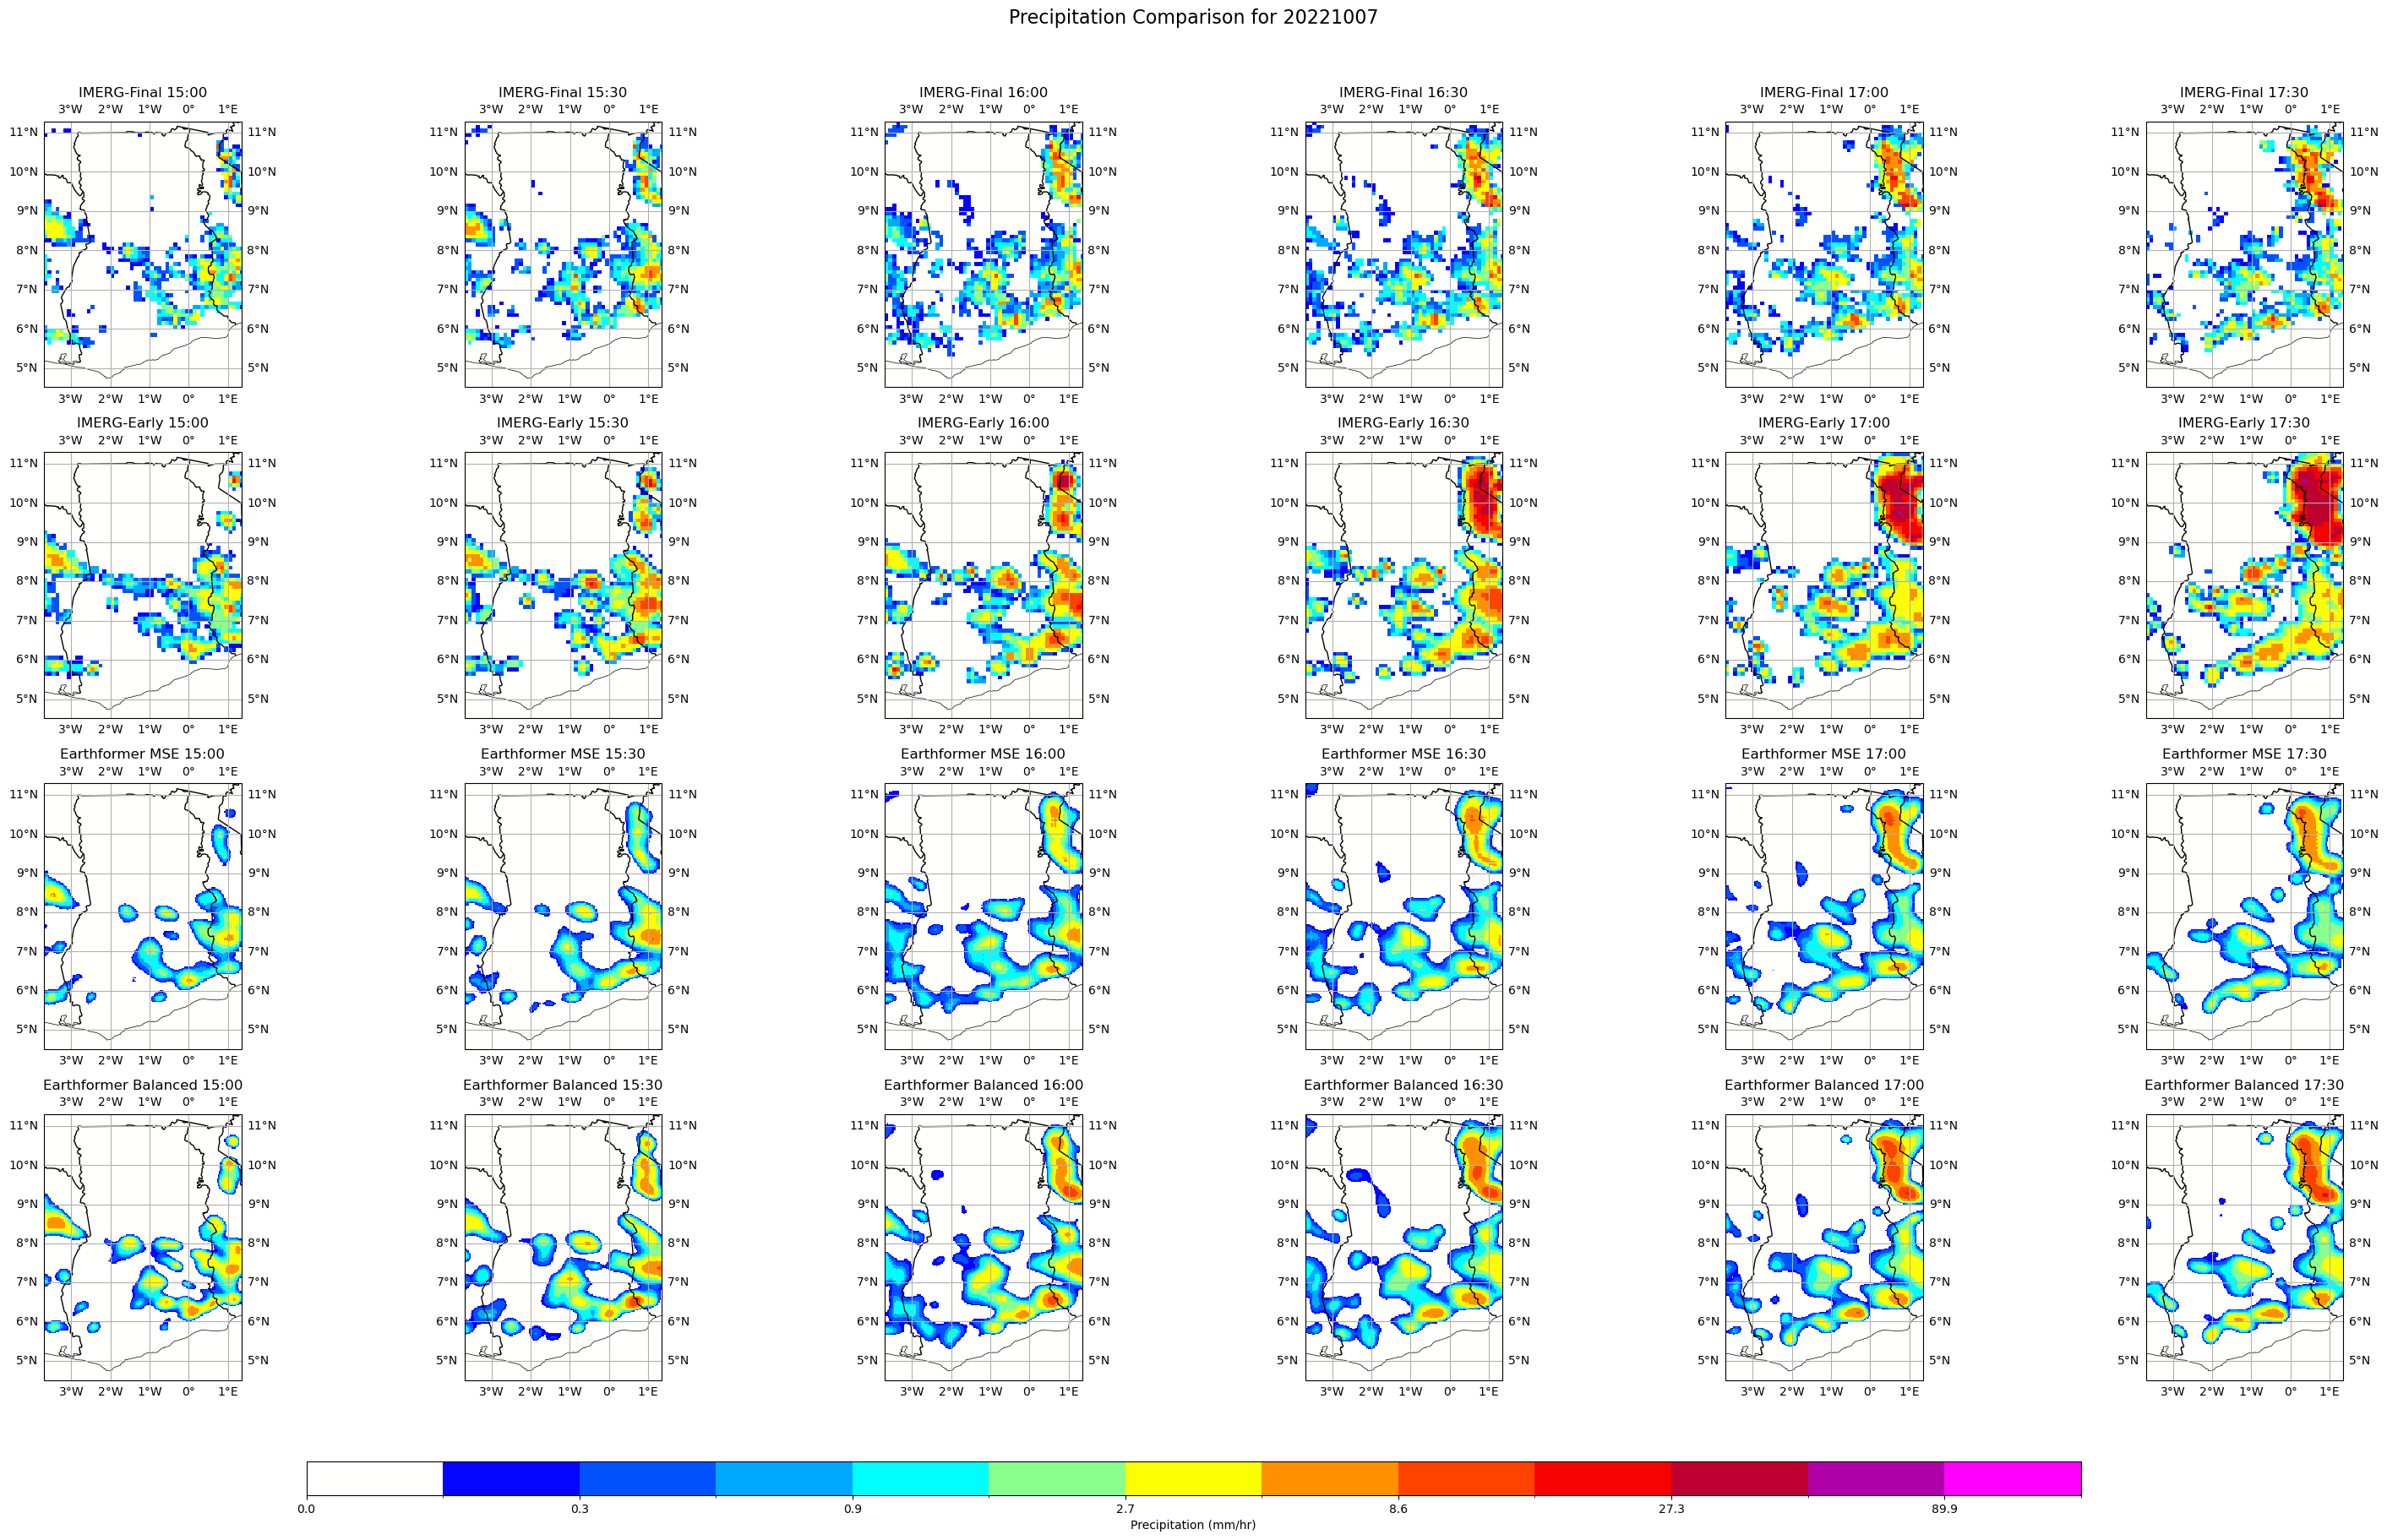

In [16]:
plot_precip_comparison_combined(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20221007",
    time_range=(15, 17),
    version_early='C',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model))
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S163000-E165959.0990.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S163000-E165959.0990.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S170000-E172959.1020.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S170000-E172959.1020.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S173000-E175959.1050.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S173000-E175959.1050.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S180000-E182959.1080.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S180000-E182959.1080.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_15080\781206263.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


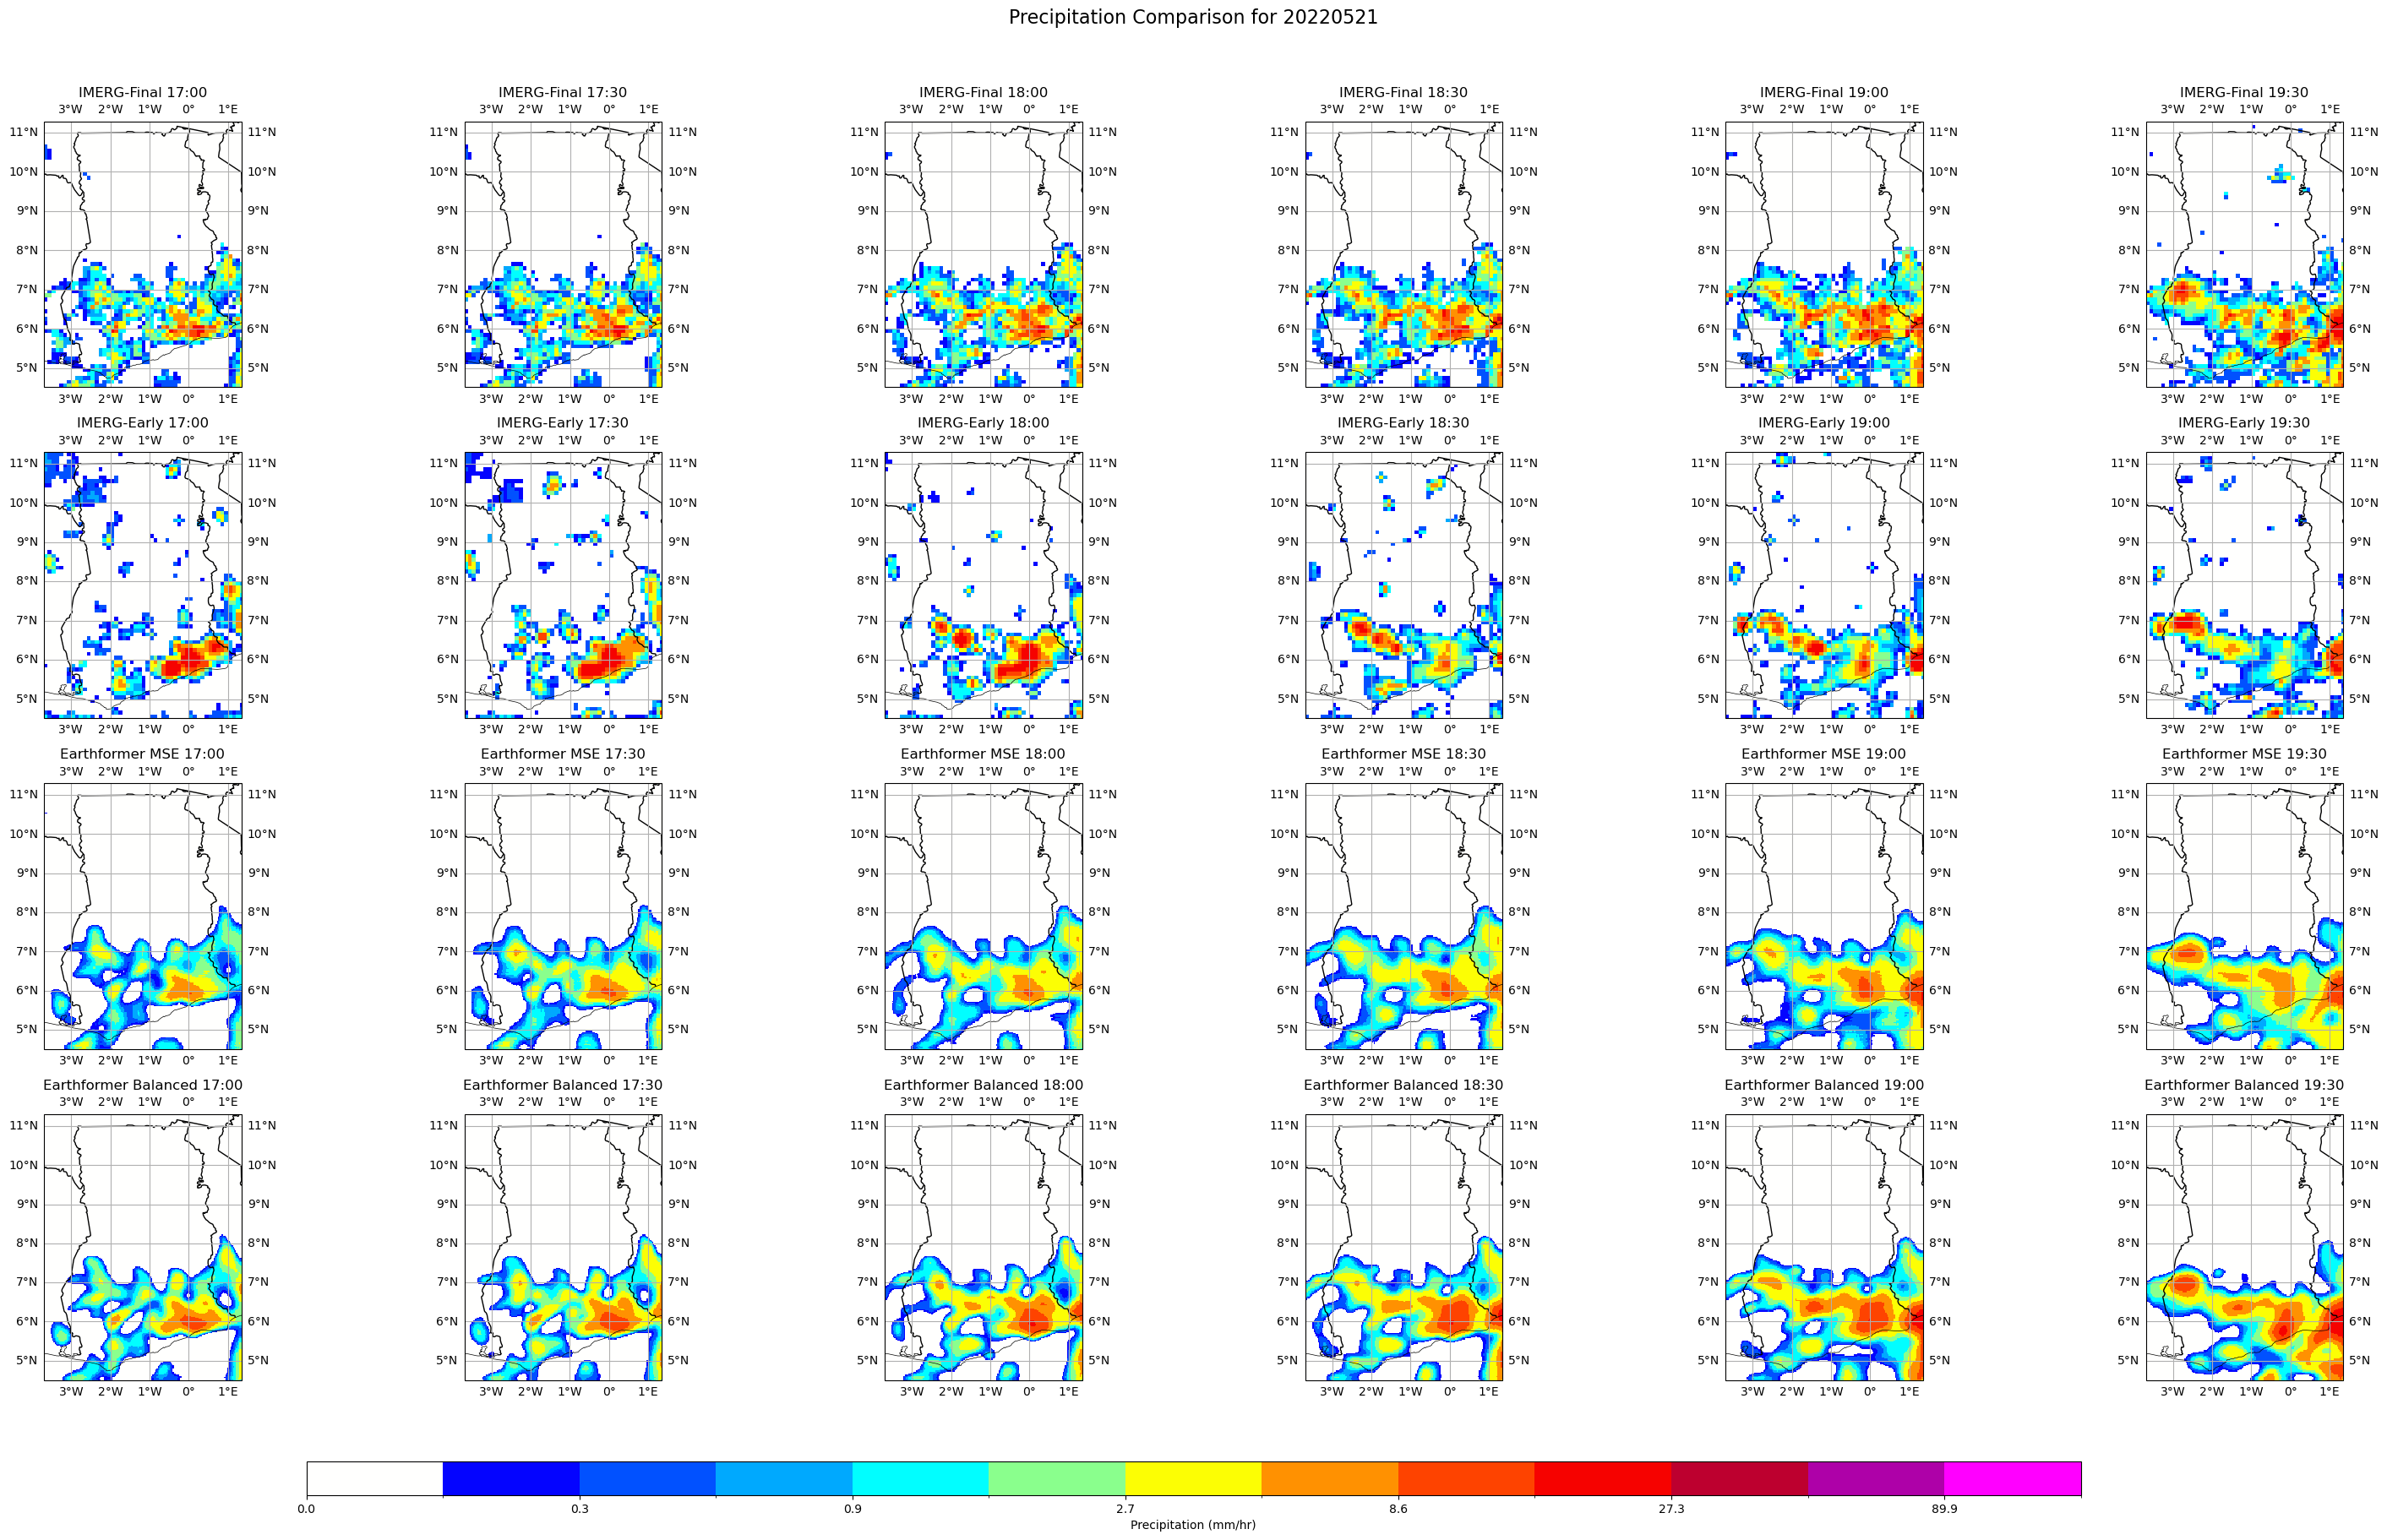

In [17]:
plot_precip_comparison_combined(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220521",
    time_range=(17, 19),
    version_early='C',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model))
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/21\3B-HHR.MS.MRG.3IMERG.20220721-S213000-E215959.1290.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/21\3B-HHR-E.MS.MRG.3IMERG.20220721-S213000-E215959.1290.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/21\3B-HHR.MS.MRG.3IMERG.20220721-S220000-E222959.1320.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/21\3B-HHR-E.MS.MRG.3IMERG.20220721-S220000-E222959.1320.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/21\3B-HHR.MS.MRG.3IMERG.20220721-S223000-E225959.1350.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/21\3B-HHR-E.MS.MRG.3IMERG.20220721-S223000-E225959.1350.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/21\3B-HHR.MS.MRG.3IMERG.20220721-S230000-E232959.1380.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/21\3B-HHR-E.MS.MRG.3IMERG.20220721-S230000-E232959.1380.V06C.HDF5


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_15080\781206263.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


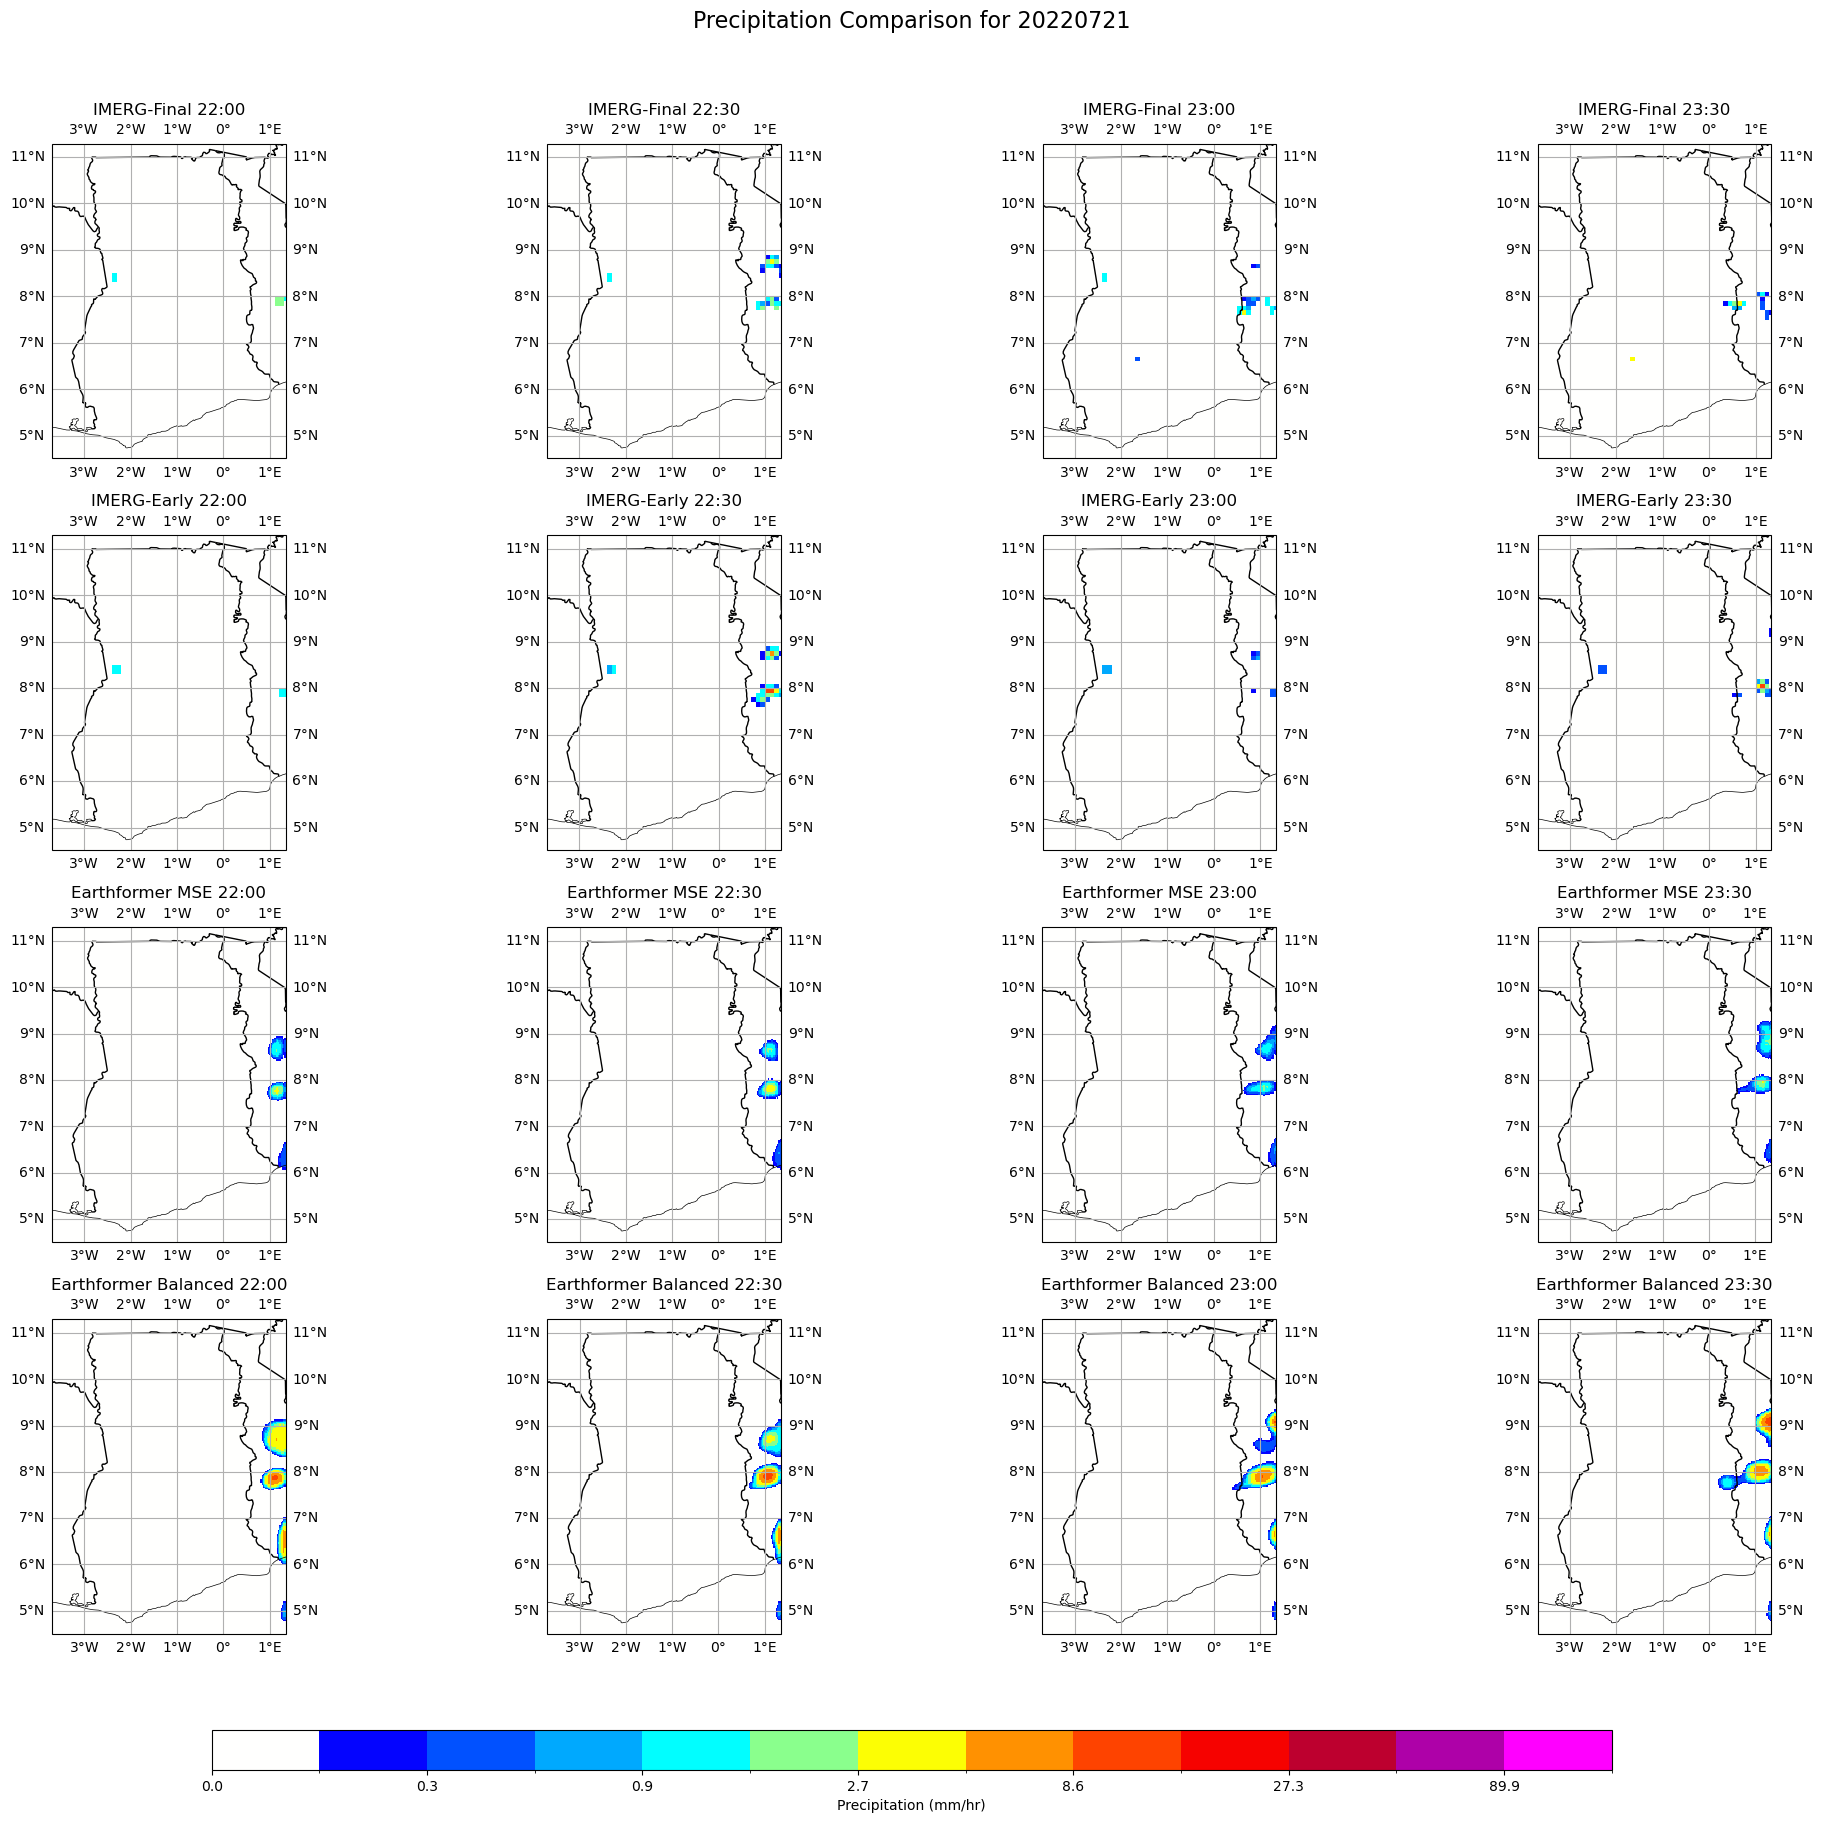

In [18]:
plot_precip_comparison_combined(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220721",
    time_range=(22, 23),
    version_early='C',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model))
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S143000-E145959.0870.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S143000-E145959.0870.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S150000-E152959.0900.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S150000-E152959.0900.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S153000-E155959.0930.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S153000-E155959.0930.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S160000-E162959.0960.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S160000-E162959.0960.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_15080\781206263.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


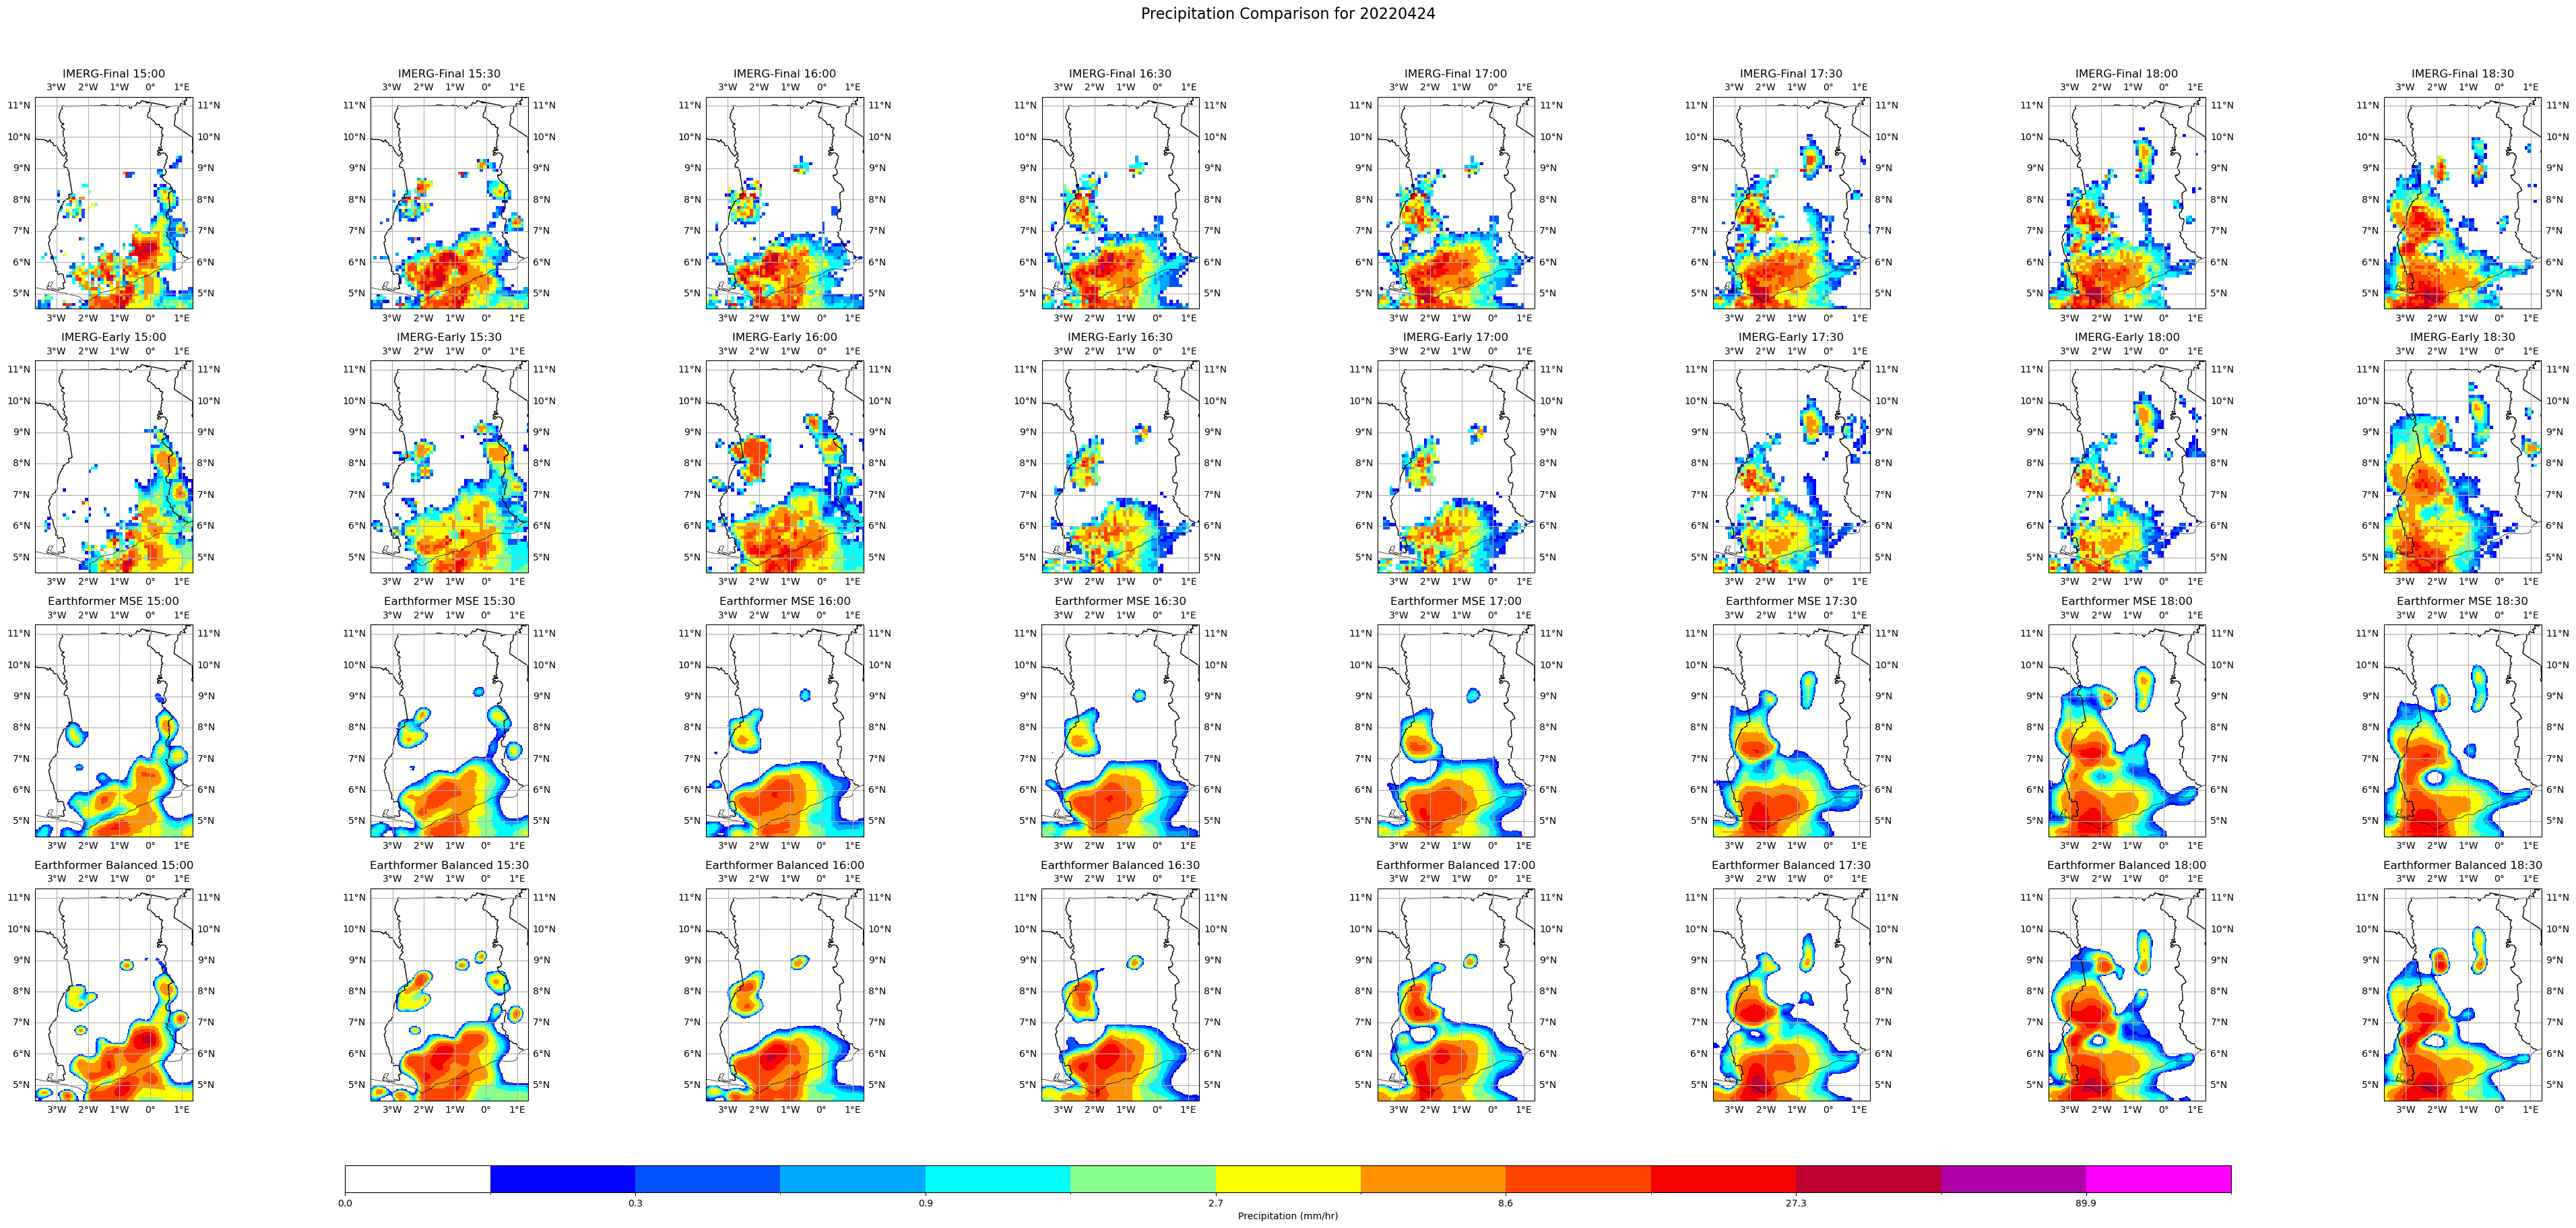

In [21]:
plot_precip_comparison_combined(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220424",
    time_range=(15, 18),
    version_early='B',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model))
)

In [45]:


def plot_precip_comparison_combined_stations(model_dir, model_dir2, imerg_final_dir, imerg_early_dir, date, time_range, version_early, plot_tahmo, plot_gmet, tahmo_stations, gmet_stations, lat_bounds=None, lon_bounds=None):
    """
    Plots IMERG-Final, IMERG-Early, and model output data for a specific date and time range,
    including both full-hour and half-hour timestamps.

    Parameters:
        model_dir (str): Path to the directory containing model output files.
        model_dir2 (str): Path to the directory containing second model output files.
        imerg_final_dir (str): Path to the directory containing IMERG-Final data.
        imerg_early_dir (str): Path to the directory containing IMERG-Early data.
        date (str): Date in 'YYYYMMDD' format.
        time_range (tuple): Time range as (start_hour, end_hour) in 24-hour format.
        version_early (str): Version identifier for IMERG-Early files.
        lat_bounds (tuple): Latitude boundaries as (min_lat, max_lat).
        lon_bounds (tuple): Longitude boundaries as (min_lon, max_lon).
    """
    start_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[0])
    end_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[1])

    # Generate interleaved timestamps for full hours and half hours
    timestamps = []
    current_time = start_time
    while current_time <= end_time:
        timestamps.append(current_time)  # Full hour
        timestamps.append(current_time + timedelta(minutes=30))  # Half hour
        current_time += timedelta(hours=1)

    num_timestamps = len(timestamps)
    fig, axes = plt.subplots(4, num_timestamps, figsize=(5 * num_timestamps, 20), subplot_kw={'projection': ccrs.PlateCarree()})
    fig.suptitle(f"Precipitation Comparison for {date}", fontsize=16)

    def time_to_minutes(time_str):
        time_obj = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
        minutes = time_obj.hour * 60 + time_obj.minute - 30
        return f"{minutes:04d}" if minutes > 0 else "0000"

    def plot_data(ax, file_path, dataset_path, cmap, norm, title):
        if not os.path.exists(file_path):
            ax.set_title("No Data")
            return None

        with h5py.File(file_path, 'r') as f:
            try:
                data = f[dataset_path][:]
                lon = f['Grid/lon'][:]
                lat = f['Grid/lat'][:]
                data = np.flipud(np.squeeze(data.T))

                if lon.ndim == 1 and lat.ndim == 1:
                    lon, lat = np.meshgrid(lon, lat)
                    lat = np.flipud(lat)

                mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading='auto')

                if lat_bounds and lon_bounds:
                    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

                ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
                ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
                #ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
                #ax.set_title(title)

                # Customize gridline label font size and padding
                gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
                gl.top_labels = False
                gl.right_labels = False
                gl.xlabel_style = {'size': 25, 'rotation': 0}  # Longitude label style
                gl.ylabel_style = {'size': 25, 'rotation': 0}
                ax.set_title(title, fontsize = 25)

                # Add station markers
                if plot_tahmo:
                    # Filter only the stations in the provided list
                    selected_stations_tahmo = stations_meta_data_TAHMO[stations_meta_data_TAHMO["station code"].isin(tahmo_stations)]
                    
                    # Scatter plot for selected stations
                    ax.scatter(selected_stations_tahmo["longitude"], selected_stations_tahmo["latitude"], 
                               color='black', s=50, label='TAHMO Stations', transform=ccrs.PlateCarree())
                
                    # Add station labels
                    for _, row in selected_stations_tahmo.iterrows():
                        ax.text(row["longitude"] + 0.05, row["latitude"] + 0.05, row["station code"], 
                                fontsize=12, transform=ccrs.PlateCarree())
    
                
    
                if plot_gmet:
                    # Filter only the stations in the provided list
                    selected_stations_gmet = stations_meta_data_GMET[stations_meta_data_GMET["STN"].isin(gmet_stations)]
                    
                    # Scatter plot for selected stations
                    ax.scatter(selected_stations_gmet["LON"], selected_stations_gmet["LAT"], 
                               color='black', s=50, label='GMET Stations', transform=ccrs.PlateCarree())
                
                    # Add station labels
                    for _, row in selected_stations_gmet.iterrows():
                        ax.text(row["LON"] + 0.05, row["LAT"] + 0.05, row["STN"], 
                                fontsize=12, transform=ccrs.PlateCarree())
                
                return mesh

            except KeyError:
                ax.set_title("Variable Not Found")
                return None

    def plot_data_model(ax, file_path, variable_name, cmap, norm, title):
        if os.path.exists(file_path):
            ds = xr.open_dataset(file_path, engine='netcdf4')
            data = np.flipud(np.squeeze(ds[variable_name].values))
            lon = lon_model
            lat = lat_model
            mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
            ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
            ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
            #ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            #ax.set_title(title)

            # Customize gridline label font size and padding
            gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            gl.top_labels = False
            gl.right_labels = False
            gl.xlabel_style = {'size': 25, 'rotation': 0}  # Longitude label style
            gl.ylabel_style = {'size': 25, 'rotation': 0}
            ax.set_title(title, fontsize = 25)

            if lat_bounds and lon_bounds:
                ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

            # Add station markers
            if plot_tahmo:
                # Filter only the stations in the provided list
                selected_stations_tahmo = stations_meta_data_TAHMO[stations_meta_data_TAHMO["station code"].isin(tahmo_stations)]
                
                # Scatter plot for selected stations
                ax.scatter(selected_stations_tahmo["longitude"], selected_stations_tahmo["latitude"], 
                           color='black', s=50, label='TAHMO Stations', transform=ccrs.PlateCarree())
            
                # Add station labels
                for _, row in selected_stations_tahmo.iterrows():
                    ax.text(row["longitude"] + 0.05, row["latitude"] + 0.05, row["station code"], 
                            fontsize=12, transform=ccrs.PlateCarree())

            

            if plot_gmet:
                # Filter only the stations in the provided list
                selected_stations_gmet = stations_meta_data_GMET[stations_meta_data_GMET["STN"].isin(gmet_stations)]
                
                # Scatter plot for selected stations
                ax.scatter(selected_stations_gmet["LON"], selected_stations_gmet["LAT"], 
                           color='black', s=50, label='GMET Stations', transform=ccrs.PlateCarree())
            
                # Add station labels
                for _, row in selected_stations_gmet.iterrows():
                    ax.text(row["LON"] + 0.05, row["LAT"] + 0.05, row["STN"], 
                            fontsize=12, transform=ccrs.PlateCarree())
                

            return mesh

            
        else:
            ax.set_title("No Data")

    mesh = None


    for col, timestamp in enumerate(timestamps):
        # hour_str = timestamp.strftime('%H:%M')
        
        # minutes = time_to_minutes(timestamp.strftime("%Y-%m-%d %H:%M:%S"))

        # if timestamp.minute == 0:
        #     end_minute = "5959"
        #     start_minute = '3'
        #     imerg_time = timestamp - timedelta(hours=1)
        #     imerg_hour = imerg_time.strftime('%H')
        # else:
        #     end_minute = "2959"
        #     start_minute = '0'
        #     imerg_time = timestamp #- timedelta(hours=1)
        #     imerg_hour = imerg_time.strftime('%H')

        # imerg_final_file = os.path.join(
        #     imerg_final_dir,
        #     timestamp.strftime('%Y/%m/%d'),
        #     f"3B-HHR.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V07B.HDF5"
        # )
        # print(imerg_final_file)

        # imerg_early_file = os.path.join(
        #     imerg_early_dir,
        #     timestamp.strftime('%Y/%m/%d'),
        #     f"3B-HHR-E.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V06{version_early}.HDF5"
        # )
        # print(imerg_early_file)

        if timestamp.hour == 0:
            if timestamp.minute == 0:
                imerg_time = timestamp -timedelta(hours = 1)
                print(imerg_time)
                imerg_hour = '23'
                start_minute = '3'
                end_minute = '5959'
                minutes = '1410'
                hour_str = timestamp.strftime('%H:%M') 
            else:
                imerg_time = timestamp
                imerg_hour = '00'
                start_minute = '0'
                end_minute = '2959'
                minutes = '0000'
                hour_str = timestamp.strftime('%H:%M')
        else:
            imerg_time = timestamp - timedelta(hours=1) if timestamp.minute == 0 else timestamp
            imerg_hour = imerg_time.strftime('%H')
            minutes = f"{imerg_time.minute:02d}00"
        
            hour_str = timestamp.strftime('%H:%M')
                
            minutes = time_to_minutes(timestamp.strftime("%Y-%m-%d %H:%M:%S"))
        
            if timestamp.minute == 0:
                end_minute = "5959"
                start_minute = '3'
                imerg_time = timestamp - timedelta(hours=1)
                imerg_hour = imerg_time.strftime('%H')
            else:
                end_minute = "2959"
                start_minute = '0'
                imerg_time = timestamp #- timedelta(hours=1)
                imerg_hour = imerg_time.strftime('%H')
        print(imerg_time)
    
        imerg_early_file = os.path.join(
            imerg_early_dir,
            imerg_time.strftime('%Y/%m/%d'),
            f"3B-HHR-E.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V06{version_early}.HDF5"
        )

        imerg_final_file = os.path.join(
            imerg_final_dir,
            imerg_time.strftime('%Y/%m/%d'),
            f"3B-HHR.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V07B.HDF5"
        )
        print(imerg_early_file)
        print(imerg_final_file)

        model_file1 = os.path.join(model_dir, f"Combined_{(timestamp - timedelta(seconds=1)).strftime('%Y%m%d%H%M%S')}.h.h5")
        model_file2 = os.path.join(model_dir2, f"Combined_{(timestamp - timedelta(seconds=1)).strftime('%Y%m%d%H%M%S')}.h.h5")

        mesh = plot_data(axes[0, col], imerg_final_file, 'Grid/precipitation', custom_cmap, custom_norm, f"IMERG-Final {hour_str}") or mesh
        mesh = plot_data(axes[1, col], imerg_early_file, 'Grid/precipitationCal', custom_cmap, custom_norm, f"IMERG-Early {hour_str}") or mesh
        mesh = plot_data_model(axes[2, col], model_file1, 'y_hat', custom_cmap, custom_norm, f"Earthformer MSE {hour_str}") or mesh
        mesh = plot_data_model(axes[3, col], model_file2, 'y_hat', custom_cmap, custom_norm, f"Earthformer Balanced {hour_str}") or mesh

    if mesh:
        cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.02])
        cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
        cbar.set_label('Precipitation (mm/hr)', fontsize = 20)
        cbar.set_ticks(intervals)  # Explicitly set tick positions
        cbar.set_ticklabels([str(i) for i in intervals])  # Ensure all labels appear
        cbar.ax.tick_params(labelsize=20)

    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    plt.savefig(f'timeserie_event_station{timestamps[0].strftime("%Y%m%d%H%M%S")}.png', bbox_inches='tight', dpi=300)
    plt.show()


In [49]:


def plot_precip_comparison_combined_stations_zoomed(model_dir, model_dir2, imerg_final_dir, imerg_early_dir, date, time_range, version_early, plot_tahmo, plot_gmet, tahmo_stations, gmet_stations, lat_bounds=None, lon_bounds=None):
    """
    Plots IMERG-Final, IMERG-Early, and model output data for a specific date and time range,
    including both full-hour and half-hour timestamps.

    Parameters:
        model_dir (str): Path to the directory containing model output files.
        model_dir2 (str): Path to the directory containing second model output files.
        imerg_final_dir (str): Path to the directory containing IMERG-Final data.
        imerg_early_dir (str): Path to the directory containing IMERG-Early data.
        date (str): Date in 'YYYYMMDD' format.
        time_range (tuple): Time range as (start_hour, end_hour) in 24-hour format.
        version_early (str): Version identifier for IMERG-Early files.
        lat_bounds (tuple): Latitude boundaries as (min_lat, max_lat).
        lon_bounds (tuple): Longitude boundaries as (min_lon, max_lon).
    """
    start_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[0])
    end_time = datetime.strptime(date, '%Y%m%d') + timedelta(hours=time_range[1])

    # Generate interleaved timestamps for full hours and half hours
    timestamps = []
    current_time = start_time
    while current_time <= end_time:
        timestamps.append(current_time)  # Full hour
        timestamps.append(current_time + timedelta(minutes=30))  # Half hour
        current_time += timedelta(hours=1)

    num_timestamps = len(timestamps)
    fig, axes = plt.subplots(4, num_timestamps, figsize=(5 * num_timestamps, 20), subplot_kw={'projection': ccrs.PlateCarree()})
    fig.suptitle(f"Precipitation Comparison for {date}", fontsize=16)

    def time_to_minutes(time_str):
        time_obj = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
        minutes = time_obj.hour * 60 + time_obj.minute - 30
        return f"{minutes:04d}" if minutes > 0 else "0000"

    def plot_data(ax, file_path, dataset_path, cmap, norm, title):
        if not os.path.exists(file_path):
            ax.set_title("No Data")
            return None

        with h5py.File(file_path, 'r') as f:
            try:
                data = f[dataset_path][:]
                lon = f['Grid/lon'][:]
                lat = f['Grid/lat'][:]
                data = np.flipud(np.squeeze(data.T))

                if lon.ndim == 1 and lat.ndim == 1:
                    lon, lat = np.meshgrid(lon, lat)
                    lat = np.flipud(lat)

                mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading='auto')

                if lat_bounds and lon_bounds:
                    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

                ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
                ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
                #ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
                #ax.set_title(title)
                gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
                
                # Customize gridline label font size and padding
                gl.top_labels = False
                gl.right_labels = False
                gl.xlabel_style = {'size': 25, 'rotation': 0}  # Longitude label style
                gl.ylabel_style = {'size': 25, 'rotation': 0}
                ax.set_title(title, fontsize = 25)

                # Add station markers
                if plot_tahmo:
                    # Filter only the stations in the provided list
                    selected_stations_tahmo = stations_meta_data_TAHMO[stations_meta_data_TAHMO["station code"].isin(tahmo_stations)]
                    
                    # Scatter plot for selected stations
                    ax.scatter(selected_stations_tahmo["longitude"], selected_stations_tahmo["latitude"], 
                               color='black', s=120, label='TAHMO Stations', transform=ccrs.PlateCarree())
                
                    # Add station labels
                    for _, row in selected_stations_tahmo.iterrows():
                        ax.text(row["longitude"] + 0.05, row["latitude"] + 0.05, row["station code"], 
                                fontsize=16, transform=ccrs.PlateCarree())
    
                
    
                if plot_gmet:
                    # Filter only the stations in the provided list
                    selected_stations_gmet = stations_meta_data_GMET[stations_meta_data_GMET["STN"].isin(gmet_stations)]
                    
                    # Scatter plot for selected stations
                    ax.scatter(selected_stations_gmet["LON"], selected_stations_gmet["LAT"], 
                               color='black', s=120, label='GMET Stations', transform=ccrs.PlateCarree())
                
                    # Add station labels
                    for _, row in selected_stations_gmet.iterrows():
                        ax.text(row["LON"] + 0.05, row["LAT"] + 0.05, row["STN"], 
                                fontsize=16, transform=ccrs.PlateCarree())
                
                return mesh

            except KeyError:
                ax.set_title("Variable Not Found")
                return None

    def plot_data_model(ax, file_path, variable_name, cmap, norm, title):
        if os.path.exists(file_path):
            ds = xr.open_dataset(file_path, engine='netcdf4')
            data = np.flipud(np.squeeze(ds[variable_name].values))
            lon = lon_model
            lat = lat_model
            mesh = ax.pcolormesh(lon, lat, data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
            ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
            ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
            #ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            #ax.set_title(title)

            # Customize gridline label font size and padding
            gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            gl.top_labels = False
            gl.right_labels = False
            gl.xlabel_style = {'size': 25, 'rotation': 0}  # Longitude label style
            gl.ylabel_style = {'size': 25, 'rotation': 0}
            ax.set_title(title, fontsize = 25)

            if lat_bounds and lon_bounds:
                    ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

            # Add station markers
            if plot_tahmo:
                # Filter only the stations in the provided list
                selected_stations_tahmo = stations_meta_data_TAHMO[stations_meta_data_TAHMO["station code"].isin(tahmo_stations)]
                
                # Scatter plot for selected stations
                ax.scatter(selected_stations_tahmo["longitude"], selected_stations_tahmo["latitude"], 
                           color='black', s=120, label='TAHMO Stations', transform=ccrs.PlateCarree())
            
                # Add station labels
                for _, row in selected_stations_tahmo.iterrows():
                    ax.text(row["longitude"] + 0.05, row["latitude"] + 0.05, row["station code"], 
                            fontsize=16, transform=ccrs.PlateCarree())

            

            if plot_gmet:
                # Filter only the stations in the provided list
                selected_stations_gmet = stations_meta_data_GMET[stations_meta_data_GMET["STN"].isin(gmet_stations)]
                
                # Scatter plot for selected stations
                ax.scatter(selected_stations_gmet["LON"], selected_stations_gmet["LAT"], 
                           color='black', s=120, label='GMET Stations', transform=ccrs.PlateCarree())
            
                # Add station labels
                for _, row in selected_stations_gmet.iterrows():
                    ax.text(row["LON"] + 0.05, row["LAT"] + 0.05, row["STN"], 
                            fontsize=16, transform=ccrs.PlateCarree())
                

            return mesh

            
        else:
            ax.set_title("No Data")

    mesh = None

    for col, timestamp in enumerate(timestamps):
        # hour_str = timestamp.strftime('%H:%M')
        
        # minutes = time_to_minutes(timestamp.strftime("%Y-%m-%d %H:%M:%S"))

        # if timestamp.minute == 0:
        #     end_minute = "5959"
        #     start_minute = '3'
        #     imerg_time = timestamp - timedelta(hours=1)
        #     imerg_hour = imerg_time.strftime('%H')
        # else:
        #     end_minute = "2959"
        #     start_minute = '0'
        #     imerg_time = timestamp #- timedelta(hours=1)
        #     imerg_hour = imerg_time.strftime('%H')

        # imerg_final_file = os.path.join(
        #     imerg_final_dir,
        #     timestamp.strftime('%Y/%m/%d'),
        #     f"3B-HHR.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V07B.HDF5"
        # )
        # print(imerg_final_file)

        # imerg_early_file = os.path.join(
        #     imerg_early_dir,
        #     timestamp.strftime('%Y/%m/%d'),
        #     f"3B-HHR-E.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V06{version_early}.HDF5"
        # )
        # print(imerg_early_file)

        # model_file1 = os.path.join(model_dir, f"Combined_{(timestamp - timedelta(seconds=1)).strftime('%Y%m%d%H%M%S')}.h.h5")
        # model_file2 = os.path.join(model_dir2, f"Combined_{(timestamp - timedelta(seconds=1)).strftime('%Y%m%d%H%M%S')}.h.h5")
        if timestamp.hour == 0:
            if timestamp.minute == 0:
                imerg_time = timestamp -timedelta(hours = 1)
                print(imerg_time)
                imerg_hour = '23'
                start_minute = '3'
                end_minute = '5959'
                minutes = '1410'
                hour_str = timestamp.strftime('%H:%M') 
            else:
                imerg_time = timestamp
                imerg_hour = '00'
                start_minute = '0'
                end_minute = '2959'
                minutes = '0000'
                hour_str = timestamp.strftime('%H:%M')
        else:
            imerg_time = timestamp - timedelta(hours=1) if timestamp.minute == 0 else timestamp
            imerg_hour = imerg_time.strftime('%H')
            minutes = f"{imerg_time.minute:02d}00"
        
            hour_str = timestamp.strftime('%H:%M')
                
            minutes = time_to_minutes(timestamp.strftime("%Y-%m-%d %H:%M:%S"))
        
            if timestamp.minute == 0:
                end_minute = "5959"
                start_minute = '3'
                imerg_time = timestamp - timedelta(hours=1)
                imerg_hour = imerg_time.strftime('%H')
            else:
                end_minute = "2959"
                start_minute = '0'
                imerg_time = timestamp #- timedelta(hours=1)
                imerg_hour = imerg_time.strftime('%H')
        print(imerg_time)
    
        imerg_early_file = os.path.join(
            imerg_early_dir,
            imerg_time.strftime('%Y/%m/%d'),
            f"3B-HHR-E.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V06{version_early}.HDF5"
        )

        imerg_final_file = os.path.join(
            imerg_final_dir,
            imerg_time.strftime('%Y/%m/%d'),
            f"3B-HHR.MS.MRG.3IMERG.{imerg_time.strftime('%Y%m%d')}-S{imerg_hour}{start_minute}000-E{imerg_hour}{end_minute}.{minutes}.V07B.HDF5"
        )

        model_file1 = os.path.join(model_dir, f"Combined_{(timestamp - timedelta(seconds=1)).strftime('%Y%m%d%H%M%S')}.h.h5")
        model_file2 = os.path.join(model_dir2, f"Combined_{(timestamp - timedelta(seconds=1)).strftime('%Y%m%d%H%M%S')}.h.h5")

        mesh = plot_data(axes[0, col], imerg_final_file, 'Grid/precipitation', custom_cmap, custom_norm, f"IMERG-Final {hour_str}") or mesh
        mesh = plot_data(axes[1, col], imerg_early_file, 'Grid/precipitationCal', custom_cmap, custom_norm, f"IMERG-Early {hour_str}") or mesh
        mesh = plot_data_model(axes[2, col], model_file1, 'y_hat', custom_cmap, custom_norm, f"Earthformer MSE {hour_str}") or mesh
        mesh = plot_data_model(axes[3, col], model_file2, 'y_hat', custom_cmap, custom_norm, f"Earthformer Balanced {hour_str}") or mesh

    if mesh:
        cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.02])
        cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
        cbar.set_label('Precipitation (mm/hr)', fontsize = 20)
        cbar.set_ticks(intervals)  # Explicitly set tick positions
        cbar.set_ticklabels([str(i) for i in intervals])  # Ensure all labels appear
        cbar.ax.tick_params(labelsize=20)
        

    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    plt.savefig(f'timeserie_event_station_zoomed{timestamps[0].strftime("%Y%m%d%H%M%S")}.png', bbox_inches='tight', dpi=300)
    plt.show()


D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/22\3B-HHR.MS.MRG.3IMERG.20220722-S213000-E215959.1290.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/22\3B-HHR-E.MS.MRG.3IMERG.20220722-S213000-E215959.1290.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/22\3B-HHR.MS.MRG.3IMERG.20220722-S220000-E222959.1320.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/22\3B-HHR-E.MS.MRG.3IMERG.20220722-S220000-E222959.1320.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/22\3B-HHR.MS.MRG.3IMERG.20220722-S223000-E225959.1350.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/22\3B-HHR-E.MS.MRG.3IMERG.20220722-S223000-E225959.1350.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/22\3B-HHR.MS.MRG.3IMERG.20220722-S230000-E232959.1380.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/22\3B-HHR-E.MS.MRG.3IMERG.20220722-S230000-E232959.1380.V06C.HDF5


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_3684\1724524292.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


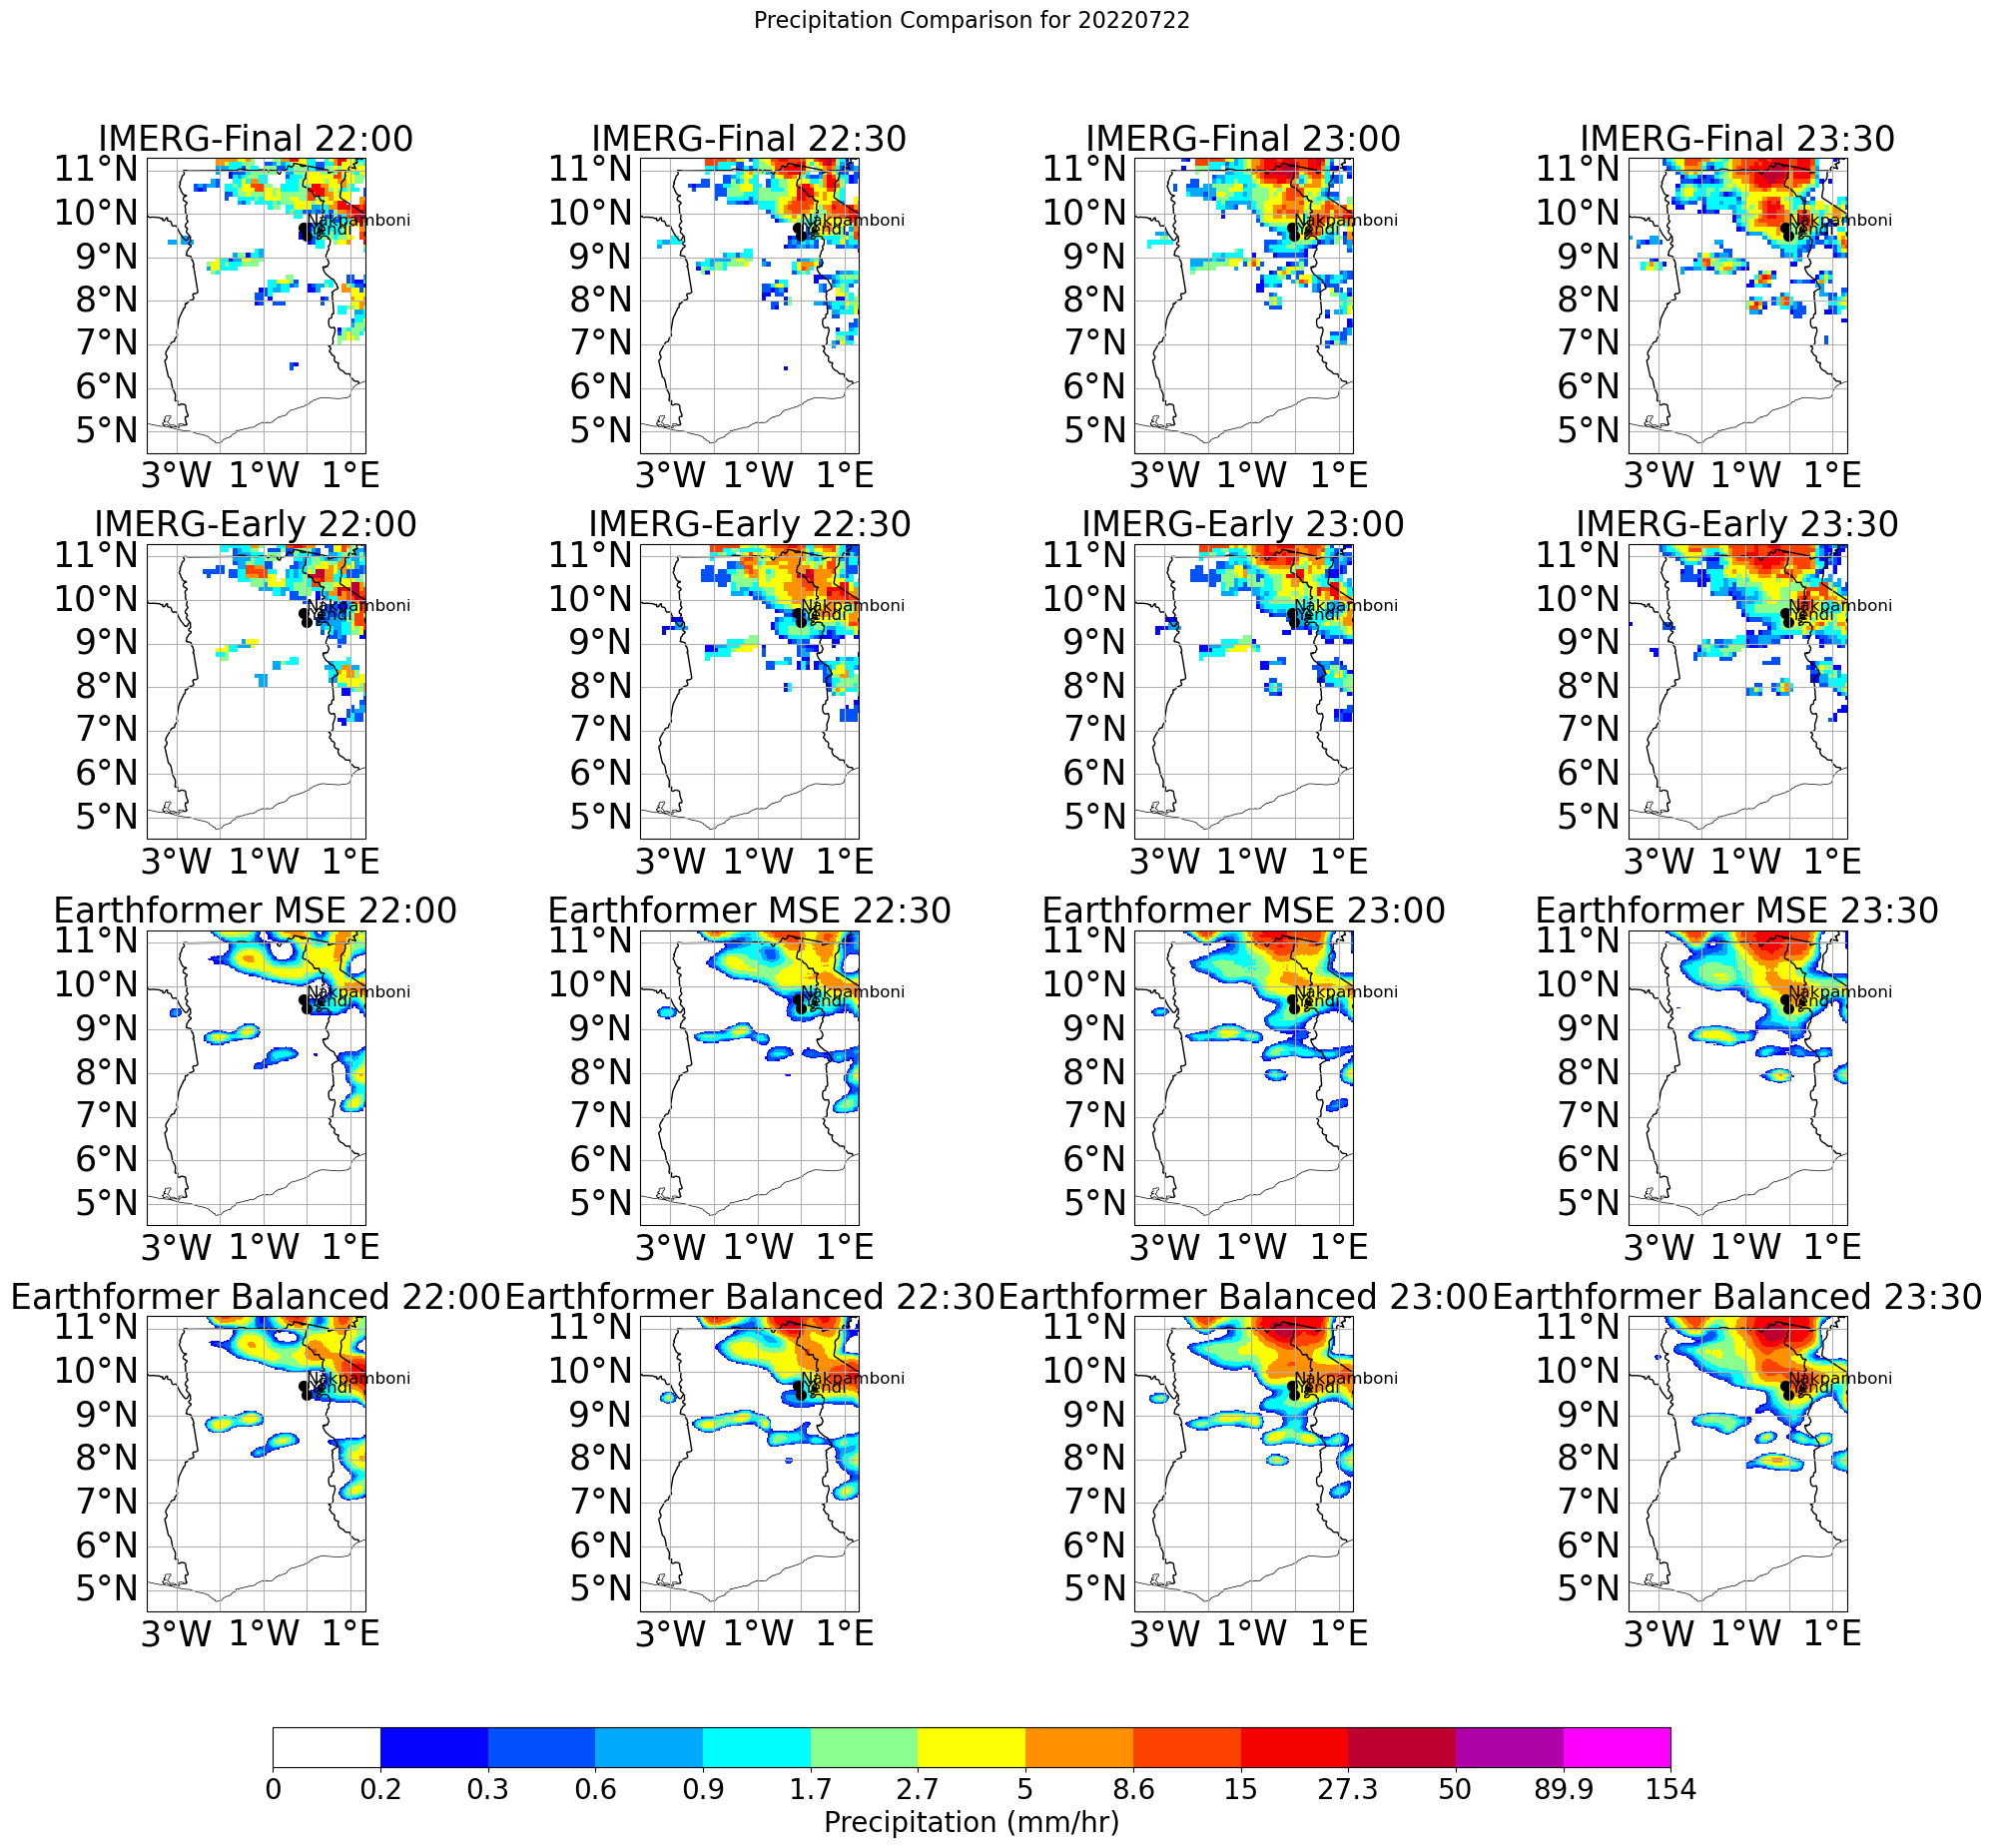

In [18]:
# Example usage
plot_precip_comparison_combined_stations(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220722",
    time_range=(22, 23),
    version_early='C',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model)),
    plot_tahmo=False,
    plot_gmet=True, 
    tahmo_stations = [], 
    gmet_stations = ['Nakpamboni', 'Yendi']
)

2022-07-22 23:00:00
2022-07-22 23:00:00
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/22\3B-HHR-E.MS.MRG.3IMERG.20220722-S233000-E235959.1410.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/22\3B-HHR.MS.MRG.3IMERG.20220722-S233000-E235959.1410.V07B.HDF5
2022-07-23 00:30:00
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S000000-E002959.0000.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S000000-E002959.0000.V07B.HDF5
2022-07-23 00:00:00
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S003000-E005959.0030.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S003000-E005959.0030.V07B.HDF5
2022-07-23 01:30:00
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S010000-E012959.0060.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_16284\1817837945.py:271: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


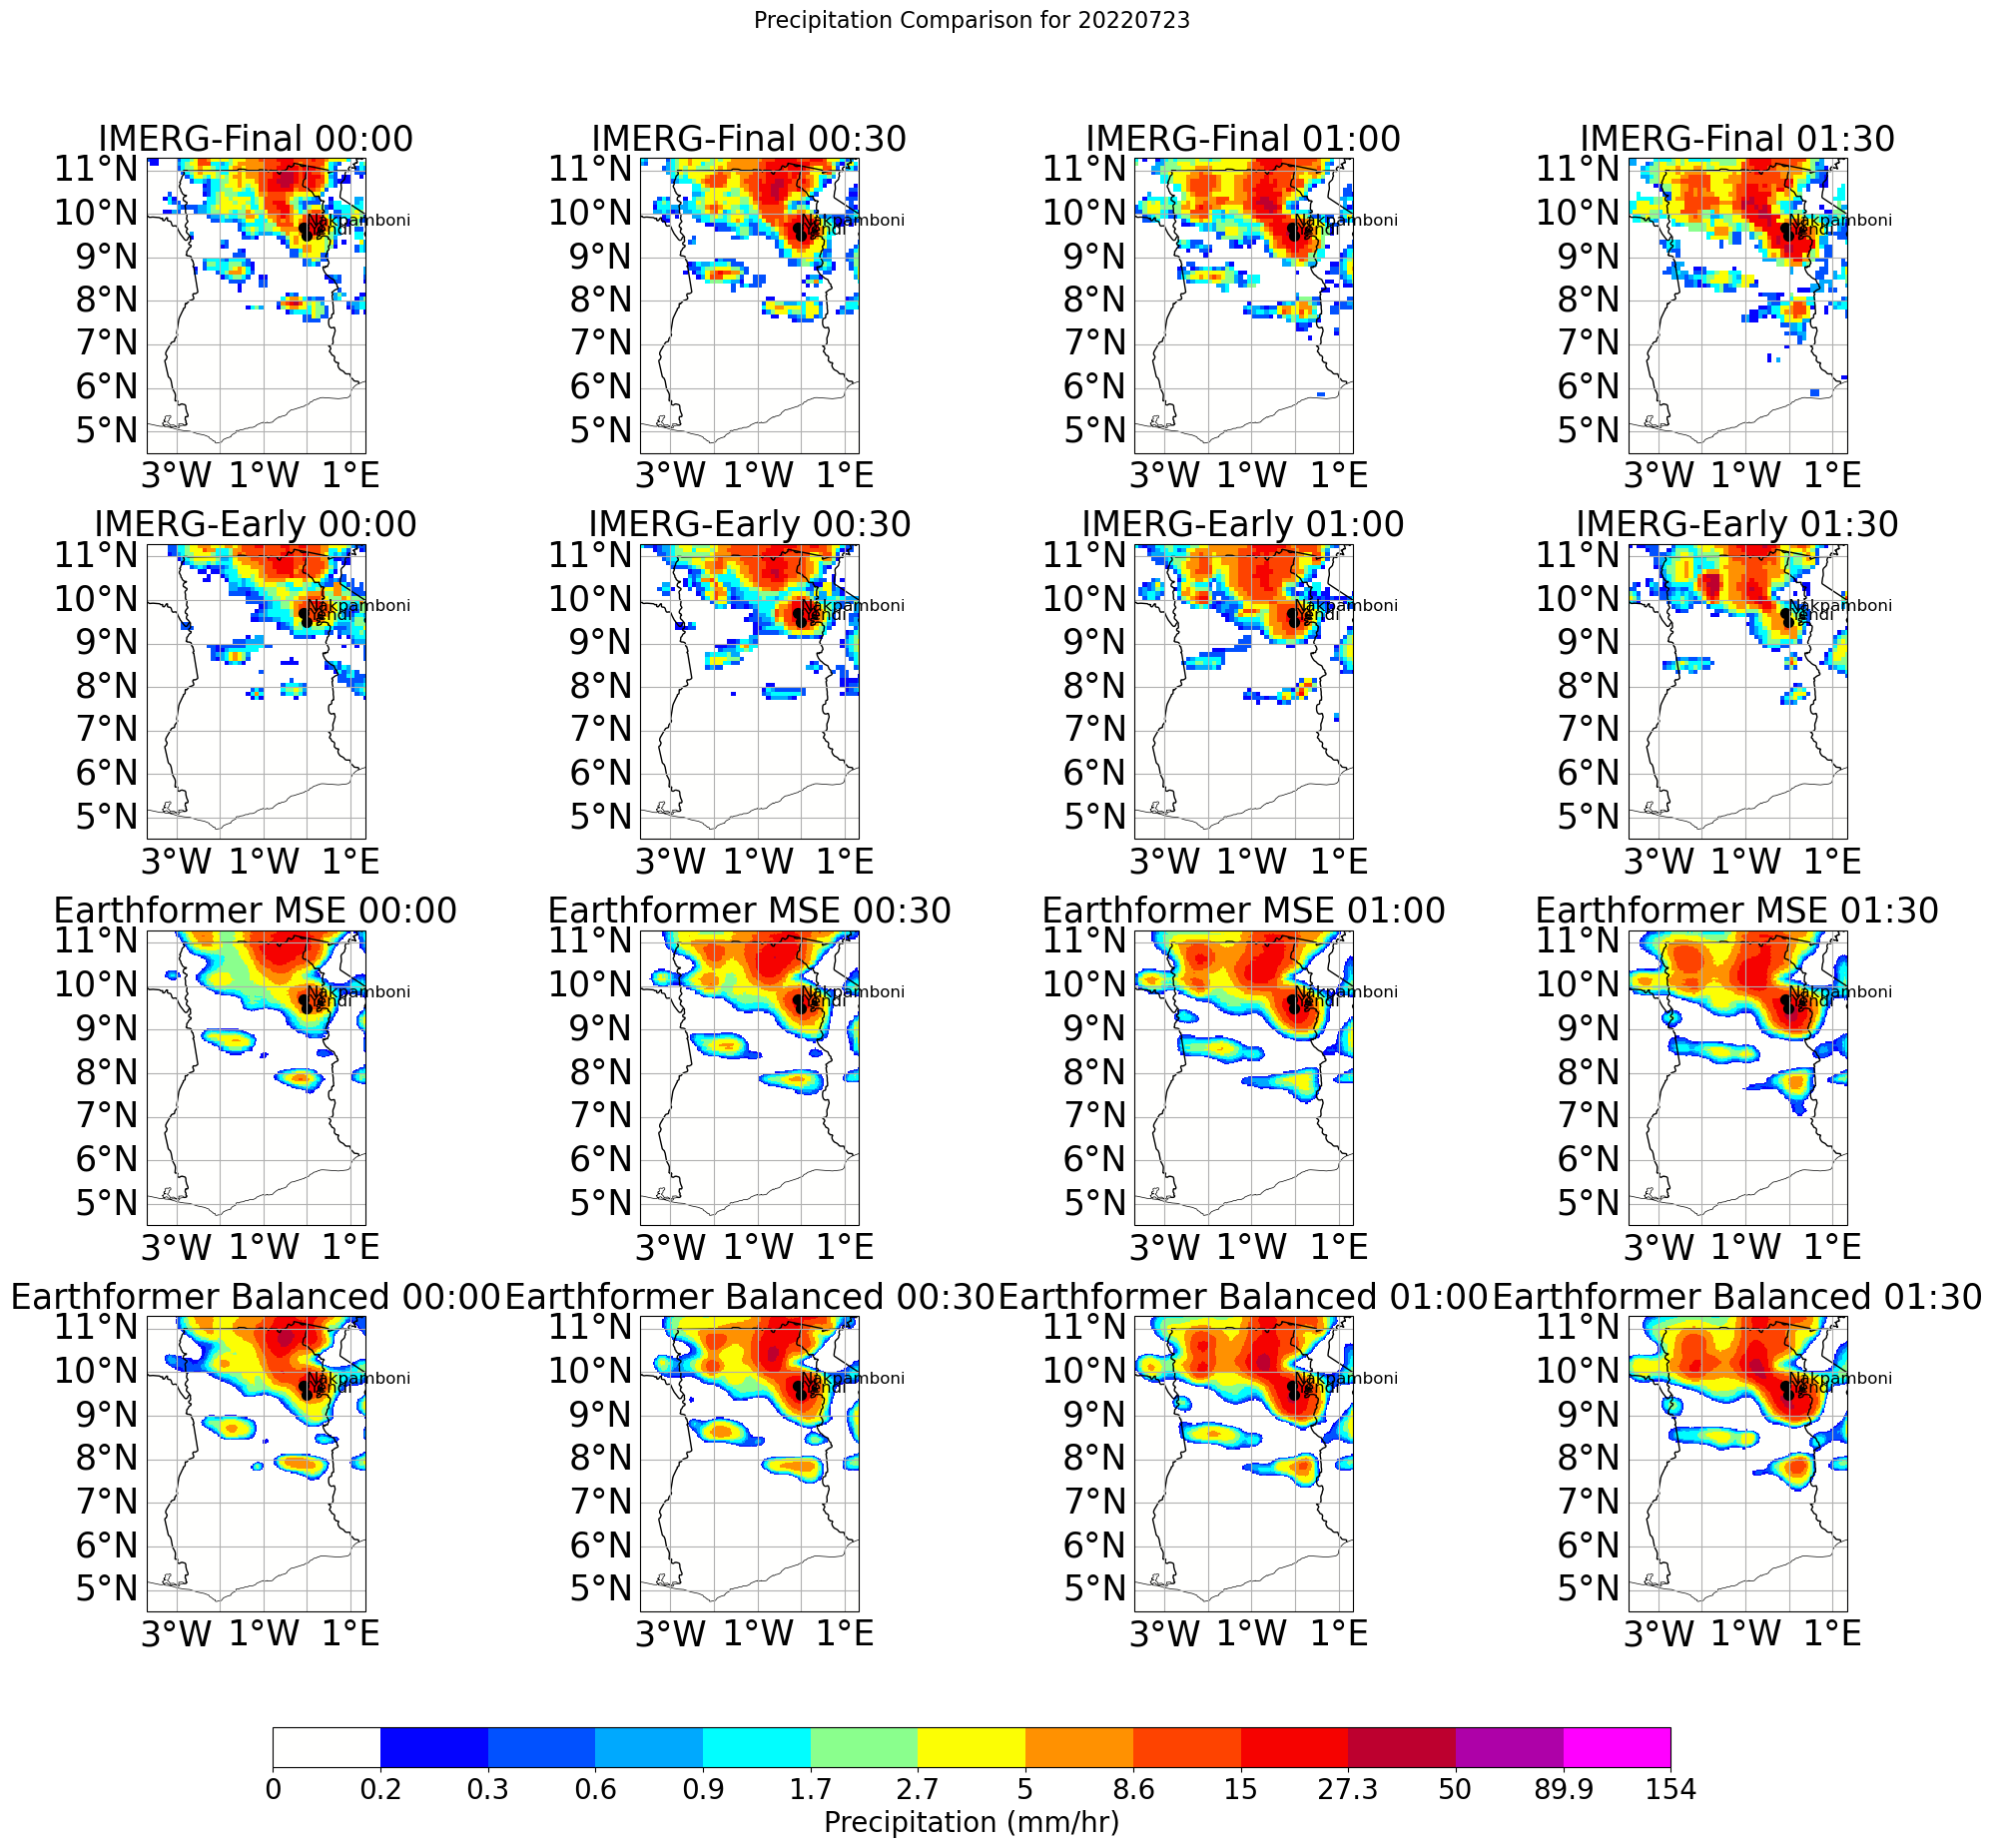

In [46]:
# Example usage
plot_precip_comparison_combined_stations(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220723",
    time_range=(0, 1),
    version_early='C',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model)),
    plot_tahmo=False,
    plot_gmet=True, 
    tahmo_stations = [], 
    gmet_stations = ['Nakpamboni', 'Yendi']
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S003000-E005959.0030.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S003000-E005959.0030.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S010000-E012959.0060.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S010000-E012959.0060.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S013000-E015959.0090.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S013000-E015959.0090.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S020000-E022959.0120.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S020000-E022959.0120.V06C.HDF5


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_3684\1724524292.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


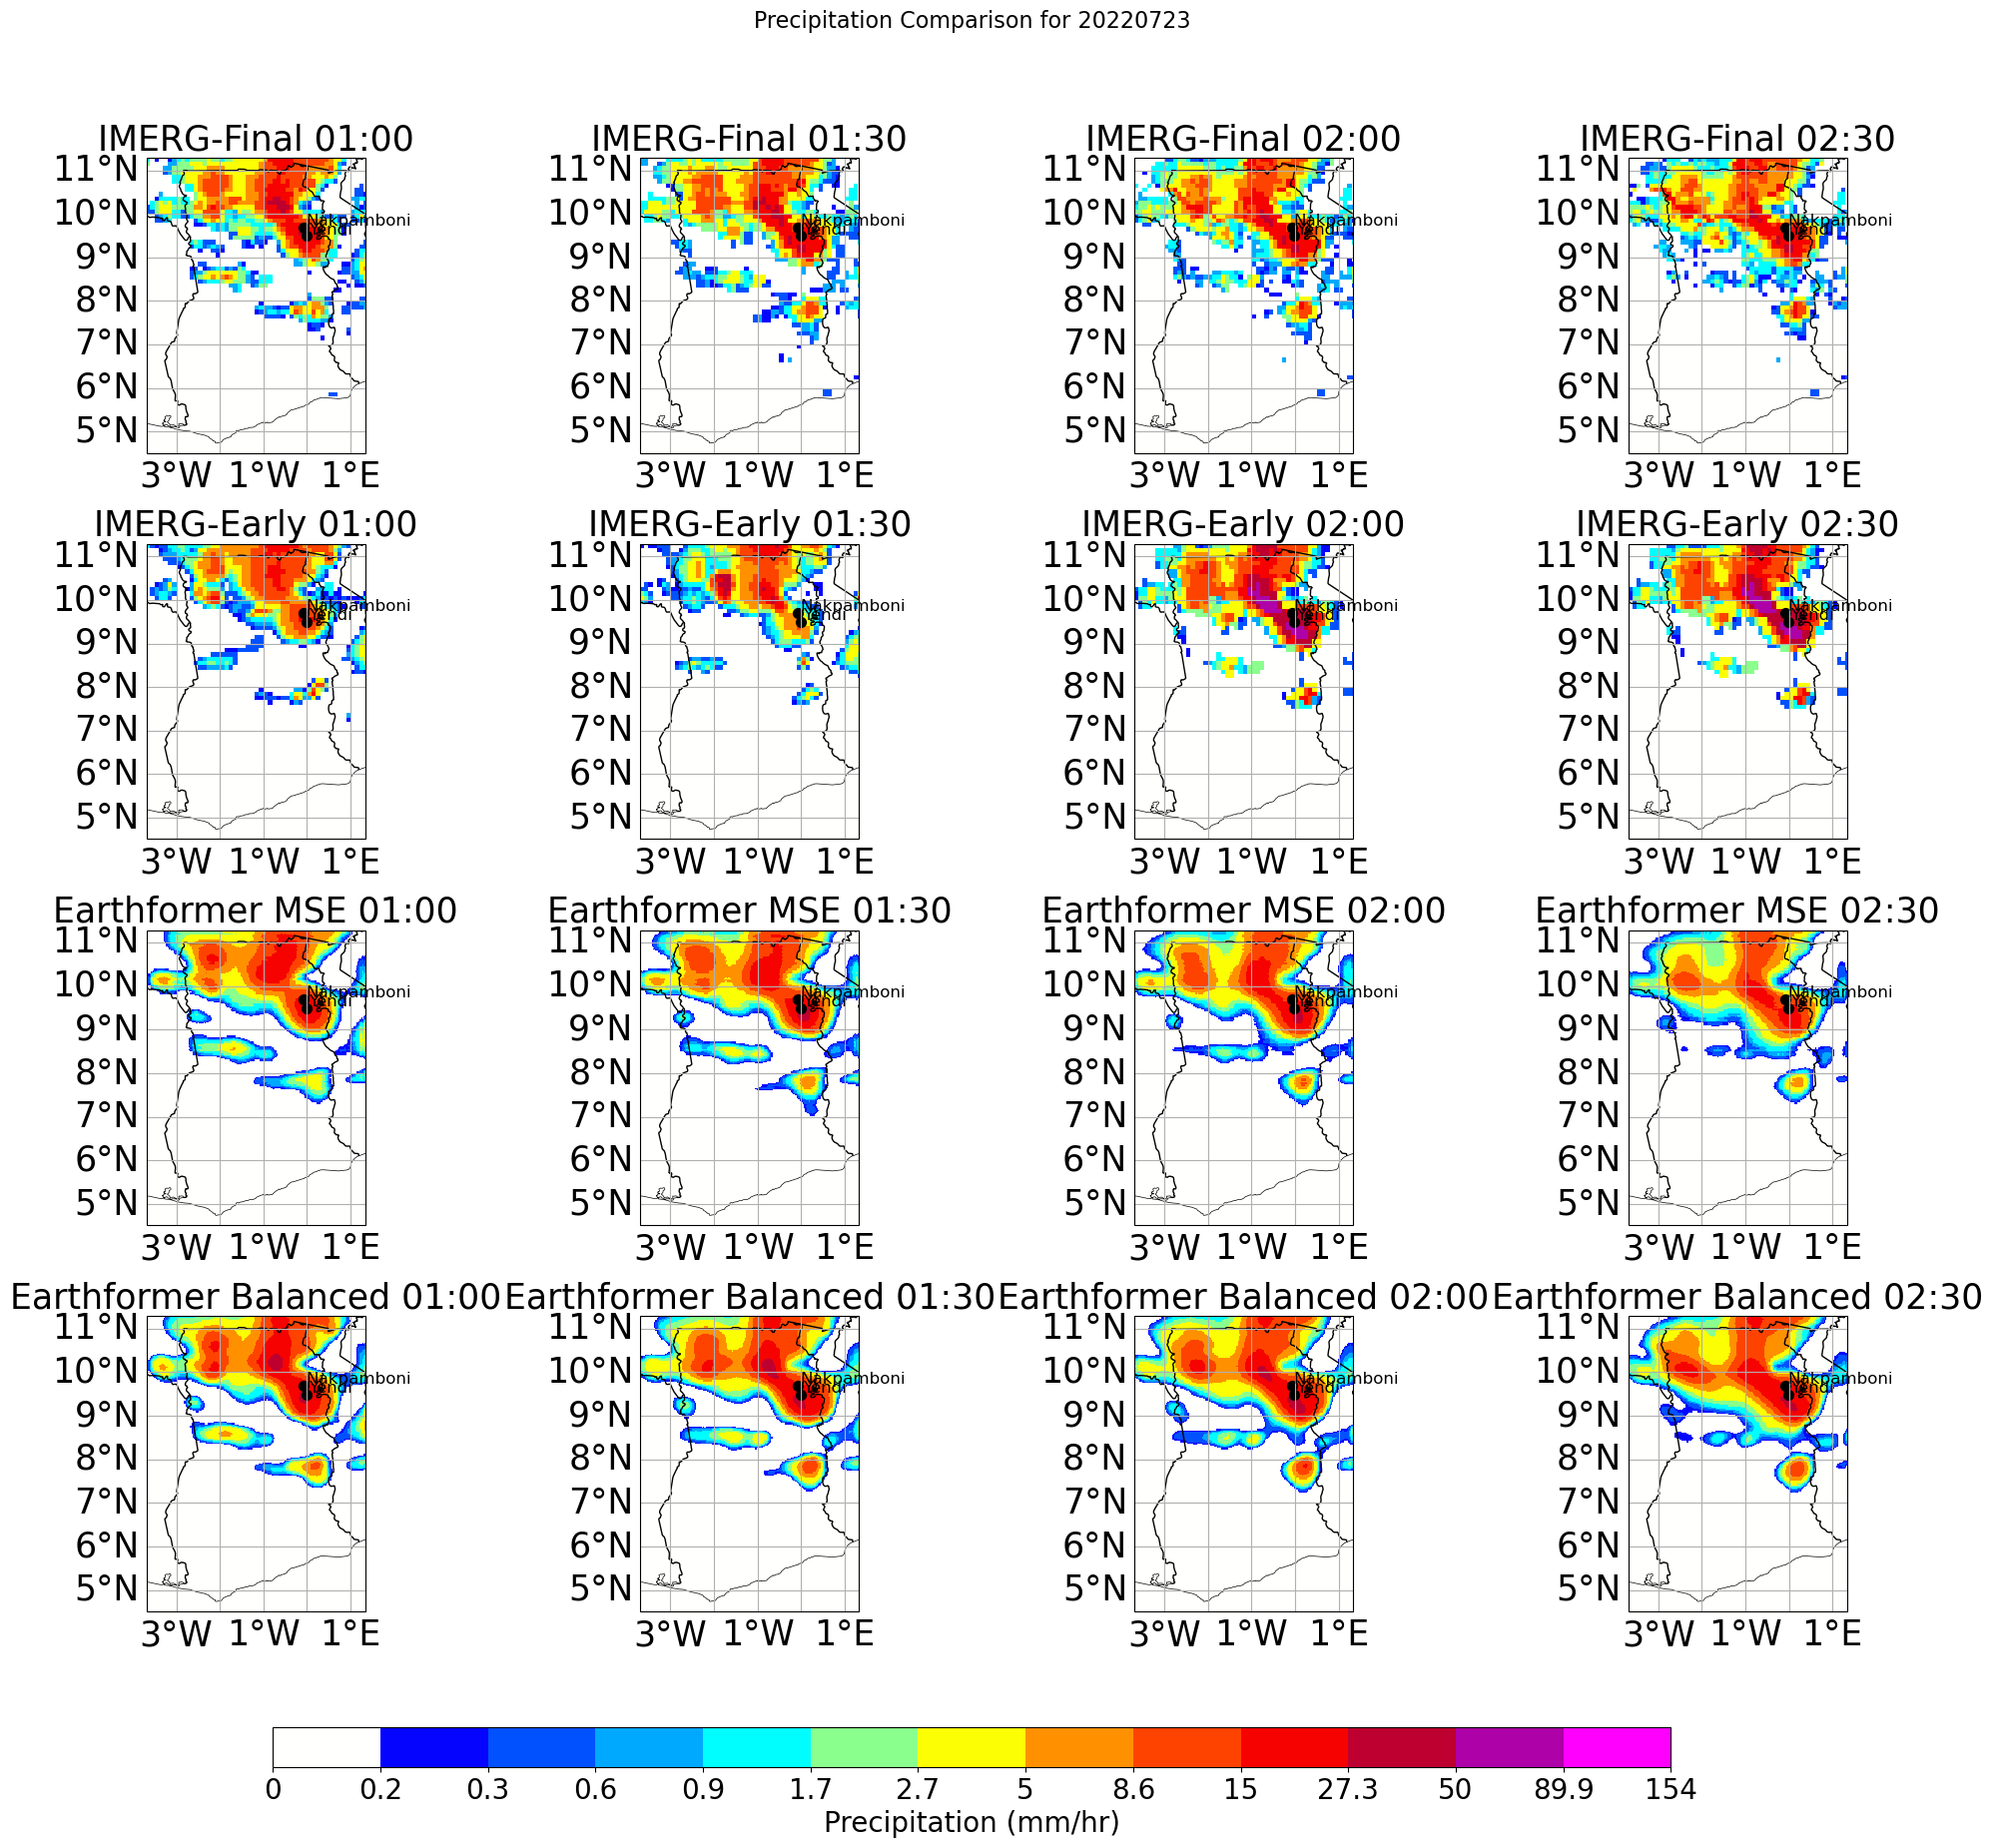

In [22]:
# Example usage
plot_precip_comparison_combined_stations(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220723",
    time_range=(1, 2),
    version_early='C',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model)),
    plot_tahmo=False,
    plot_gmet=True, 
    tahmo_stations = [], 
    gmet_stations = ['Nakpamboni', 'Yendi']
)

2022-07-22 23:00:00
2022-07-22 23:00:00
2022-07-23 00:30:00
2022-07-23 00:00:00
2022-07-23 01:30:00
2022-07-23 01:00:00
2022-07-23 02:30:00


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_16284\1580736448.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


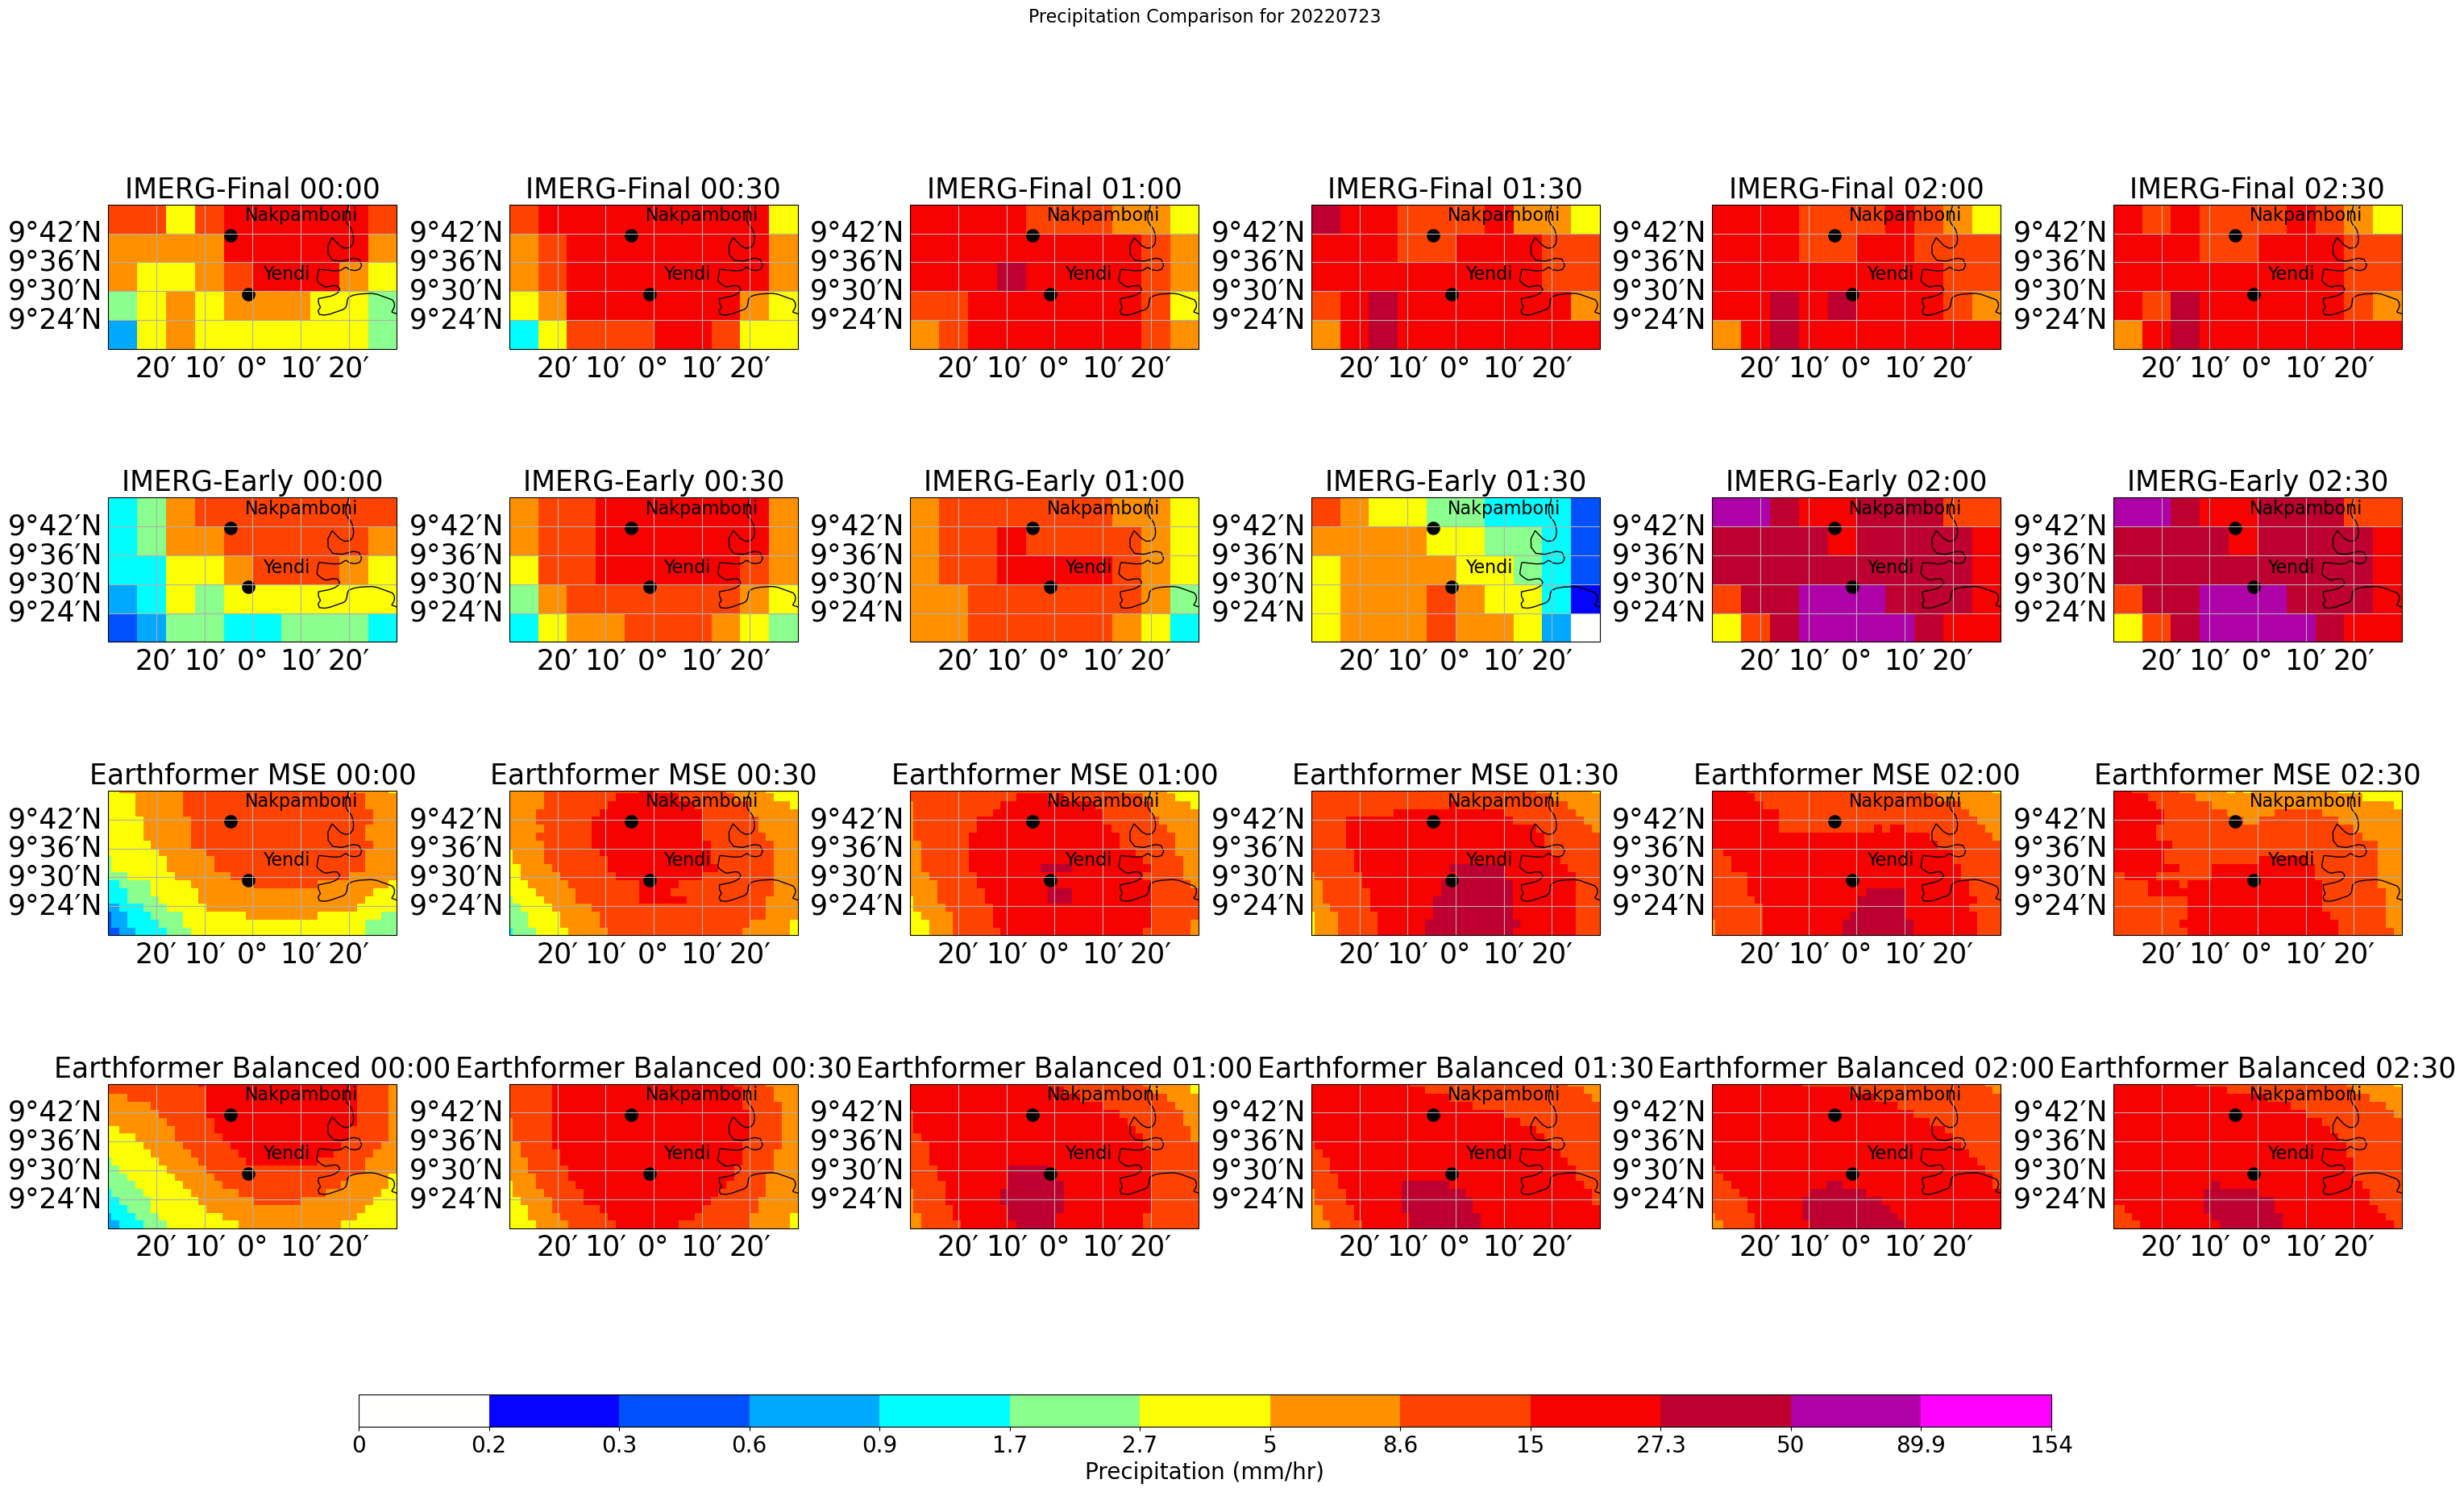

In [51]:
# Example usage
plot_precip_comparison_combined_stations_zoomed(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220723",
    time_range=(0, 2),
    version_early='C',
    lat_bounds=(9.3, 9.8),
    lon_bounds=(-0.5, 0.5),
    plot_tahmo=False,
    plot_gmet=True, 
    tahmo_stations = [], 
    gmet_stations = ['Nakpamboni', 'Yendi']
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S013000-E015959.0090.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S013000-E015959.0090.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S020000-E022959.0120.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S020000-E022959.0120.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S023000-E025959.0150.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S023000-E025959.0150.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/07/23\3B-HHR.MS.MRG.3IMERG.20220723-S030000-E032959.0180.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/07/23\3B-HHR-E.MS.MRG.3IMERG.20220723-S030000-E032959.0180.V06C.HDF5


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_3684\211890812.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


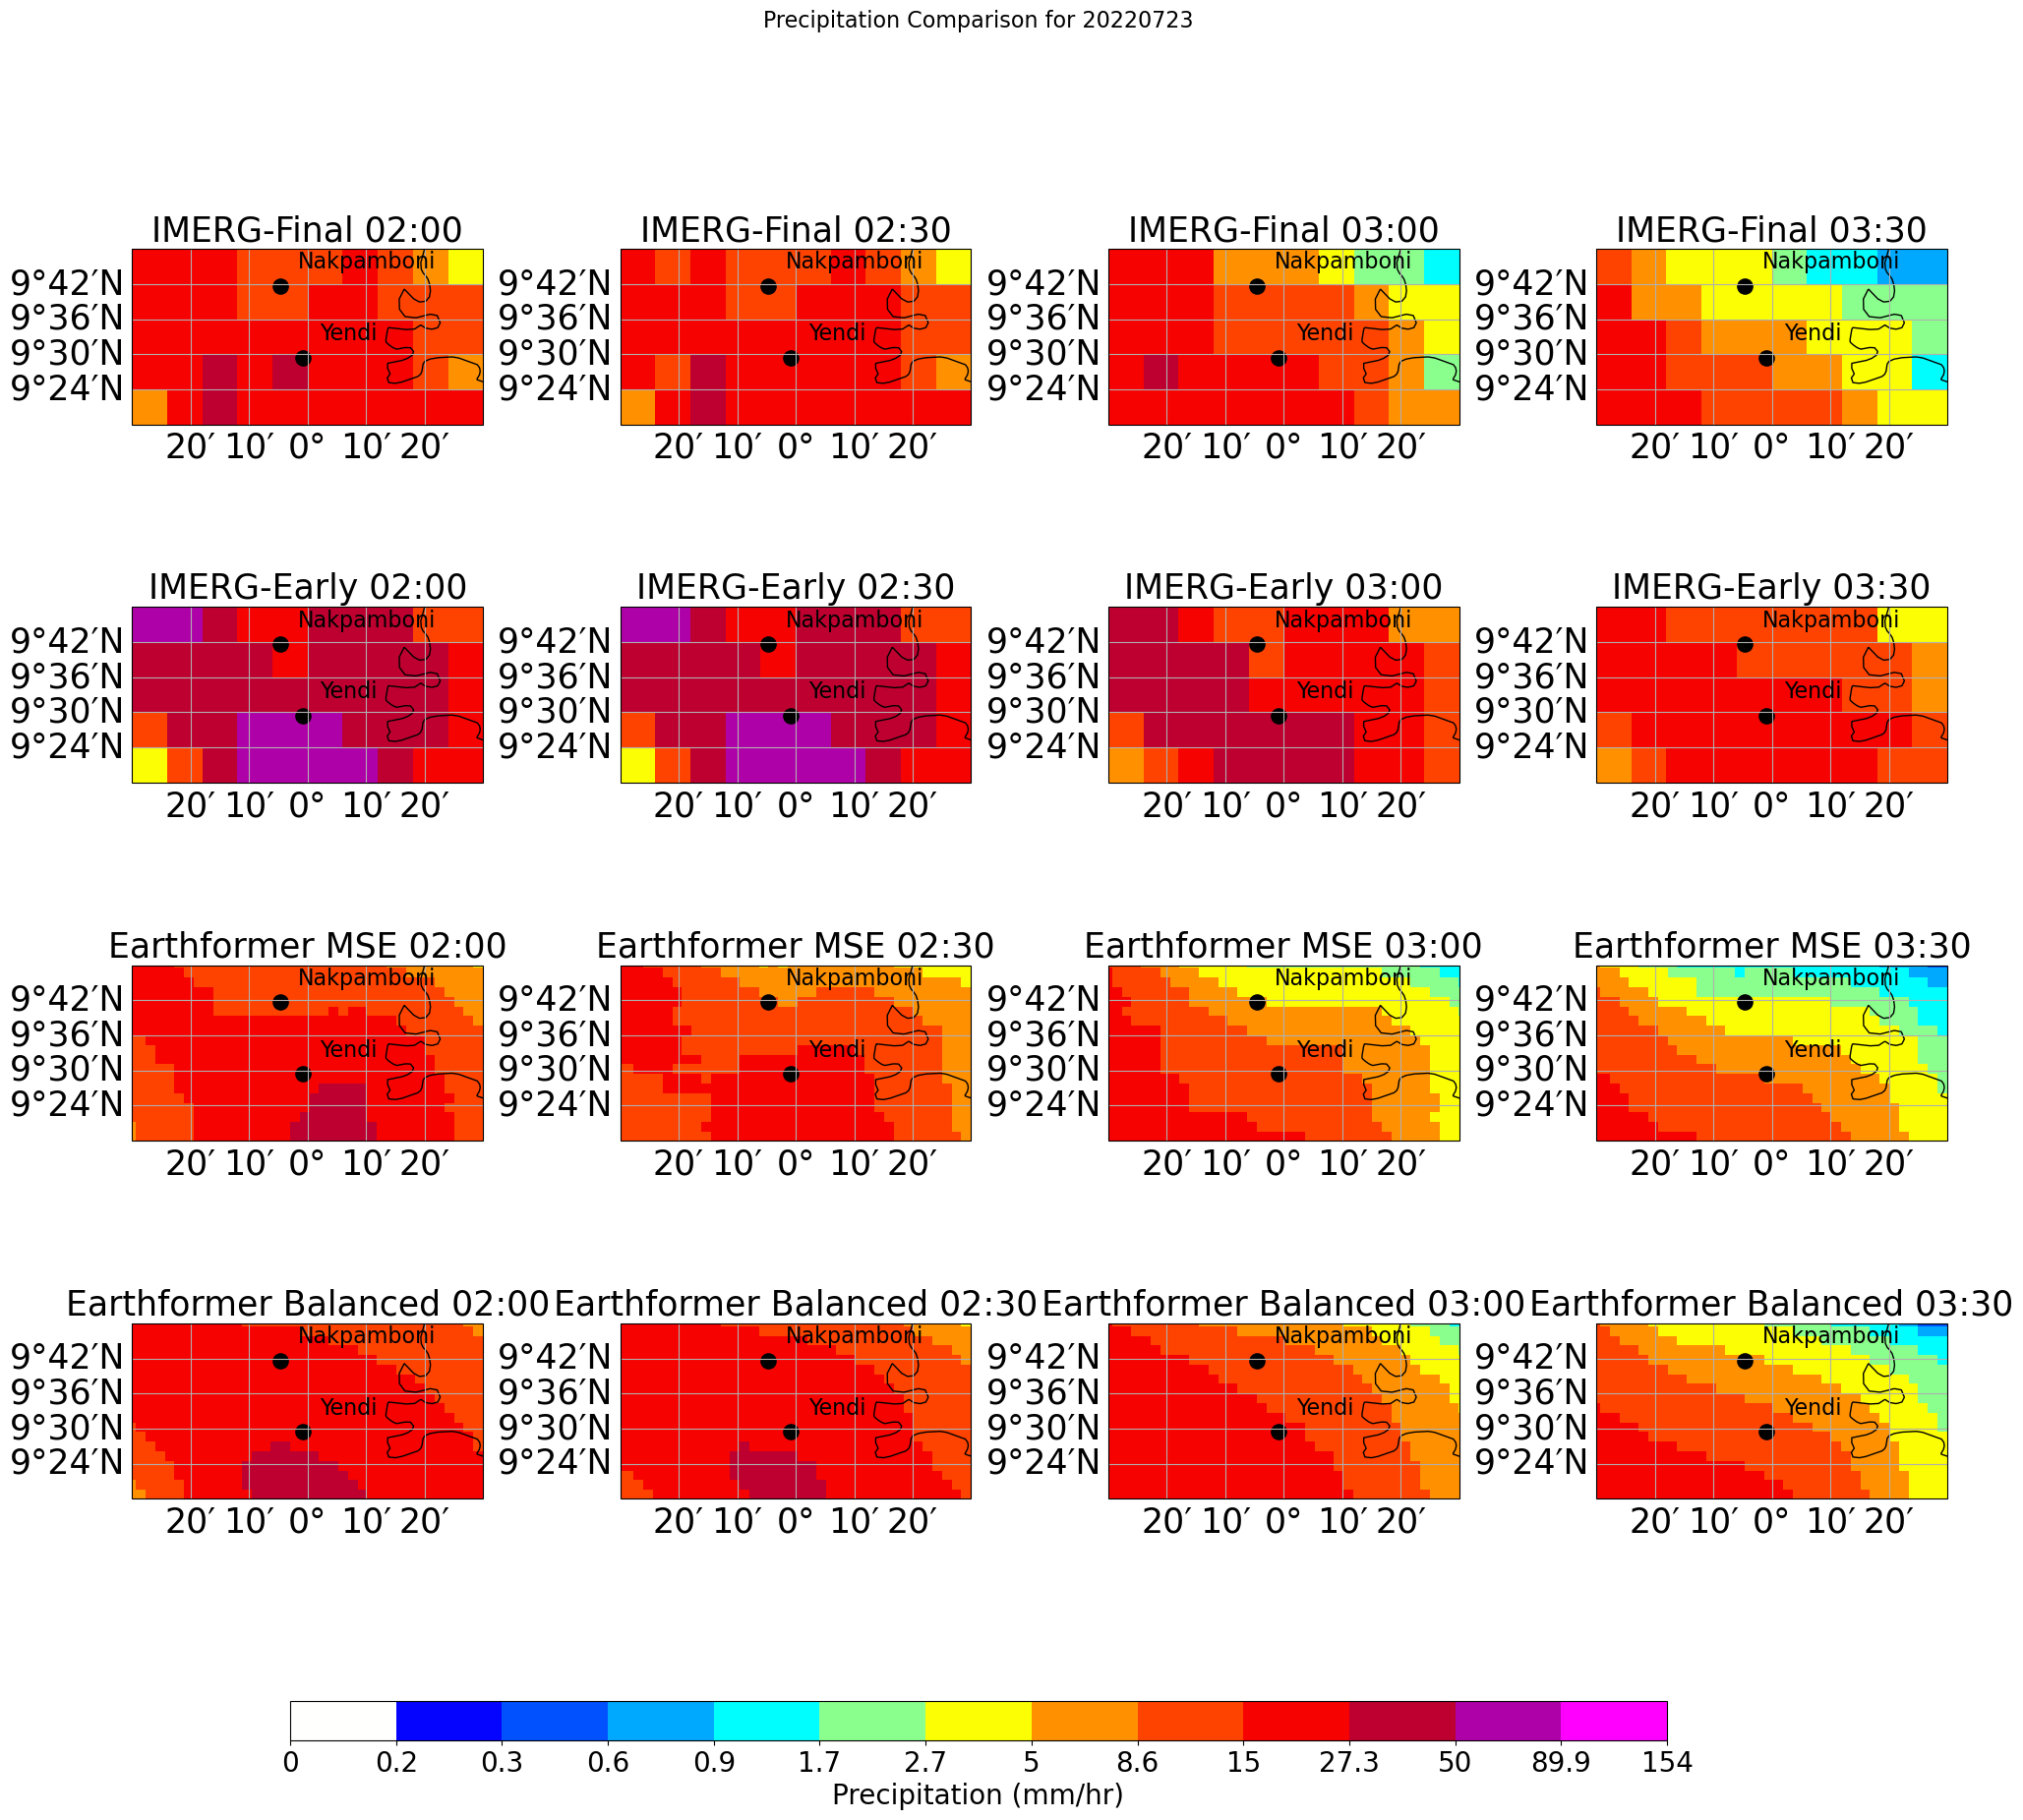

In [21]:
# Example usage
plot_precip_comparison_combined_stations_zoomed(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220723",
    time_range=(2, 3),
    version_early='C',
    lat_bounds=(9.3, 9.8),
    lon_bounds=(-0.5, 0.5),
    plot_tahmo=False,
    plot_gmet=True, 
    tahmo_stations = [], 
    gmet_stations = ['Nakpamboni', 'Yendi']
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S163000-E165959.0990.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S163000-E165959.0990.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S170000-E172959.1020.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S170000-E172959.1020.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S173000-E175959.1050.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S173000-E175959.1050.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S180000-E182959.1080.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S180000-E182959.1080.V06B.HDF5


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_20180\1724524292.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


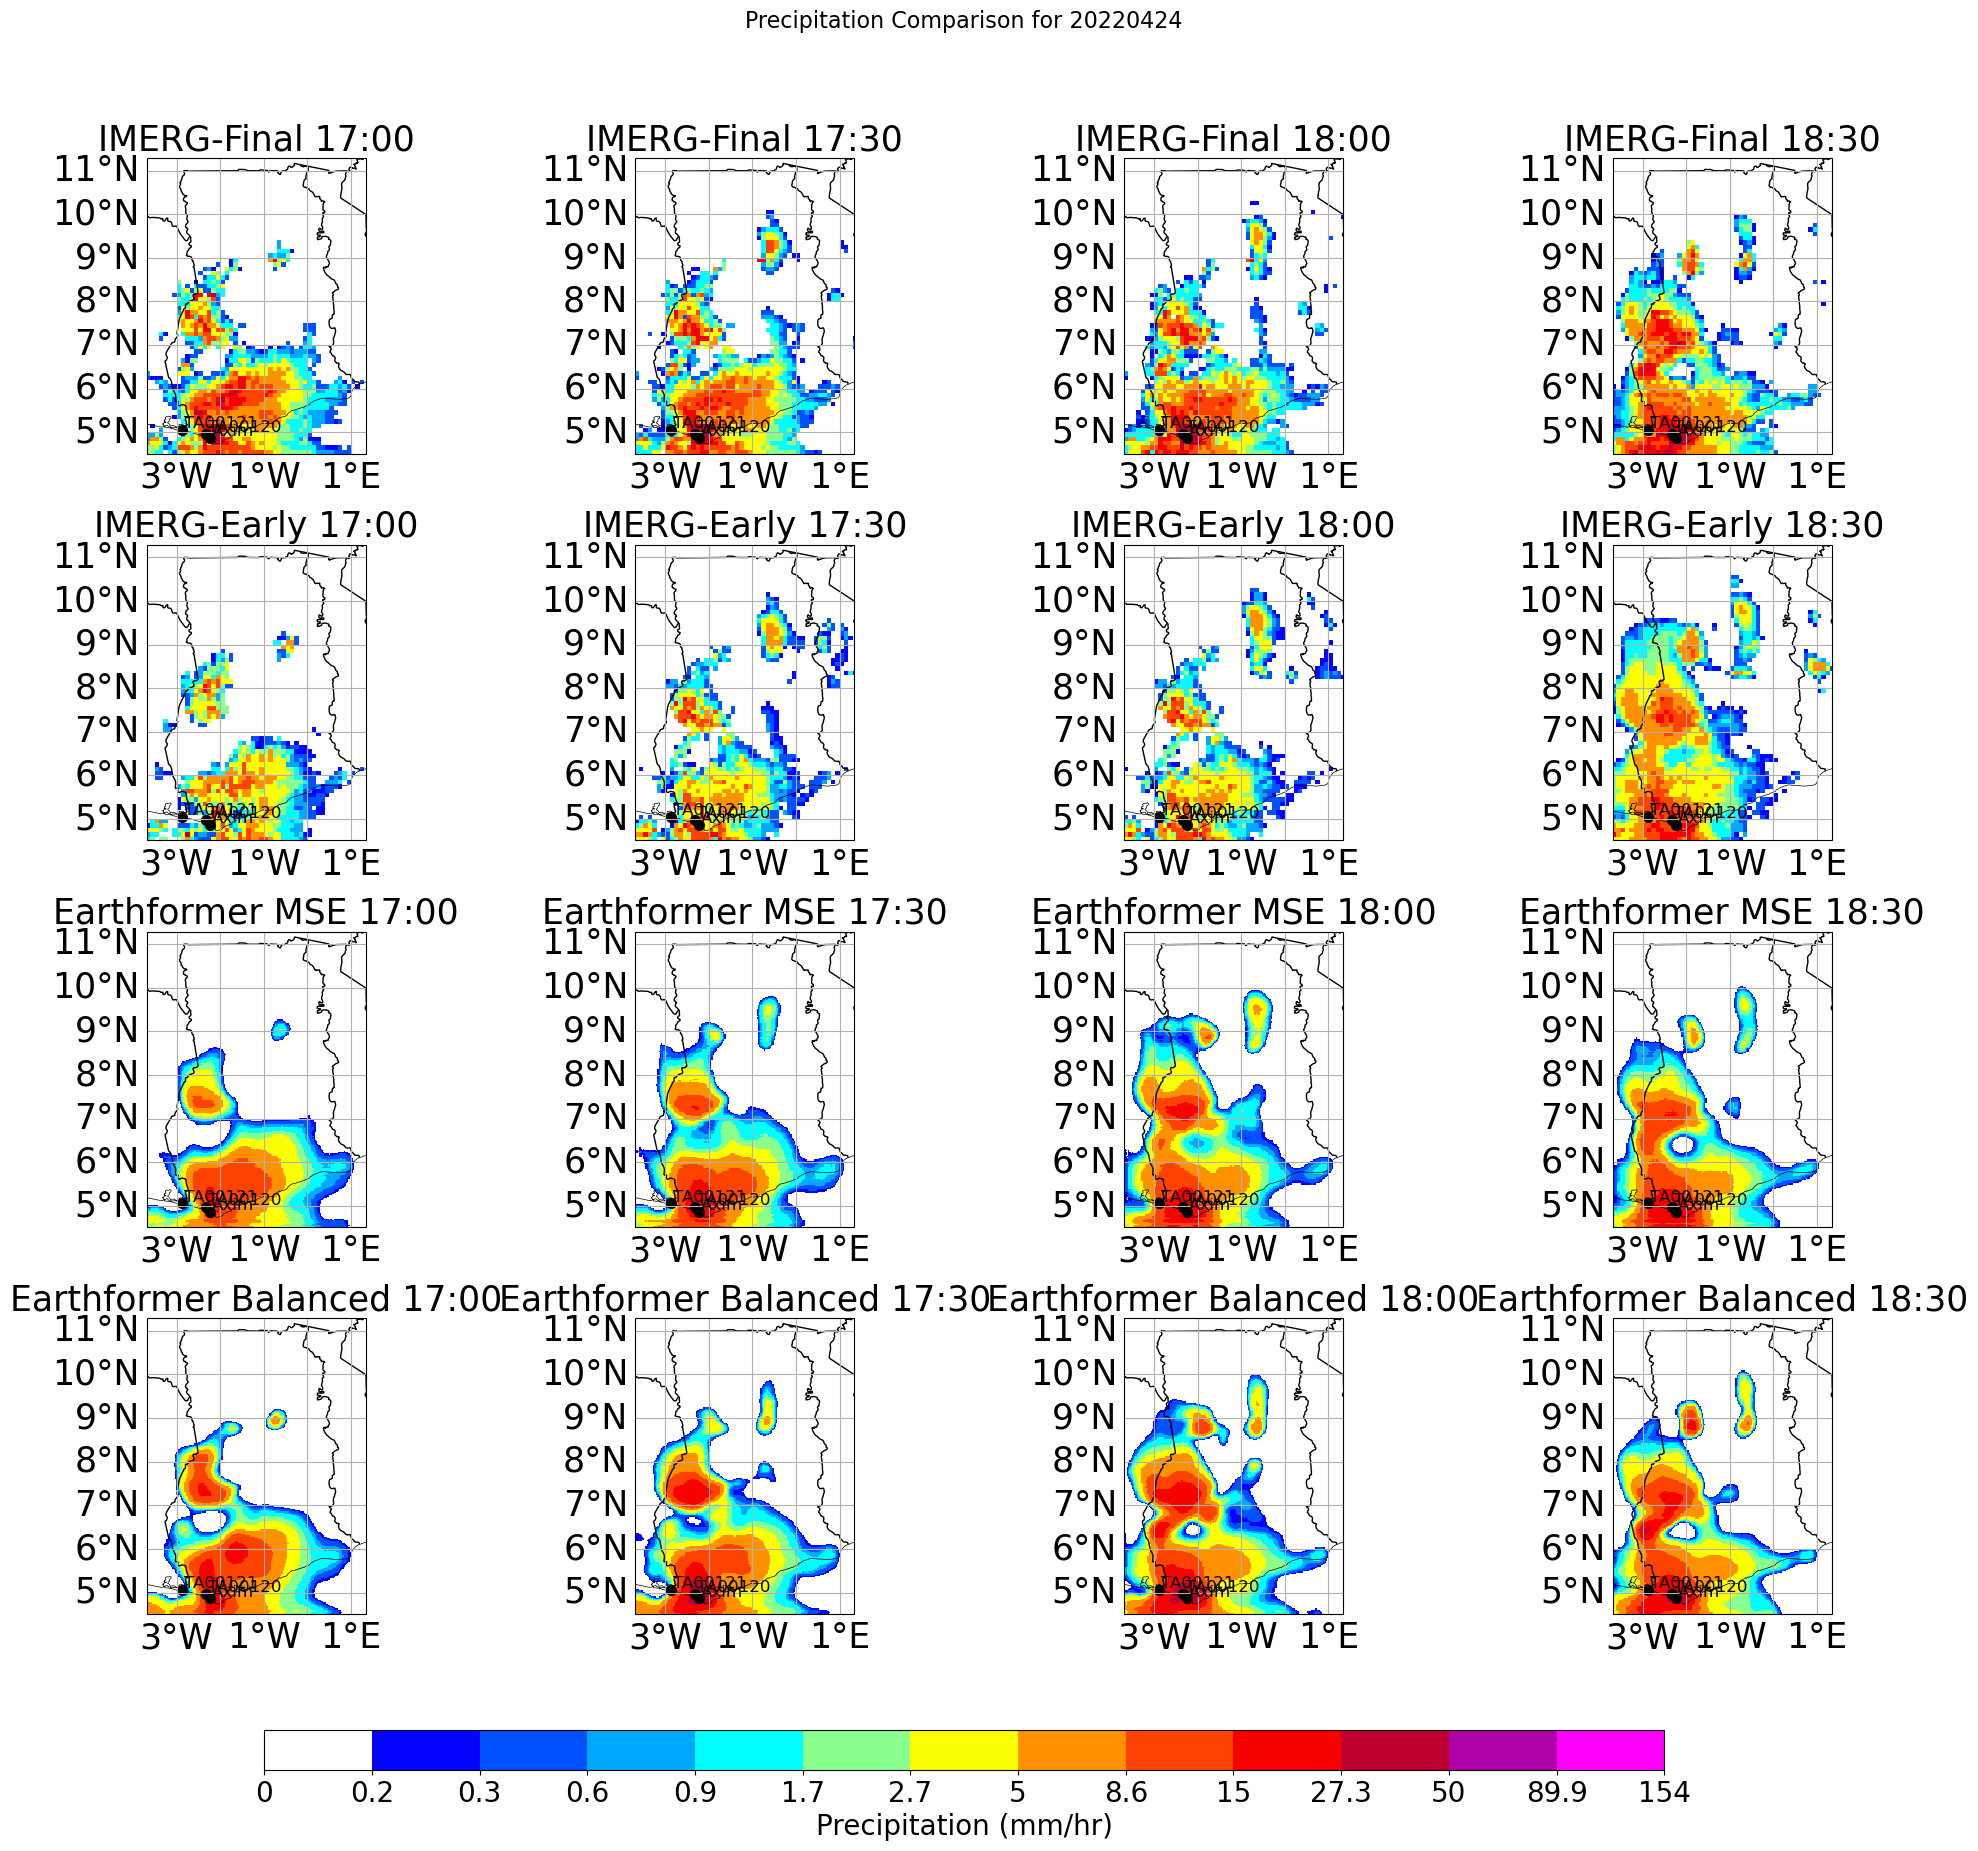

In [42]:
# Example usage
plot_precip_comparison_combined_stations(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220424",
    time_range=(17, 18),
    version_early='B',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model)),
    plot_tahmo=True,
    plot_gmet=True, 
    tahmo_stations = ['TA00120', 'TA00121'], 
    gmet_stations = ['Axim']
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S153000-E155959.0930.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S153000-E155959.0930.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S160000-E162959.0960.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S160000-E162959.0960.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S163000-E165959.0990.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S163000-E165959.0990.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-HHR.MS.MRG.3IMERG.20220424-S170000-E172959.1020.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/04/24\3B-HHR-E.MS.MRG.3IMERG.20220424-S170000-E172959.1020.V06B.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/04/24\3B-

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_11844\4014137489.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


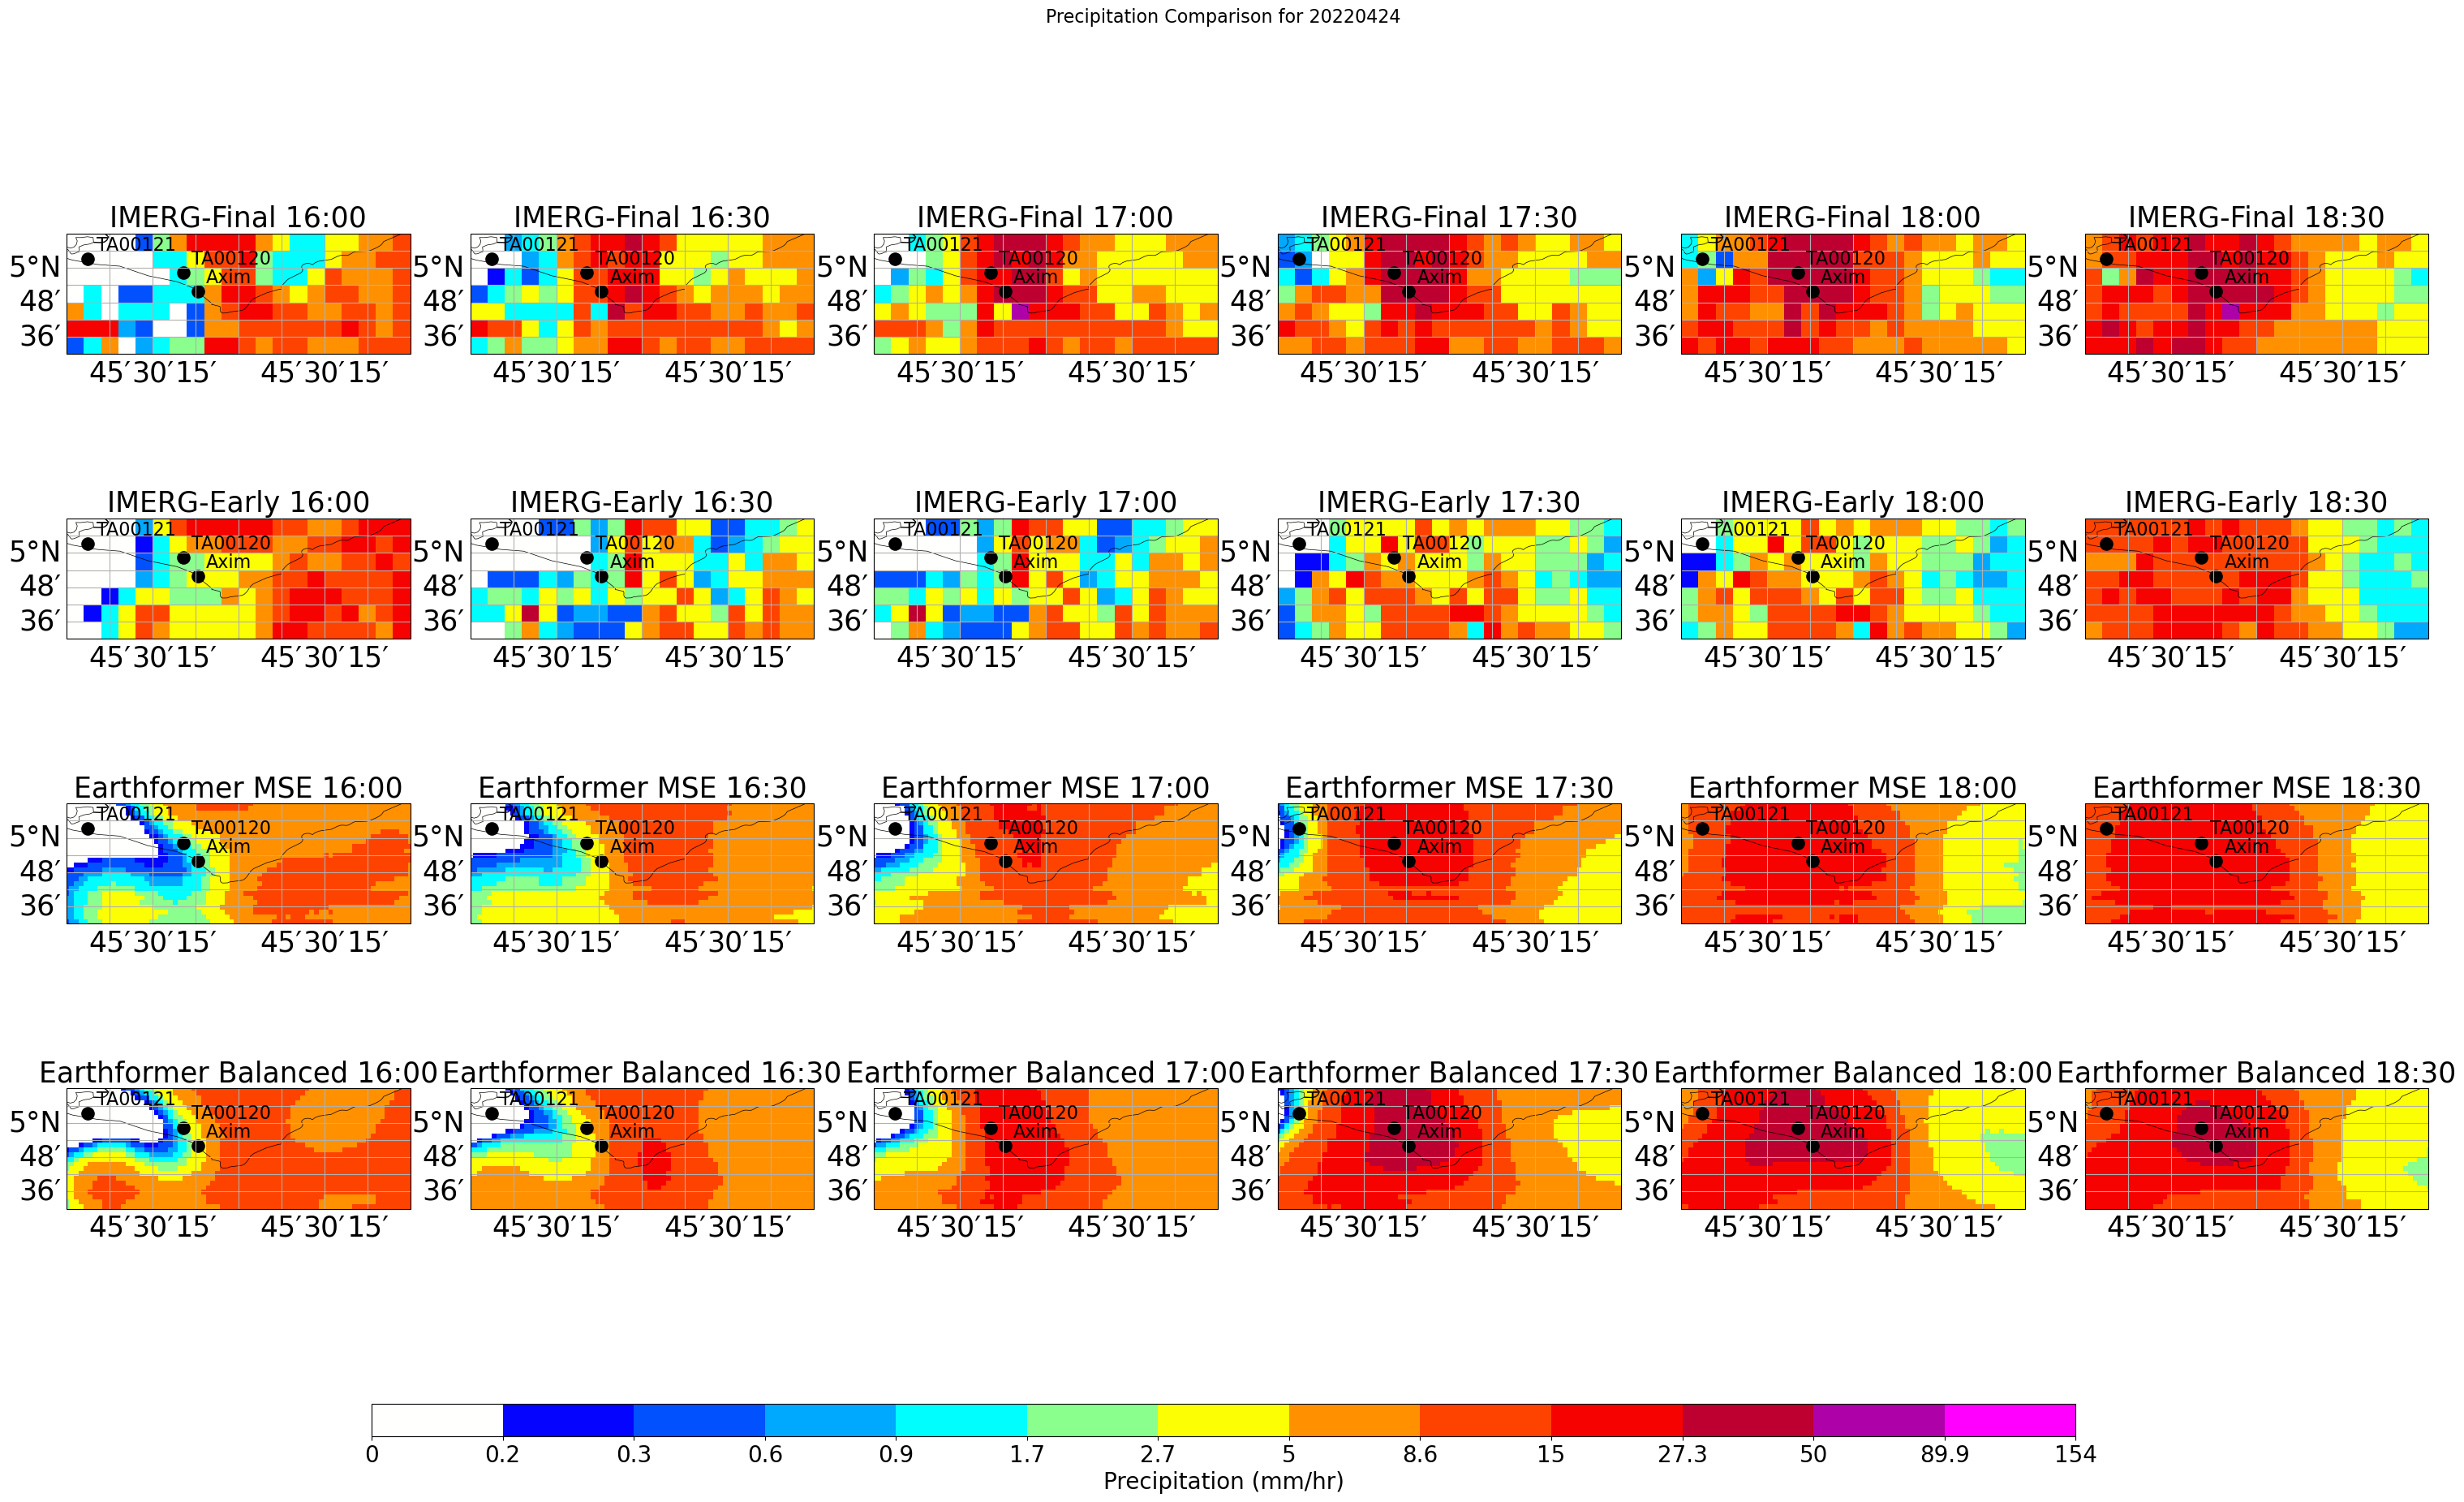

In [21]:
# Example usage
plot_precip_comparison_combined_stations_zoomed(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220424",
    time_range=(16, 18),
    version_early='B',
    lat_bounds=(4.5, 5.2),
    lon_bounds=(-3, -1),
    plot_tahmo=True,
    plot_gmet=True, 
    tahmo_stations = ['TA00120', 'TA00121'], 
    gmet_stations = ['Axim']
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S183000-E185959.1110.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S183000-E185959.1110.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S190000-E192959.1140.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S190000-E192959.1140.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S193000-E195959.1170.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S193000-E195959.1170.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S200000-E202959.1200.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S200000-E202959.1200.V06C.HDF5


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_11844\1724524292.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


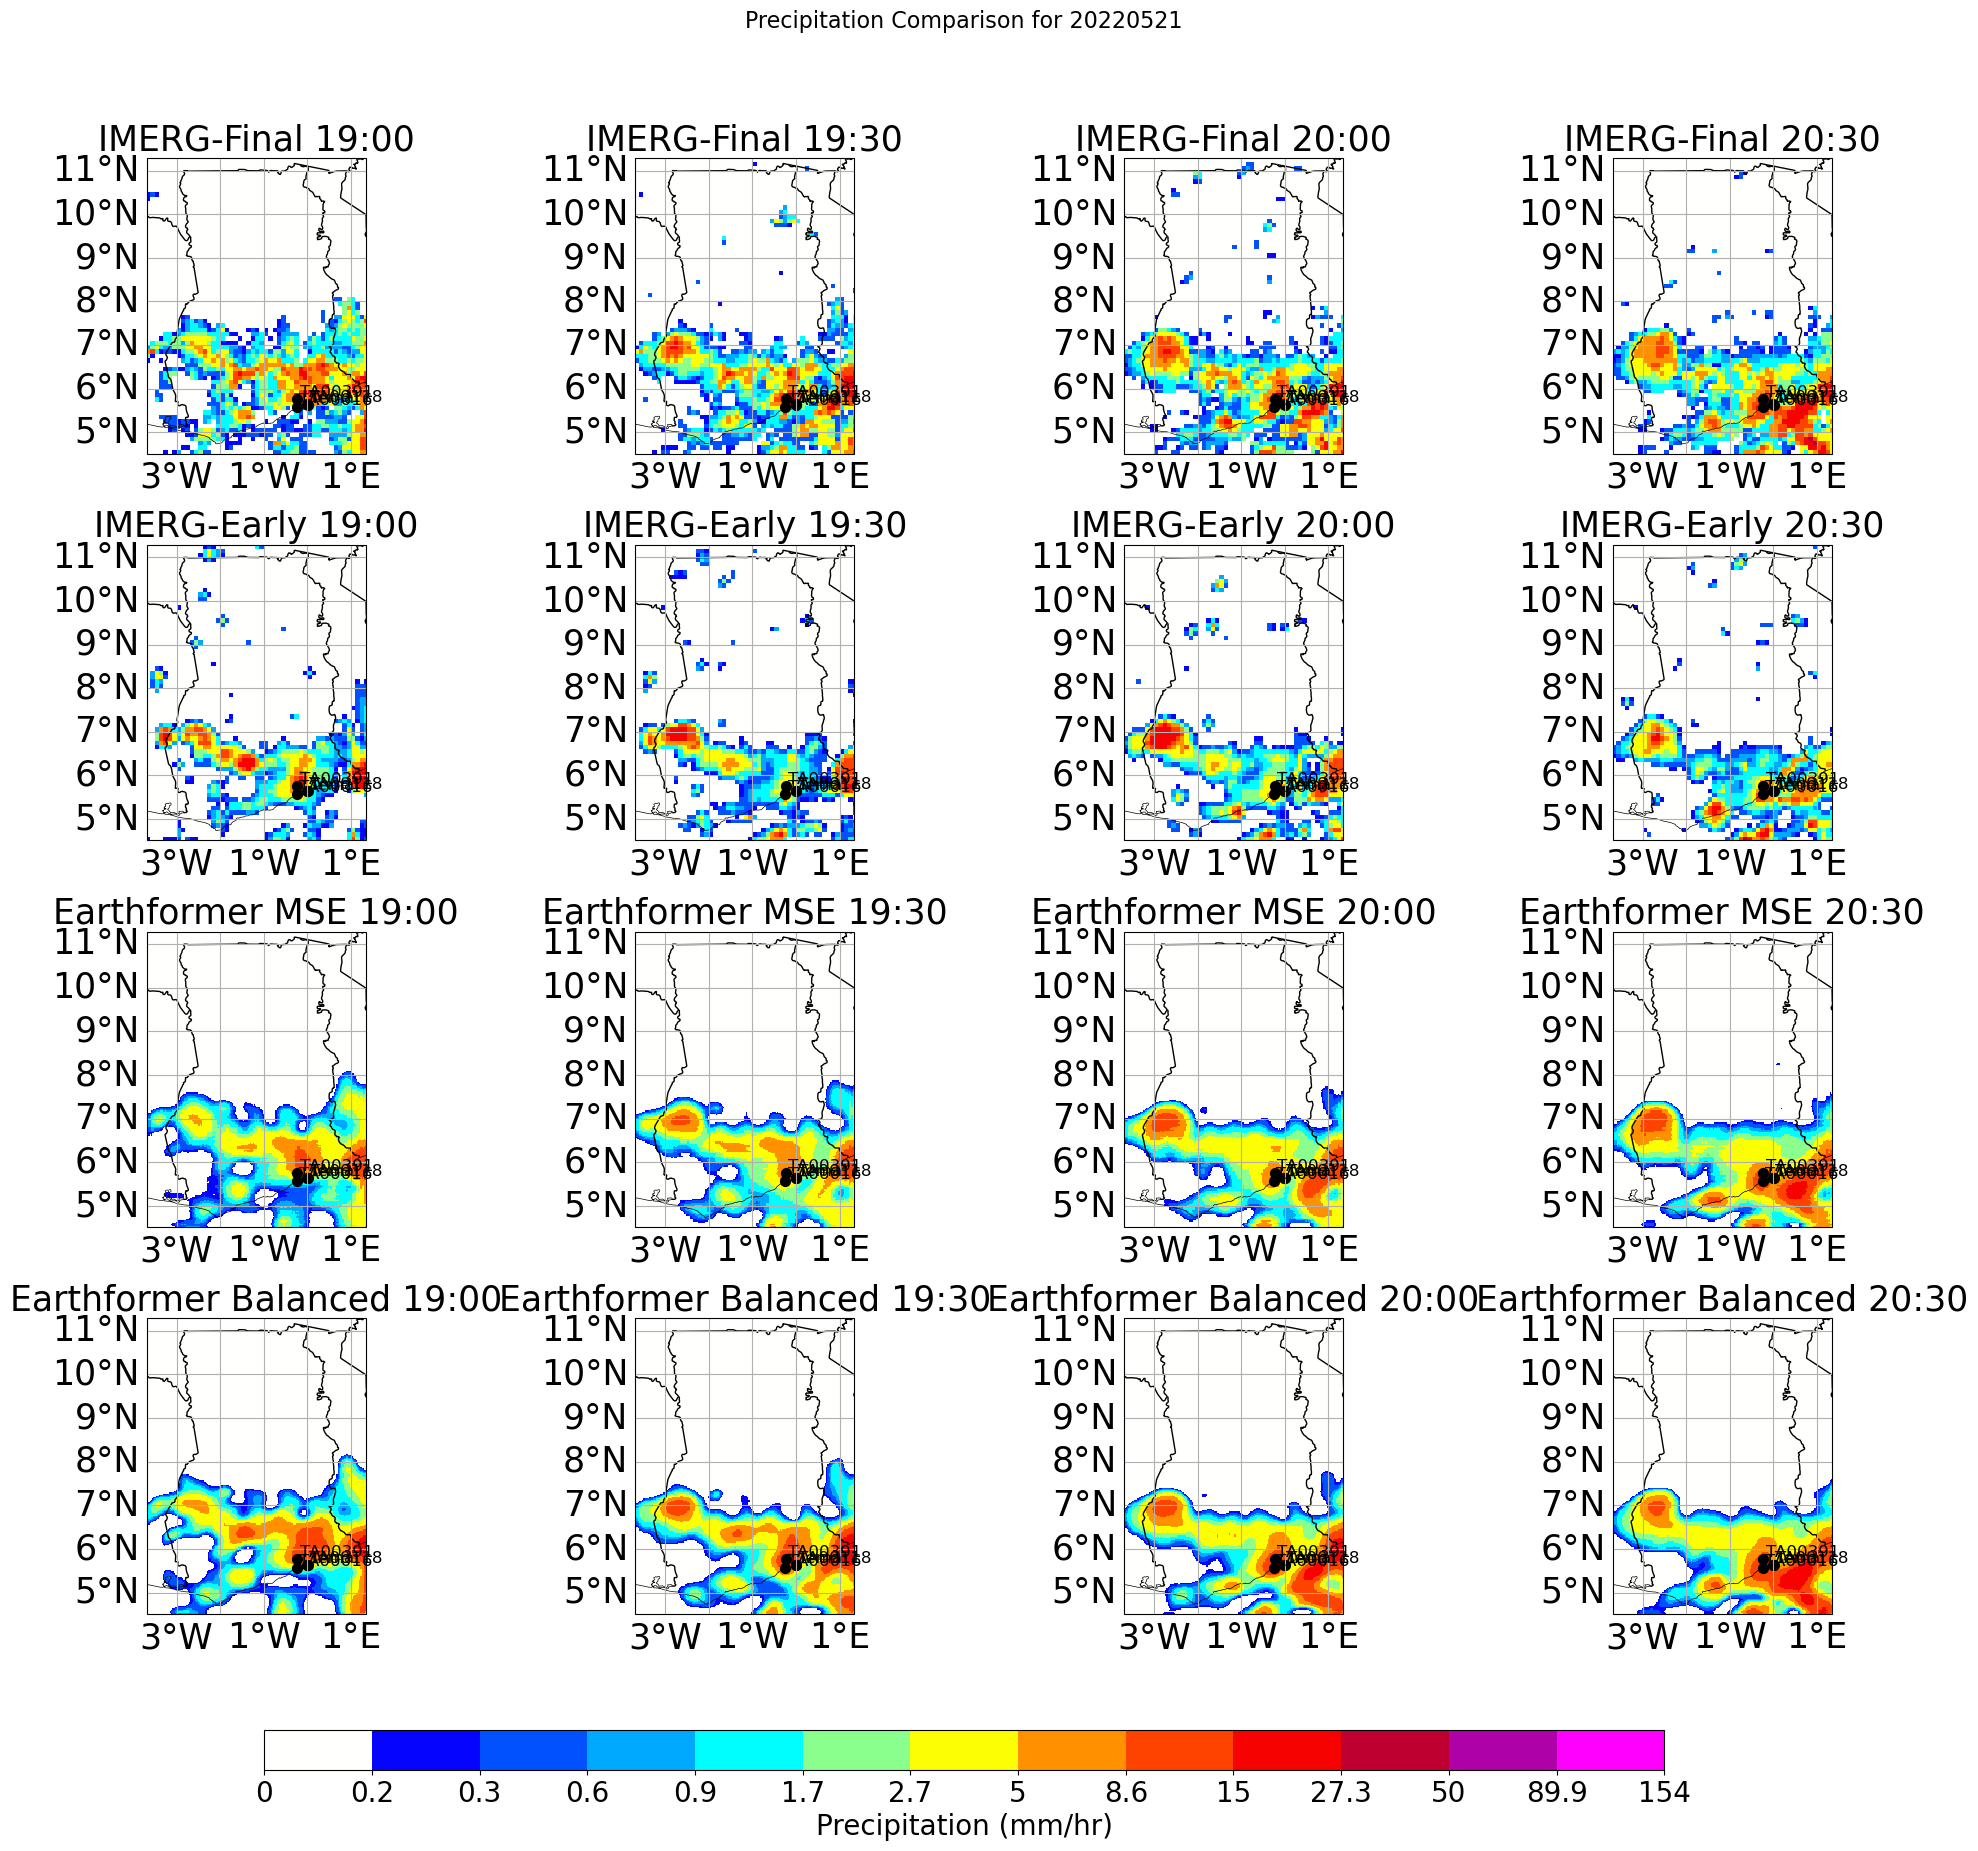

In [16]:
# Example usage
plot_precip_comparison_combined_stations(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220521",
    time_range=(19, 20),
    version_early='C',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model)),
    plot_tahmo=True,
    plot_gmet=True, 
    tahmo_stations = ['TA00016', 'TA00118', 'TA00391'], 
    gmet_stations = ['Tema']
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S183000-E185959.1110.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S183000-E185959.1110.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S190000-E192959.1140.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S190000-E192959.1140.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S193000-E195959.1170.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S193000-E195959.1170.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-HHR.MS.MRG.3IMERG.20220521-S200000-E202959.1200.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/05/21\3B-HHR-E.MS.MRG.3IMERG.20220521-S200000-E202959.1200.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/05/21\3B-

C:\Users\c.kwa\AppData\Local\Temp\ipykernel_11844\4014137489.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


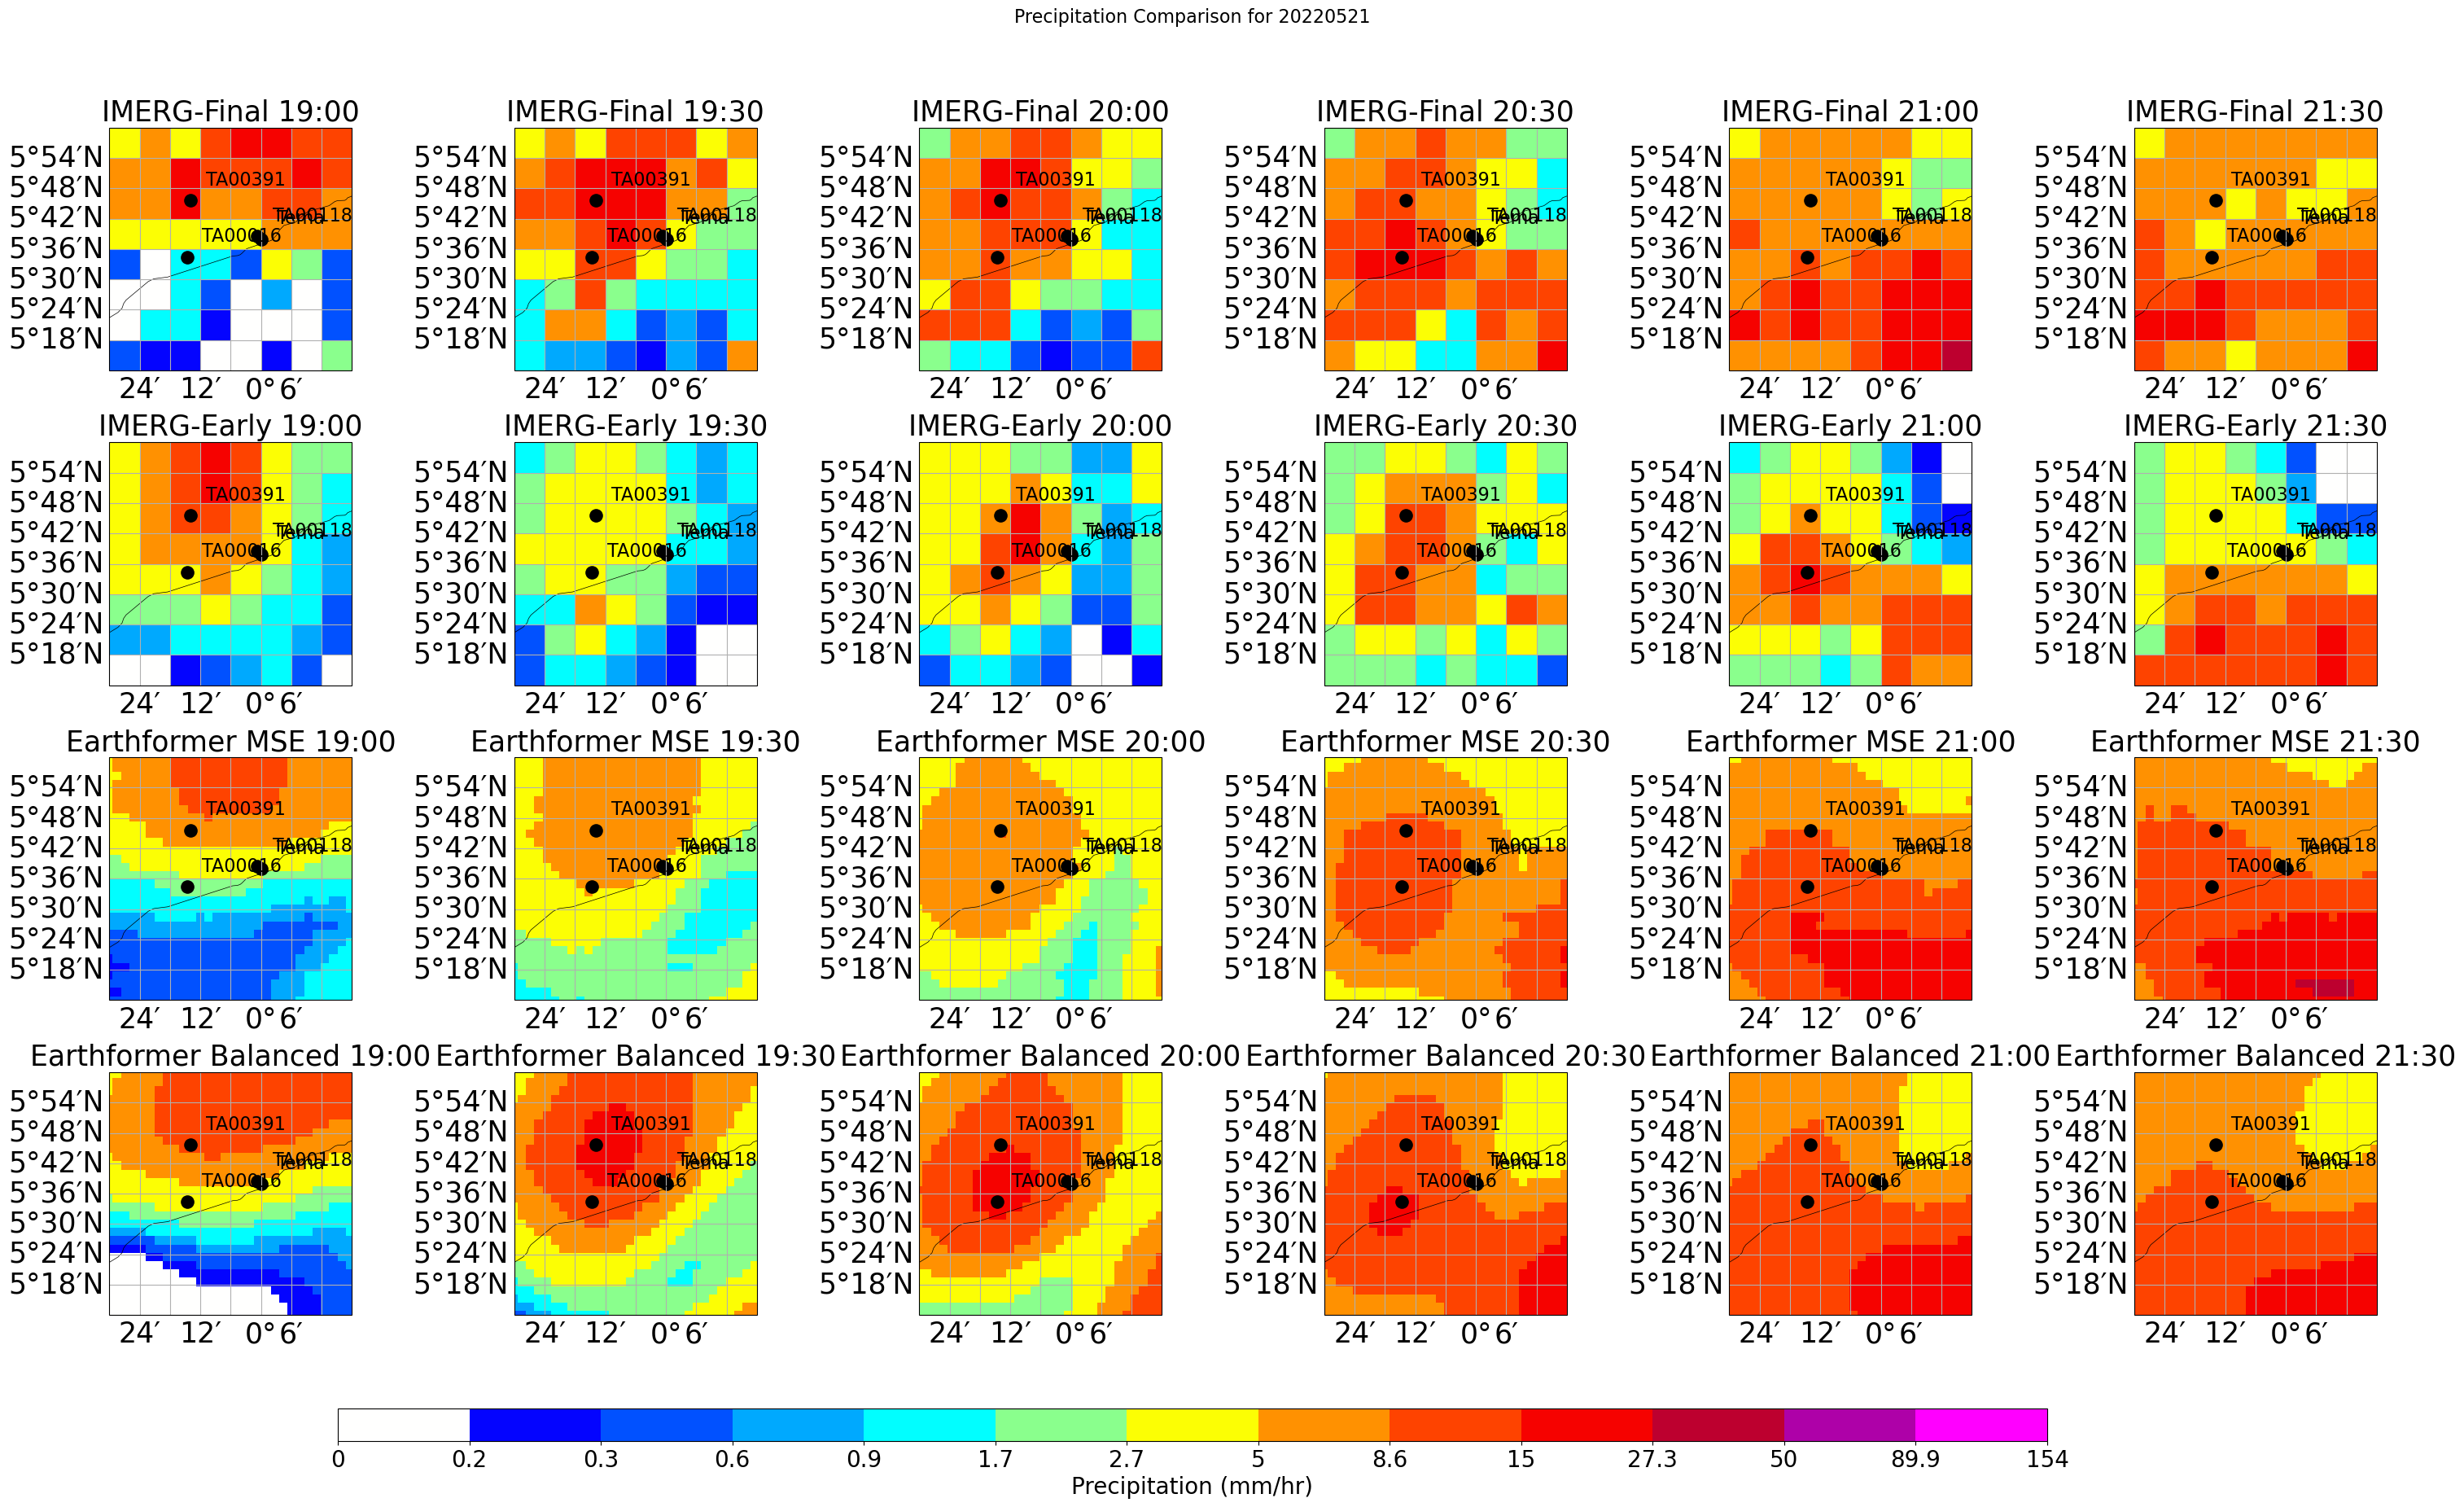

In [20]:
# Example usage
plot_precip_comparison_combined_stations_zoomed(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20220521",
    time_range=(19, 21),
    version_early='C',
    lat_bounds=(5.2, 6),
    lon_bounds=(-0.5, 0.3),
    plot_tahmo=True,
    plot_gmet=True, 
    tahmo_stations = ['TA00016', 'TA00118', 'TA00391'], 
    gmet_stations = ['Tema']
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S153000-E155959.0930.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S153000-E155959.0930.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S160000-E162959.0960.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S160000-E162959.0960.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S163000-E165959.0990.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S163000-E165959.0990.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S170000-E172959.1020.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S170000-E172959.1020.V06C.HDF5


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_20180\1724524292.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


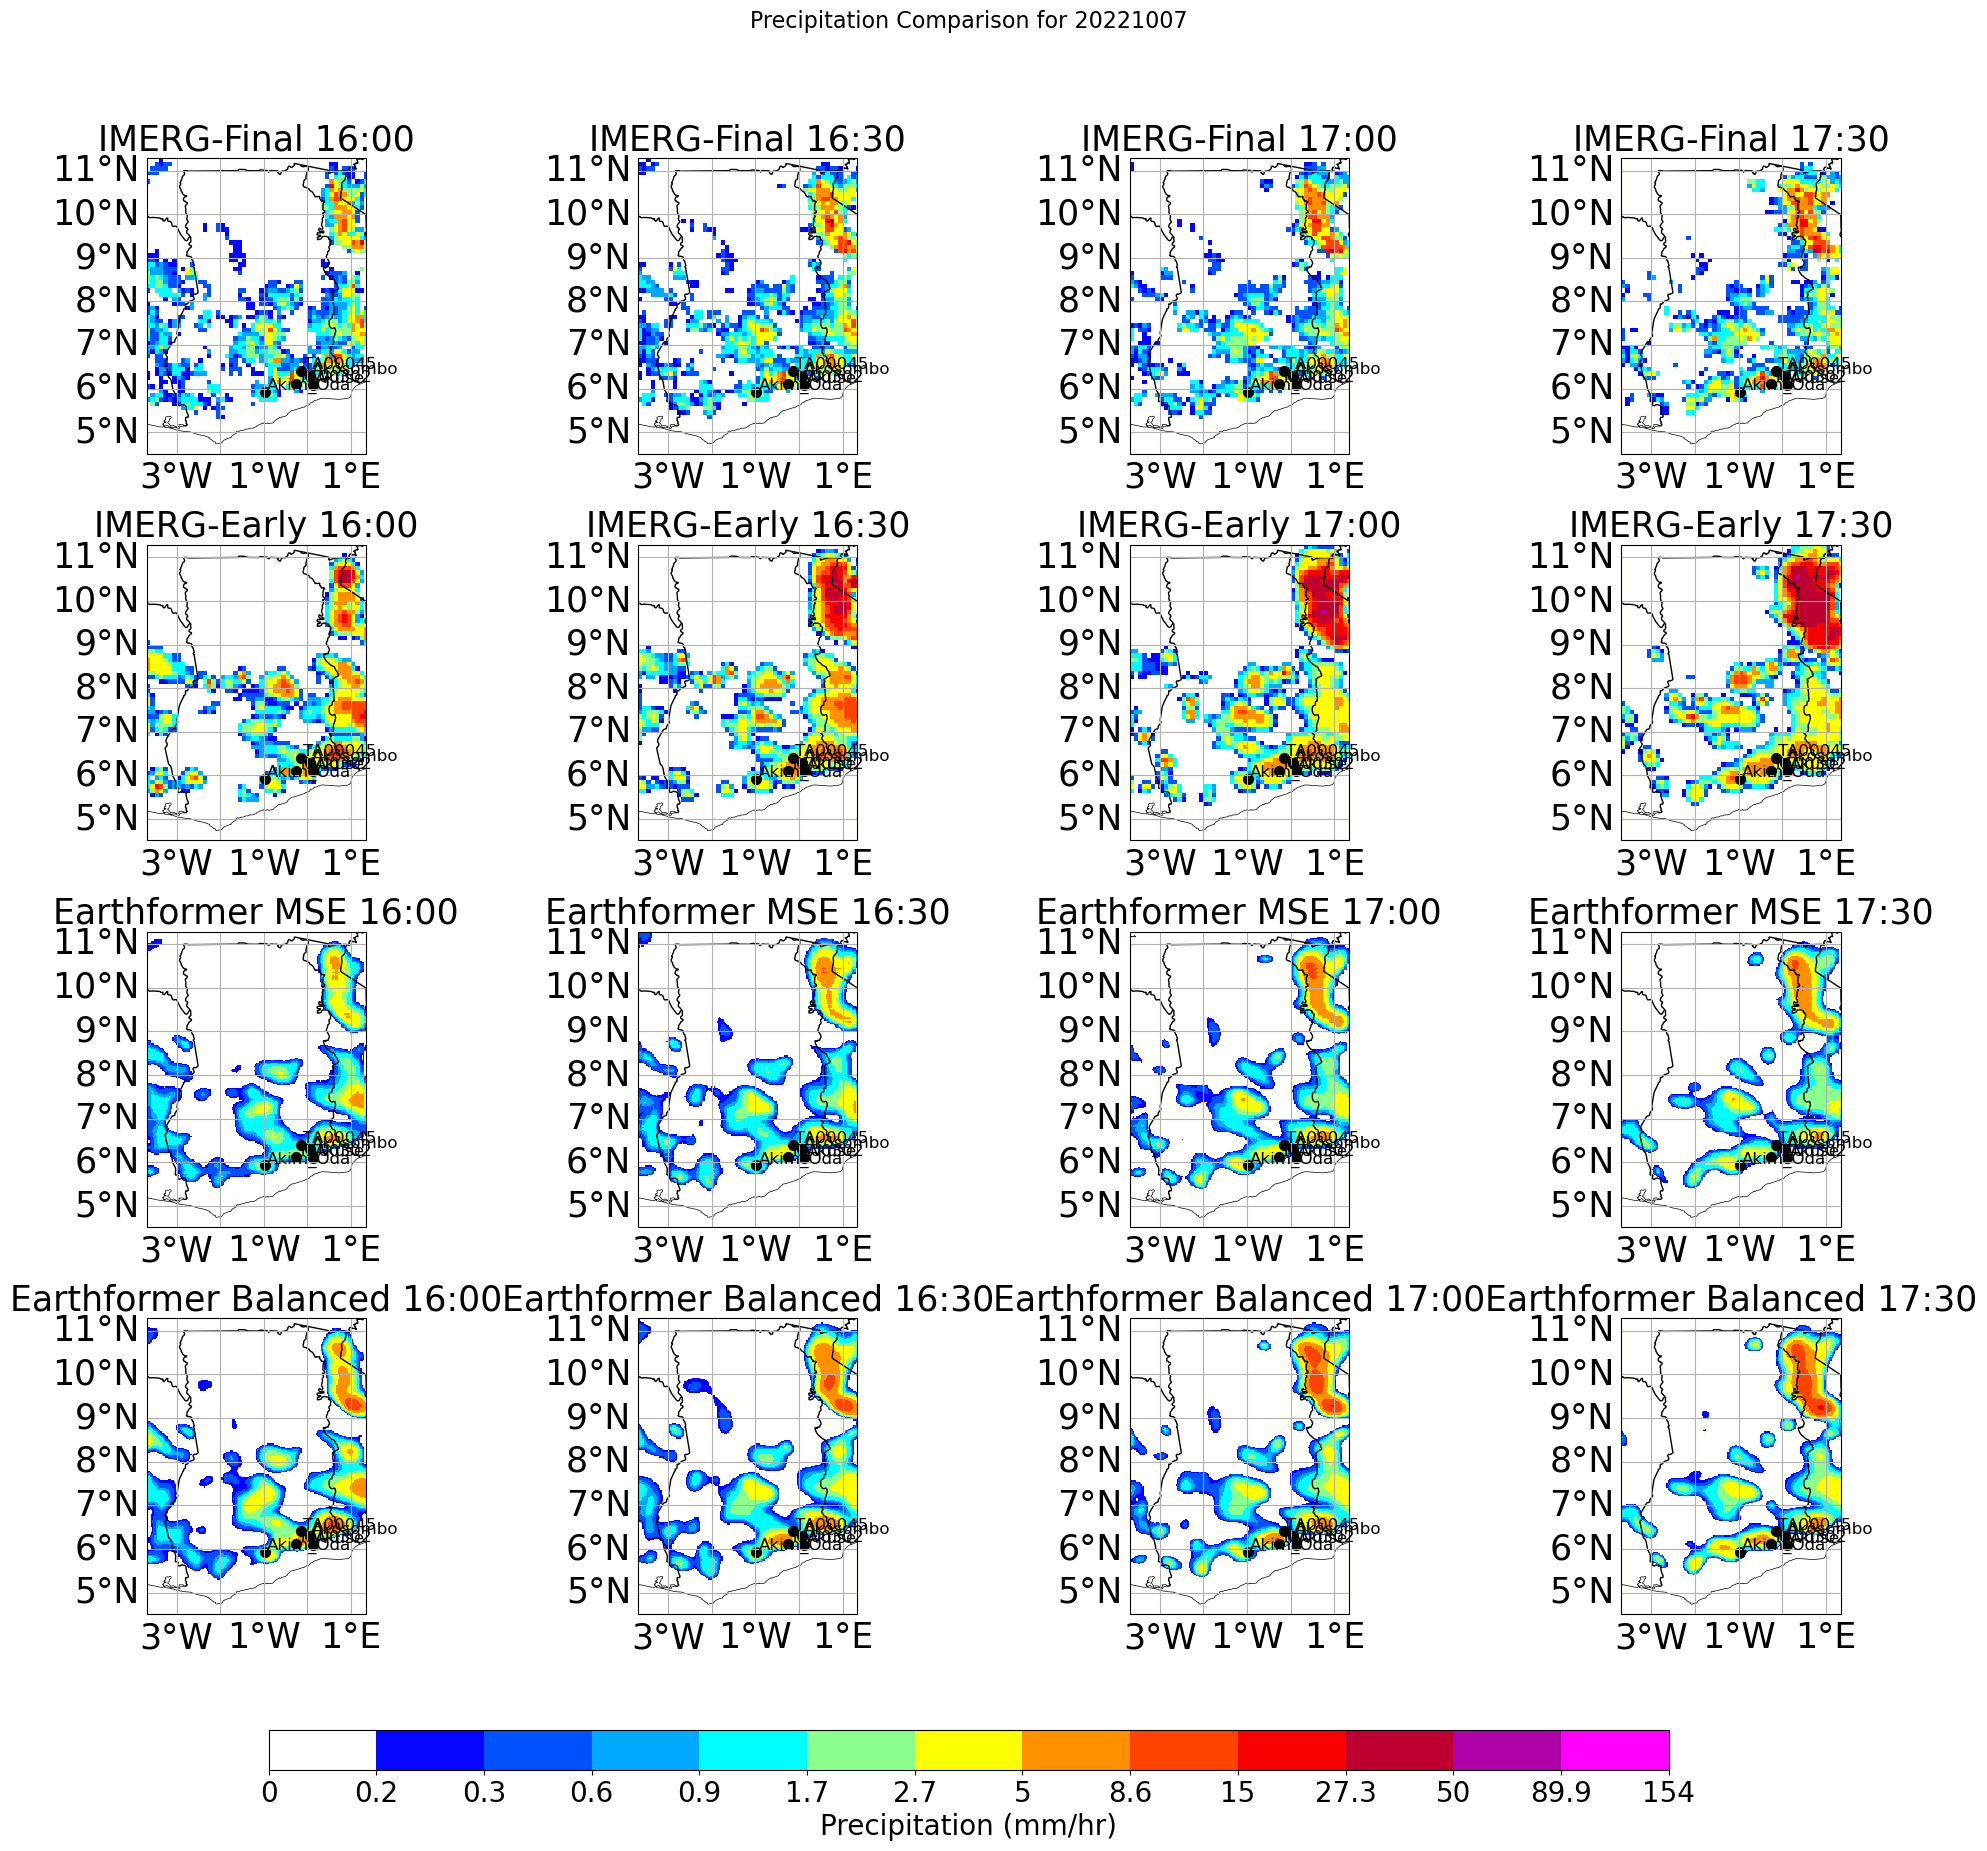

In [36]:
# Example usage
plot_precip_comparison_combined_stations(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20221007",
    time_range=(16, 17),
    version_early='C',
    lat_bounds=(np.min(lat_model), np.max(lat_model)),
    lon_bounds=(np.min(lon_model), np.max(lon_model)),
    plot_tahmo=True,
    plot_gmet=True, 
    tahmo_stations = ['TA00302', 'TA00045'], 
    gmet_stations = ['Akosombo', 'Akuse', 'Akim_Oda']
)

D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S153000-E155959.0930.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S153000-E155959.0930.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S160000-E162959.0960.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S160000-E162959.0960.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S163000-E165959.0990.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S163000-E165959.0990.V06C.HDF5
D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR\2022/10/07\3B-HHR.MS.MRG.3IMERG.20221007-S170000-E172959.1020.V07B.HDF5
D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER\2022/10/07\3B-HHR-E.MS.MRG.3IMERG.20221007-S170000-E172959.1020.V06C.HDF5


C:\Users\c.kwa\AppData\Local\Temp\ipykernel_20180\211890812.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


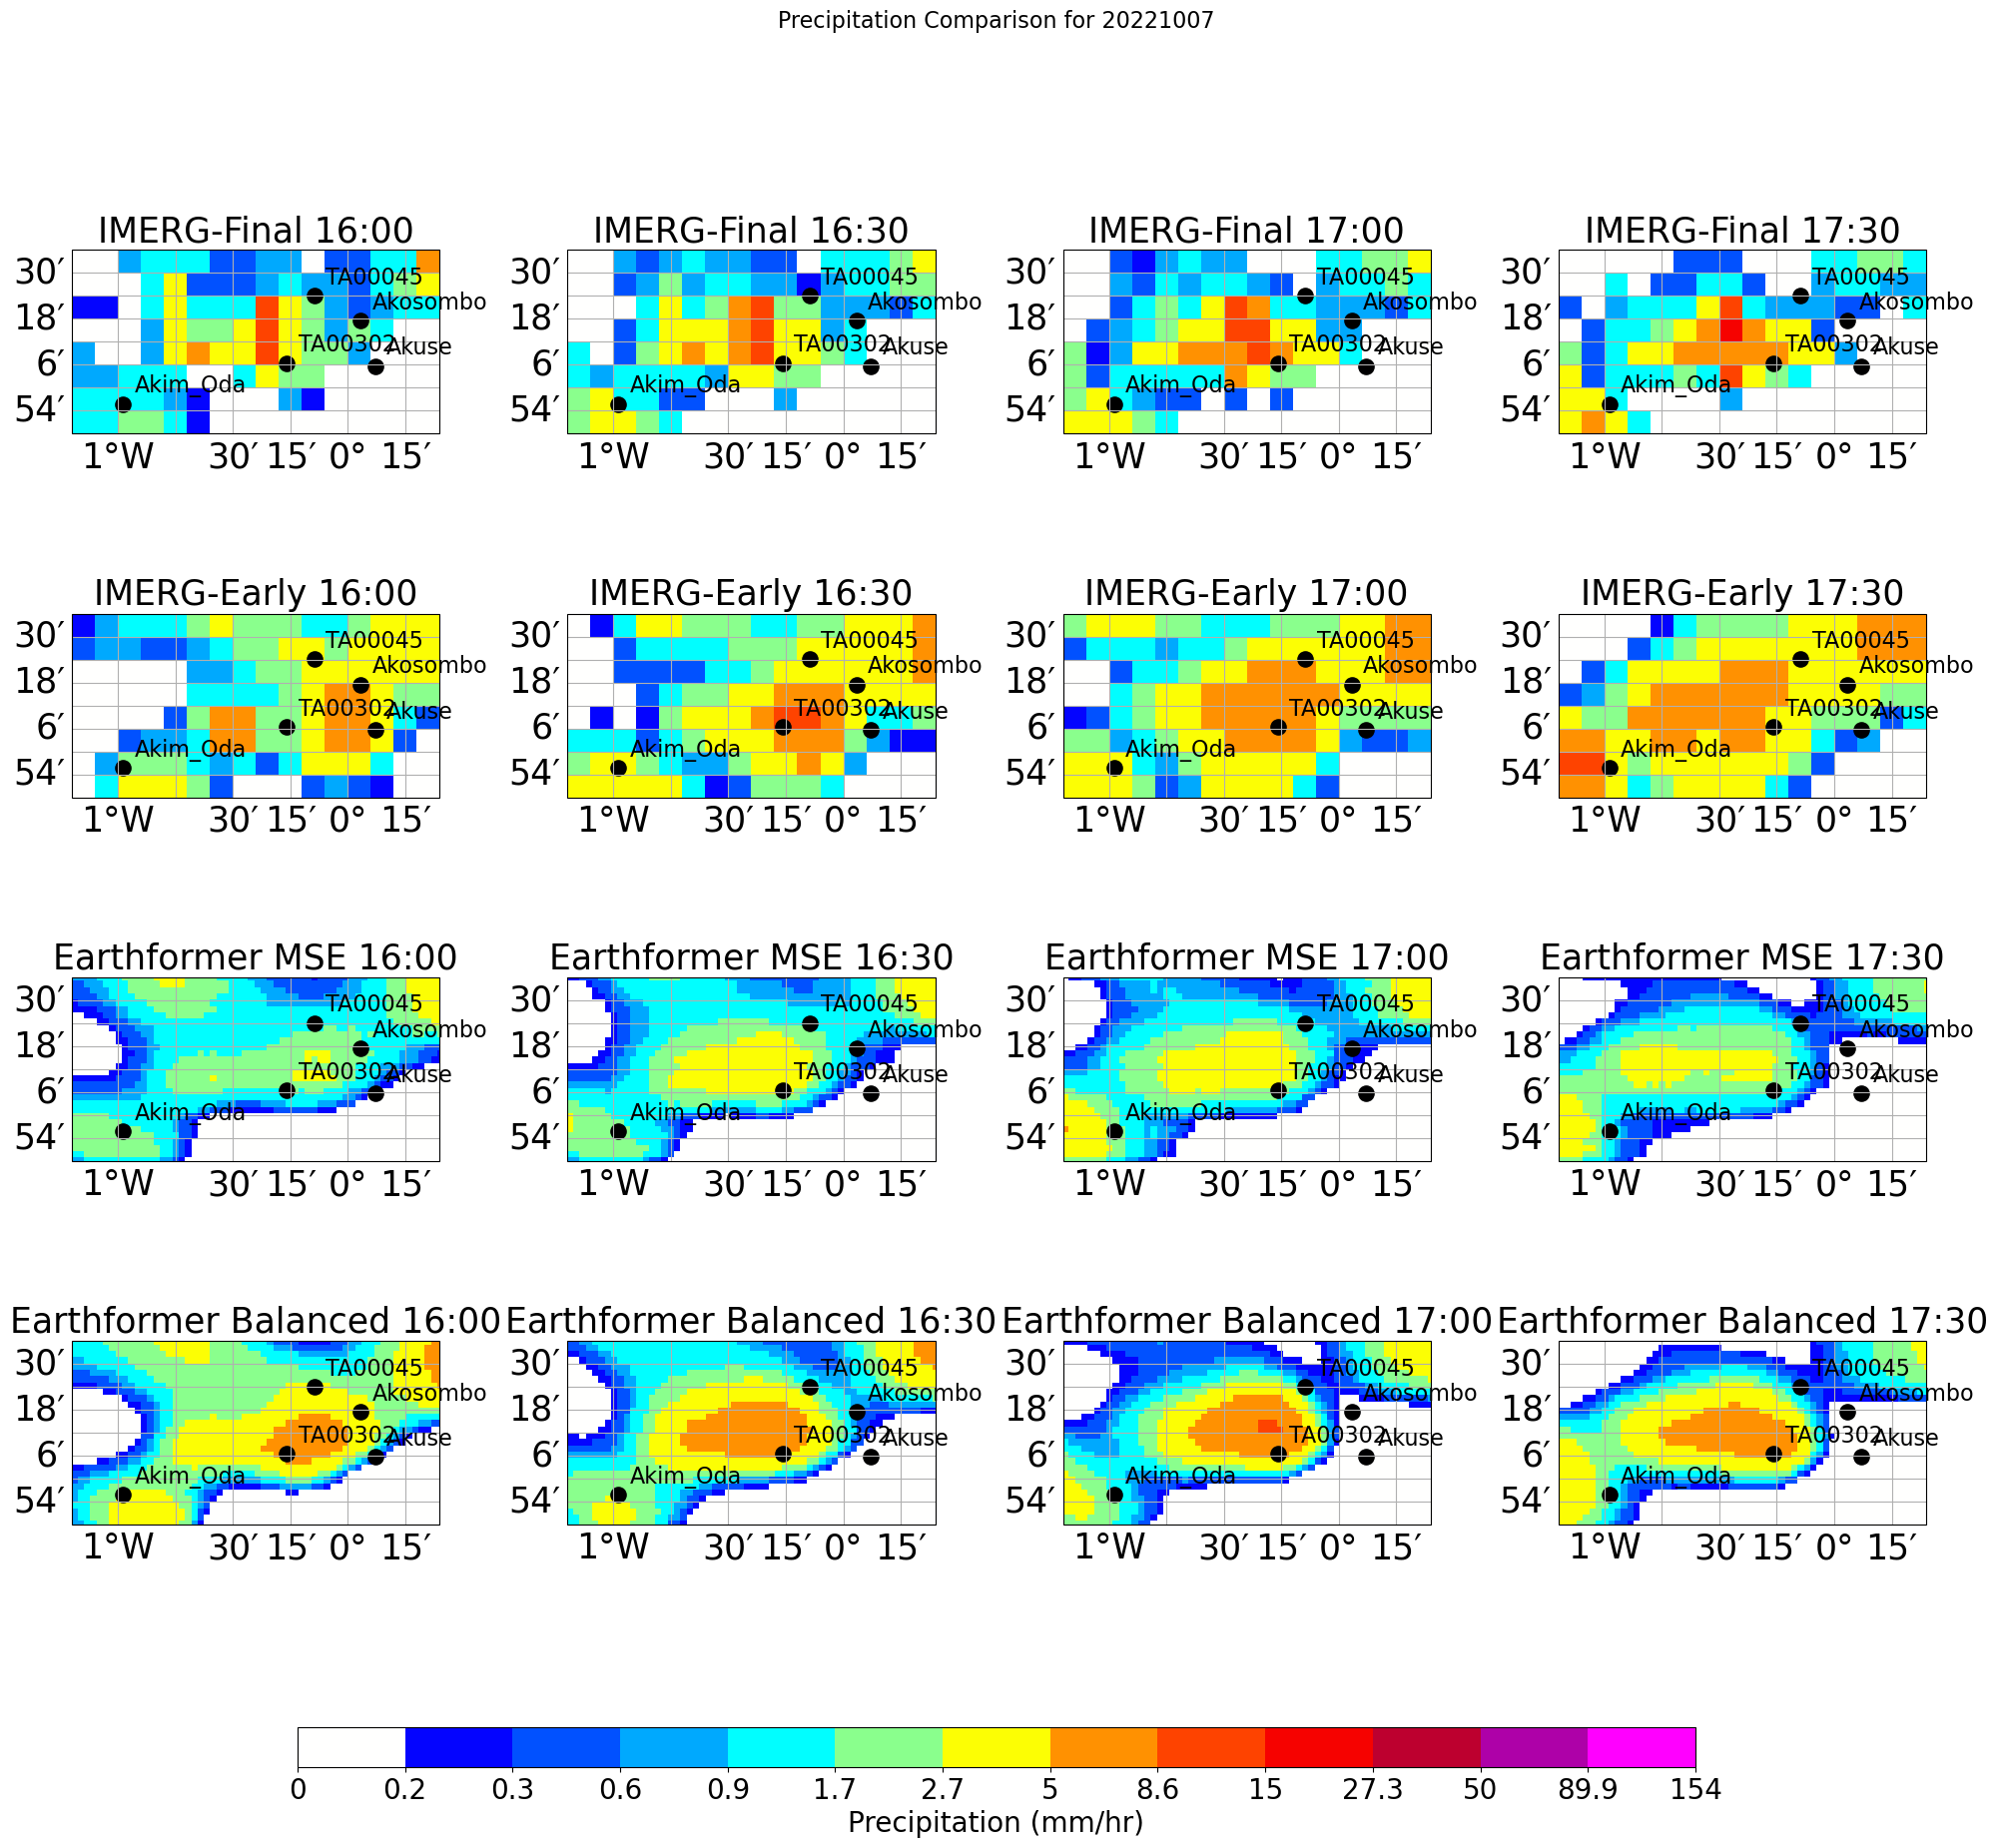

In [34]:
# Example usage
plot_precip_comparison_combined_stations_zoomed(
    model_dir="D:/Ghana/Output_data/experiments_adapted129/repotest/testOutput",
    model_dir2="D:/Ghana/Output_data/experiments_adapted130/repotest/testOutput",
    imerg_final_dir="D:/Ghana/IMERG_data/GPM/RS/V07/IMERG/IMERG-FR",
    imerg_early_dir="D:/Ghana/IMERG_data/GPM/NRT/IMERG/IMERG-ER",
    date="20221007",
    time_range=(16, 17),
    version_early='C',
    lat_bounds=(5.8, 6.6),
    lon_bounds=(-1.2, 0.4),
    plot_tahmo=True,
    plot_gmet=True, 
    tahmo_stations = ['TA00302', 'TA00045'], 
    gmet_stations = ['Akosombo', 'Akuse', 'Akim_Oda']
)